In [1]:
# Load libraries
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gvar as gv
from matplotlib.pyplot import figure
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
# Read response functions from file
nwR=5000
nq=25
wR=np.zeros(nwR)
qR=np.zeros(nq)
qR=np.asarray([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 
               1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
               2100,2200, 2300, 2400, 2500])

In [3]:
# Read one-body responses
R00_cc_1b_dip=np.zeros( (nwR, nq, 3) )
R0z_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rzz_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rxx_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rxy_cc_1b_dip=np.zeros( (nwR, nq, 3) )
R00_cc_12b_dip=np.zeros( (nwR, nq, 3) )
R0z_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rzz_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rxx_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rxy_cc_12b_dip=np.zeros( (nwR, nq, 3) )

R00_vec_1b=np.zeros( (nwR, nq, 3) )
R0z_vec_1b=np.zeros( (nwR, nq, 3) )
Rzz_vec_1b=np.zeros( (nwR, nq, 3) )
Rxx_vec_1b=np.zeros( (nwR, nq, 3) )
Rxy_vec_1b=np.zeros( (nwR, nq, 3) )
R00_vec_12b=np.zeros( (nwR, nq, 3) )
R0z_vec_12b=np.zeros( (nwR, nq, 3) )
Rzz_vec_12b=np.zeros( (nwR, nq, 3) )
Rxx_vec_12b=np.zeros( (nwR, nq, 3) )
Rxy_vec_12b=np.zeros( (nwR, nq, 3) )
R00_ax_1b=np.zeros( (nwR, nq, 3) )
R0z_ax_1b=np.zeros( (nwR, nq, 3) )
Rzz_ax_1b=np.zeros( (nwR, nq, 3) )
Rxx_ax_1b=np.zeros( (nwR, nq, 3) )
Rxy_ax_1b=np.zeros( (nwR, nq, 3) )
R00_ax_12b=np.zeros( (nwR, nq, 3) )
R0z_ax_12b=np.zeros( (nwR, nq, 3) )
Rzz_ax_12b=np.zeros( (nwR, nq, 3) )
Rxx_ax_12b=np.zeros( (nwR, nq, 3) )
Rxy_ax_12b=np.zeros( (nwR, nq, 3) )

qname = ['q_100/', 'q_200/', 'q_300/', 'q_400/', 'q_500/','q_600/', 'q_700/']
fname_cc_00_1b = []
fname_cc_0z_1b = []
fname_cc_zz_1b = []
fname_cc_xx_1b = []
fname_cc_xy_1b = []
fname_cc_00_12b = []
fname_cc_0z_12b = []
fname_cc_zz_12b = []
fname_cc_xx_12b = []
fname_cc_xy_12b = []
#
fname_vec_00_1b = []
fname_vec_0z_1b = []
fname_vec_zz_1b = []
fname_vec_xx_1b = []
fname_vec_xy_1b = []
fname_vec_00_12b = []
fname_vec_0z_12b = []
fname_vec_zz_12b = []
fname_vec_xx_12b = []
fname_vec_xy_12b = []
#ff = '_hohler/'
ff = 'c12_gfmc/'
for i in range (0,7):
    fname_cc_00_1b.append(ff + qname [i] + 'nc_rr_1b.out') 
    fname_cc_0z_1b.append(ff + qname [i] + 'nc_0z_1b.out') 
    fname_cc_zz_1b.append(ff + qname [i] + 'nc_zz_1b.out') 
    fname_cc_xx_1b.append(ff + qname [i] + 'nc_xx_1b.out') 
    fname_cc_xy_1b.append(ff + qname [i] + 'nc_xy_1b.out') 
    fname_cc_00_12b.append( ff + qname [i] + 'nc_rr_12b.out') 
    fname_cc_0z_12b.append(ff + qname [i] + 'nc_0z_12b.out') 
    fname_cc_zz_12b.append(ff + qname [i] + 'nc_zz_12b.out') 
    fname_cc_xx_12b.append(ff + qname [i] + 'nc_xx_12b.out') 
    fname_cc_xy_12b.append(ff + qname [i] + 'nc_xy_12b.out') 
for i in range (0,7):
    data_cc_00_1b = np.loadtxt(fname_cc_00_1b[i], unpack=True, skiprows=1)
    data_cc_0z_1b = np.loadtxt(fname_cc_0z_1b[i], unpack=True, skiprows=1)
    data_cc_zz_1b = np.loadtxt(fname_cc_zz_1b[i], unpack=True, skiprows=1)
    data_cc_xx_1b = np.loadtxt(fname_cc_xx_1b[i], unpack=True, skiprows=1) 
    data_cc_xy_1b = np.loadtxt(fname_cc_xy_1b[i], unpack=True, skiprows=1)    
    data_cc_00_12b = np.loadtxt(fname_cc_00_12b[i], unpack=True, skiprows=1)
    data_cc_0z_12b = np.loadtxt(fname_cc_0z_12b[i], unpack=True, skiprows=1)
    data_cc_zz_12b = np.loadtxt(fname_cc_zz_12b[i], unpack=True, skiprows=1)
    data_cc_xx_12b = np.loadtxt(fname_cc_xx_12b[i], unpack=True, skiprows=1)  
    data_cc_xy_12b = np.loadtxt(fname_cc_xy_12b[i], unpack=True, skiprows=1)   
    wR[:]=data_cc_00_1b[0,:]
    for j in range (3):
        R00_cc_1b_dip[:,i,j]=data_cc_00_1b[j+1,:]
        R0z_cc_1b_dip[:,i,j]=data_cc_0z_1b[j+1,:]
        Rzz_cc_1b_dip[:,i,j]=data_cc_zz_1b[j+1,:]
        Rxx_cc_1b_dip[:,i,j]=data_cc_xx_1b[j+1,:]
        Rxy_cc_1b_dip[:,i,j]=data_cc_xy_1b[j+1,:]               
        R00_cc_12b_dip[:,i,j]=data_cc_00_12b[j+1,:]
        R0z_cc_12b_dip[:,i,j]=data_cc_0z_12b[j+1,:]
        Rzz_cc_12b_dip[:,i,j]=data_cc_zz_12b[j+1,:]
        Rxx_cc_12b_dip[:,i,j]=data_cc_xx_12b[j+1,:]  
        Rxy_cc_12b_dip[:,i,j]=data_cc_xy_12b[j+1,:]    
#
for i in range (0,7):
    fname_vec_00_1b.append(ff + qname [i] + 'vect_rr_1b.out') 
    fname_vec_0z_1b.append(ff + qname [i] + 'vect_0z_1b.out') 
    fname_vec_zz_1b.append(ff + qname [i] + 'vect_zz_1b.out') 
    fname_vec_xx_1b.append(ff + qname [i] + 'vect_xx_1b.out') 
    fname_vec_xy_1b.append(ff + qname [i] + 'vect_xy_1b.out') 
    fname_vec_00_12b.append( ff + qname [i] + 'vect_rr_12b.out') 
    fname_vec_0z_12b.append(ff + qname [i] + 'vect_0z_12b.out') 
    fname_vec_zz_12b.append(ff + qname [i] + 'vect_zz_12b.out') 
    fname_vec_xx_12b.append(ff + qname [i] + 'vect_xx_12b.out') 
    fname_vec_xy_12b.append(ff + qname [i] + 'vect_xy_12b.out') 
for i in range (0,7):
    data_vec_00_1b = np.loadtxt(fname_vec_00_1b[i], unpack=True, skiprows=1)
    data_vec_0z_1b = np.loadtxt(fname_vec_0z_1b[i], unpack=True, skiprows=1)
    data_vec_zz_1b = np.loadtxt(fname_vec_zz_1b[i], unpack=True, skiprows=1)
    data_vec_xx_1b = np.loadtxt(fname_vec_xx_1b[i], unpack=True, skiprows=1) 
    data_vec_xy_1b = np.loadtxt(fname_vec_xy_1b[i], unpack=True, skiprows=1)    
    data_vec_00_12b = np.loadtxt(fname_vec_00_12b[i], unpack=True, skiprows=1)
    data_vec_0z_12b = np.loadtxt(fname_vec_0z_12b[i], unpack=True, skiprows=1)
    data_vec_zz_12b = np.loadtxt(fname_vec_zz_12b[i], unpack=True, skiprows=1)
    data_vec_xx_12b = np.loadtxt(fname_vec_xx_12b[i], unpack=True, skiprows=1)  
    data_vec_xy_12b = np.loadtxt(fname_vec_xy_12b[i], unpack=True, skiprows=1)   

    for j in range (3):
        R00_vec_1b[:,i,j]=data_vec_00_1b[j+1,:]
        R0z_vec_1b[:,i,j]=data_vec_0z_1b[j+1,:]
        Rzz_vec_1b[:,i,j]=data_vec_zz_1b[j+1,:]
        Rxx_vec_1b[:,i,j]=data_vec_xx_1b[j+1,:]
        Rxy_vec_1b[:,i,j]=data_vec_xy_1b[j+1,:]               
        R00_vec_12b[:,i,j]=data_vec_00_12b[j+1,:]
        R0z_vec_12b[:,i,j]=data_vec_0z_12b[j+1,:]
        Rzz_vec_12b[:,i,j]=data_vec_zz_12b[j+1,:]
        Rxx_vec_12b[:,i,j]=data_vec_xx_12b[j+1,:]  
        Rxy_vec_12b[:,i,j]=data_vec_xy_12b[j+1,:]             

In [4]:
print(wR)

[5.0000e-01 1.5000e+00 2.5000e+00 ... 4.9975e+03 4.9985e+03 4.9995e+03]


In [5]:
R00_ax_1b = R00_cc_1b_dip - R00_vec_1b
R0z_ax_1b = R0z_cc_1b_dip - R0z_vec_1b
Rzz_ax_1b = Rzz_cc_1b_dip - Rzz_vec_1b
Rxx_ax_1b = Rxx_cc_1b_dip - Rxx_vec_1b
Rxy_ax_1b = Rxy_cc_1b_dip - Rxy_vec_1b
R00_ax_12b = R00_cc_12b_dip - R00_vec_12b
R0z_ax_12b = R0z_cc_12b_dip - R0z_vec_12b
Rzz_ax_12b = Rzz_cc_12b_dip - Rzz_vec_12b
Rxx_ax_12b = Rxx_cc_12b_dip - Rxx_vec_12b
Rxy_ax_12b = Rxy_cc_12b_dip - Rxy_vec_12b

#Fixing w dependence in the zz and 0z channels

for i in range (0,7):
    for j in range (nwR):
        Rzz_vec_1b[j,i,:]=(wR[j]/qR[i])**2*R00_vec_1b[j,i,:]
        R0z_vec_1b[j,i,:]=2*(wR[j]/qR[i])*R00_vec_1b[j,i,:]
        Rzz_vec_12b[j,i,:]=(wR[j]/qR[i])**2*R00_vec_12b[j,i,:]
        R0z_vec_12b[j,i,:]=2*(wR[j]/qR[i])*R00_vec_12b[j,i,:]
        #
        Rzz_cc_1b_dip[j,i,:]=Rzz_vec_1b[j,i,:]+Rzz_ax_1b[j,i,:]
        R0z_cc_1b_dip[j,i,:]=R0z_vec_1b[j,i,:]+R0z_ax_1b[j,i,:]
        Rzz_cc_12b_dip[j,i,:]=Rzz_vec_12b[j,i,:]+Rzz_ax_12b[j,i,:]
        R0z_cc_12b_dip[j,i,:]=R0z_vec_12b[j,i,:]+R0z_ax_12b[j,i,:]
        

        #  R_zz(1,:,i)=(w(i)/qval)**2*R_00(1,:,i)
       #R_0z(1,:,i)=2.0d0*(w(i)/qval)*R_00(1,:,i)
       #R_zz(3,:,i)=R_zz(2,:,i)+R_zz(1,:,i)
       #R_0z(3,:,i)=R_0z(2,:,i)+R_0z(1,:,i)


In [6]:
# here is the *BIG* chunk of code where i define everything that I need to make my
# axial form factor as a function of z

# defining some of my useful constants and functions
# q^2 values
qtmin = 0.0
qtmax = 3.0
qdt = 0.01
t1 = np.arange(qtmin, qtmax, qdt)

# constants from 1603.03048
# m_A^2 (GeV)
mA2 = gv.gvar(1.014, .014)
mean_mA2 = gv.mean(gv.gvar(1.014, .014))
# converting m_A^2 to MeV
#mA2 = mA2 * 1000
#mean_mA2 = mean_mA2 * 1000
# t_0^optimal (GeV^2) (eq. 15, pg. 5)
t0 = -0.28
# converting t_0 to MeV^2
#t0 = t0 * (1000**2)
# t_cut = 9*m_pi**2 \approx 0.18 GeV**2 (found just above equation 12)
tcut = 0.18
# converting t_cut to MeV^2
#tcut = tcut * (1000**2)
# F_A(0) = g_A (unitless) (found below equation 35 on pg. 12)
FA0 = 1.2723

###
# i define all my functions as functions of Q^2, ignoring the fact the equations are defined with q^2
###

# defining the z-expansion for Q^2
def z_exp(Qsquared):
    num = np.sqrt(tcut + Qsquared) - np.sqrt(tcut - t0)
    den = np.sqrt(tcut + Qsquared) + np.sqrt(tcut - t0)
    return num/den
# for this, use wolfram to solve the above for q^2 (very easy)
# and qsquared = Q^2 = -q^2
def qsquared(z):
    num = t0 + 2*t0*z - 4*tcut*z + t0*(z**2)
    den = (z - 1)**2
    return -num/den

# defining and using the correlation matrix
Cij = np.array([[1, 0.350, -0.678, 0.611], 
       [0.350, 1, -0.898, 0.367], 
       [-0.678, -0.898, 1, -0.685], 
       [0.611, 0.367, -0.685, 1]])
weights = np.diag([0.13, 1.0, 2.5, 2.7])
cov_ij = np.dot(weights, np.dot(Cij, weights))
#print(cov_ij)

# defining the parameters a_1-a_4 for the F_A(z) equation
mean_coeffs = [-2.3, 0.6, 3.8, -2.3]
coeffs = gv.gvar(mean_coeffs, cov_ij)

# using equation 16 and F(q2=0)=g_A constraint
# 5 equations, 5 unknowns
# bside comes from gv.linalg.solve notes
def bside(p):
    vector = [gv.gvar(1.2723,0), 0, 0, 0, 0]
    zval = z_exp(0)
    # first row of vector b
    sum0 = vector[0]
    for k in range(4):
        sum0 -= p[k]*z_exp(0)**(k+1)
    # second row of vector b
    sum1 = vector[1]
    for k in range(4):
        sum1 += p[k]
    # third row of vector b
    sum2 = vector[2]
    for k in range(4):
        kk=k+1
        sum2 += kk*p[k]
    # fourth row of vector b
    sum3 = vector[3]
    for k in range(4):
        kk=k+1
        sum3 += kk*(kk-1)*p[k]
    # fifth row of vector b
    sum4 = vector[4]
    for k in range(4):
        kk=k+1
        sum4 += kk*(kk-1)*(kk-2)*p[k]
    return [sum0, -sum1, -sum2, -sum3, -sum4]

# aside comes from gv.linalg.solve notes
def aside():
    matrix = np.zeros((5,5))
    # first row of matrix a
    matrix[0][0] = z_exp(0)**0
    for k in range(4):
        kplus = k+5
        matrix[0][k+1] = z_exp(0)**kplus
    # second row of matrix a
    matrix[1][0] = 1
    for k in range(4):
        kplus = k+5
        matrix[1][k+1] = 1
    # third row of matrix a
    matrix[2][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[2][k+1] = kplus
    # fourth row of matrix a
    matrix[3][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[3][k+1] = kplus * (kplus - 1)
    # fifth row of matrix a
    matrix[4][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[4][k+1] = kplus * (kplus - 1) * (kplus - 2)
    return matrix
#print(aside())

# equation 9 for FA(-Q**2) and FA(z)
def FAdipq(Qsquared, mA2):
    return FA0 * (1 + (Qsquared / mA2))**-2
def FAdipz(z, mA2):
    Qsqr = qsquared(z)
    return FA0 * (1 + (Qsqr / mA2))**-2

# equation 13 for FA(-Q**2) and FA(z)
def FAzq(Q2, p):
    zval = z_exp(Q2)
    vector = bside(p)
    matrix = aside()
    parameter_vector = gv.linalg.solve(matrix, vector)
    #print('q'+str(parameter_vector))
    retval = 0
    # adding the a0 term
    retval += parameter_vector[0]
    # adding terms a1, a2, a3, a4
    for k in range(len(p)):
        retval += zval**(k+1) * p[k]
    # adding terms a5, a6, a7, a8
    for k in range(4):
        kplus = k+4
        # parameter_vector[k+1] has k+1, because parameter_vector[0] is already covered above
        retval += zval**(kplus)*parameter_vector[k+1]
    return retval
def FAzz(z, p):
    vector = bside(p)
    matrix = aside()
    parameter_vector = gv.linalg.solve(matrix, vector)
    #print('z'+str(gv.mean(parameter_vector)))
    # parameter vector gives me {a0, a5, a6, a7, a8}
    retval = 0
    # adding the a0 term
    retval += parameter_vector[0]
    # adding terms a1, a2, a3, a4
    for k in range(len(p)):
        retval += z_exp**(k+1) * p[k]
    # adding terms a5, a6, a7, a8
    for k in range(4):
        kplus = k+4
        # parameter_vector[k+1] has k+1, because parameter_vector[0] is already covered above
        retval += z_exp**(kplus)*parameter_vector[k+1]
    return retval

## Scaling analysis
Here we analyze how the response functions scale to obtain responses at q > 700 MeV/c. Instead of using the Fermi Gas scaling factors, we utilize those obtained from PWIA calculations 

In [7]:
eps=40.
mn=938.95
mpi=139.
kF=260.
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/mn-eps)

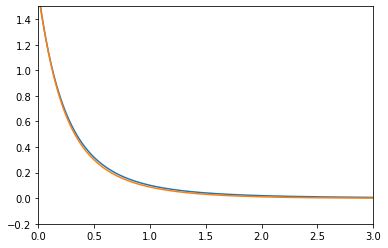

In [8]:
fname = 'ff_kelly.dat'
data = np.loadtxt(fname, unpack=True, skiprows=0)
nQ2 = len(data[0,:])
Q2 =  np.zeros(nQ2)
ges = np.zeros(nQ2)
gms = np.zeros(nQ2)
gev = np.zeros(nQ2)
gmv = np.zeros(nQ2)
ga = np.zeros(nQ2)
Q2 = data[0,:]
ges = data[1,:]
gms = data[2,:]
gev = data[3,:]
gmv = data[4,:]
ga = data[5,:]
#plt.plot(Q2/10**6,gev**2, color='blue')
plt.plot(Q2/10**6,ga**2 )
#plt.plot(Q2/10**6,gmv**2, color='red' )
#plt.yscale('log')

# plotting my axial form factor
plt.plot(Q2/10**6, gv.mean(FAzq(Q2/10**6, coeffs))**2)

# plotting the fractional difference
#plt.plot(Q2/10**6, (-gv.mean(FAzq(Q2/10**6, coeffs))**2 + ga**2)/ga**2)

plt.xlim(0.0, 3.0)
plt.ylim(-0.2, 1.5)
plt.show()

In [9]:
from scipy import interpolate
ges_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ges)
gms_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gms)
gev_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gev)
gmv_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gmv)
ga_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga)

In [10]:
gev_interpolate(9900)

array(0.96469923)

In [11]:
# creating interpolates from the axial form factors that i defined

# the ga in the interpolate is a list of numbers, so i need to create a list of numbers for my z-exp and my dipole
ga_zq = gv.mean(FAzq(Q2/10**6, coeffs))
ga_dipq = gv.mean(FAdipq(Q2/10**6, mA2))

# and doing the interpolations
ga_zq_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga_zq)
ga_dipq_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga_dipq)

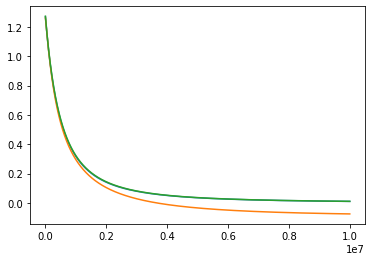

In [12]:
plt.plot(Q2, ga)
plt.plot(Q2, ga_zq)
plt.plot(Q2, ga_dipq)
plt.show()

In [13]:
wqe = np.sqrt(qR**2+mn**2)-mn
Q2qe = qR**2 - wqe**2
tauqe = Q2qe/4/mn**2

In [14]:
# creating the arrays for the response functions for the z-expansion
R00_cc_1b_zexp = np.zeros((nwR, nq, 3))
R0z_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rzz_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rxx_cc_1b_zexp = np.zeros((nwR, nq, 3))
R00_cc_12b_zexp = np.zeros((nwR, nq, 3))
R0z_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rzz_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rxx_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rxy_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rxy_cc_12b_zexp = np.zeros((nwR, nq, 3))

In [15]:
# creating empty arrays to fill with *ONLY* the vector components of the response functions
R00_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
R0z_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
Rzz_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxx_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
R00_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
R0z_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
Rzz_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxx_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxy_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxy_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))

In [16]:
for i in range (nq):
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    #print('Q2qe: '+str(Q2qe))
    Gev_qe = gev_interpolate(Q2qe)
    Gmv_qe = gmv_interpolate(Q2qe)
    GA_qe = ga_interpolate(Q2qe)
    #print('Gev_qe: '+str(Gev_qe))
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        Gmvj = gmv_interpolate(Q2j)
        # defining both the dipole and the z-expansion versions
        GAj_dip = ga_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        #if j == 5:
        #    print('Gs')
        #    print(qR[i])
        #    print(GAj_dip)
        #    print(GAj_zexp)
        
        f_V=Gevj**2/Gev_qe**2
        f_VM=Gmvj**2/Gmv_qe**2
        # defining both the dipole and the z-expansion versions
        f_A_dip = GAj_dip**2/GA_qe**2
        f_A_zexp = GAj_zexp**2/GA_qe**2
        #if j == 5:
        #    print('fs')
        #    #print(Q2j)
        #    print(f_A_dip)
        #    print(f_A_zexp)
        
        # first defining all the dipole response functions
        #print(R00_vec_1b[j,i,:]*f_V)
        R00_cc_1b_dip[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_dip
        Rxx_cc_1b_dip[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_dip
        Rzz_cc_1b_dip[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_dip
        R0z_cc_1b_dip[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_dip
        Rxy_cc_1b_dip[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_dip)*np.sqrt(f_VM)
        #
        R00_cc_12b_dip[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_dip
        Rxx_cc_12b_dip[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_dip
        Rzz_cc_12b_dip[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_dip
        R0z_cc_12b_dip[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_dip
        Rxy_cc_12b_dip[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_dip)*np.sqrt(f_VM)
        
        # next definining all the z-expansion response functions
        R00_cc_1b_zexp[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_zexp
        Rxx_cc_1b_zexp[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_zexp
        Rzz_cc_1b_zexp[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_zexp
        R0z_cc_1b_zexp[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_zexp
        Rxy_cc_1b_zexp[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_zexp)*np.sqrt(f_VM)
        #
        R00_cc_12b_zexp[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_zexp
        Rxx_cc_12b_zexp[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_zexp
        Rzz_cc_12b_zexp[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_zexp
        R0z_cc_12b_zexp[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_zexp
        Rxy_cc_12b_zexp[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_zexp)*np.sqrt(f_VM)
        
        # next defining only the vector components of the response functions
        R00_cc_1b_dip_just_vector[j,i,:]=R00_vec_1b[j,i,:]*f_V
        Rxx_cc_1b_dip_just_vector[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM
        Rzz_cc_1b_dip_just_vector[j,i,:]=Rzz_vec_1b[j,i,:]*f_V
        R0z_cc_1b_dip_just_vector[j,i,:]=R0z_vec_1b[j,i,:]*f_V
        Rxy_cc_1b_dip_just_vector[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_VM)
        #
        R00_cc_12b_dip_just_vector[j,i,:]=R00_vec_12b[j,i,:]*f_V
        Rxx_cc_12b_dip_just_vector[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM
        Rzz_cc_12b_dip_just_vector[j,i,:]=Rzz_vec_12b[j,i,:]*f_V
        R0z_cc_12b_dip_just_vector[j,i,:]=R0z_vec_12b[j,i,:]*f_V
        Rxy_cc_12b_dip_just_vector[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_VM)

(0.0, 200.0)

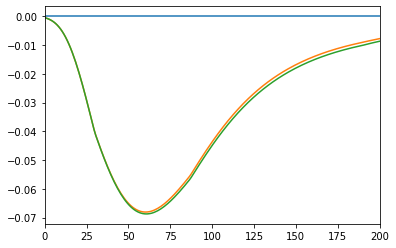

In [18]:
plt.plot(wR,Rxy_ct_1b_dip[:,1,1])
# my cc graph differs from Noemi's (but only for the xy case)
plt.plot(wR,Rxy_cc_1b_dip[:,1,1])
plt.plot(wR,Rxy_cc_1b_dip_just_vector[:,1,1])

plt.xlim(0,200)

In [ ]:
#1/0

# Comparing the response functions for the z-expansion vs the dipole

In [ ]:
# given: R00_ct_1b_dip[:,i,j]
# this gives a list of the 5000 values of the i-th qR value (i=1 corresponds to qR=200)
# and the j-index tells you if you use the average (j=2), minimum (j=1), or maximum(j=0)

[7.39367324e-04 8.77241769e-04 1.03433000e-03 ... 1.18927420e-06
 1.18453326e-06 1.17980879e-06]


Text(0, 0.5, '$R_{00}$')

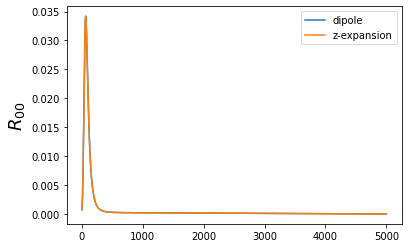

In [19]:
print(R00_cc_1b_dip[:,1,1])
plt.plot(wR,R00_cc_1b_dip[:,1,1], label='dipole')
plt.plot(wR,R00_cc_1b_zexp[:,1,1], label='z-expansion')
#plt.xlim(0,200)
plt.legend(loc=1)
plt.ylabel(r'$R_{00}$', size=18)
#plt.yscale('log')

In [ ]:
#plt.plot(wR,Rxx_ax_1b_dip[:,1,1], label='dipole')
#plt.plot(wR,Rxx_vec_1b_dip[:,1,1], label='dipole')
#plt.plot(wR, Rxx_ax_1b_dip[:,1,1])
#plt.plot(wR, Rxx_ax_1b_zexp[:,1,1])
#plt.xlim(0,200)
#plt.yscale('log')
#plt.show()


Text(0.5, 33.0, '$\\omega$')

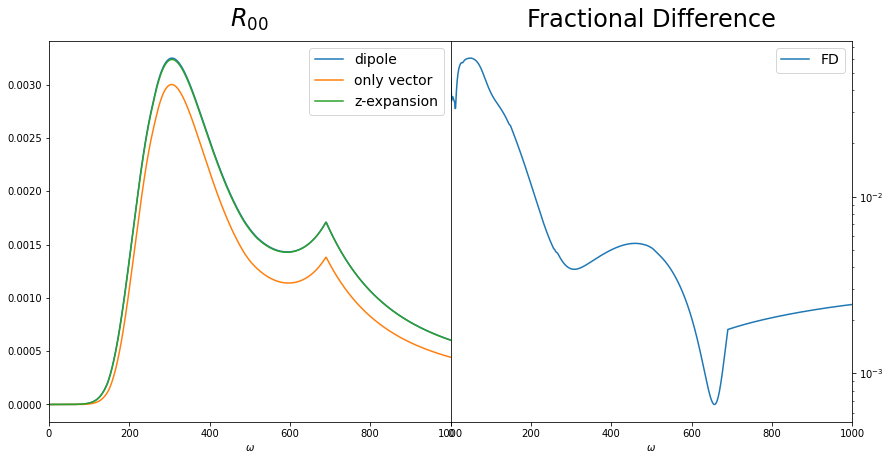

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

ax1.plot(wR,R00_cc_1b_dip[:,6,1], label='dipole')
ax1.plot(wR,R00_cc_1b_dip_just_vector[:,6,1], label='only vector')
ax1.plot(wR,R00_cc_1b_zexp[:,6,1], label='z-expansion')

# a fancy label for the below: label=r'$\frac{R_{00}^{z-exp} - R_{00}^{Dip}}{R_{00}^{Dip}}'
#ax2.plot(wR,(R00_cc_1b_zexp[:,6,1]-R00_cc_1b_dip[:,6,1])/R00_cc_1b_dip[:,6,1], label='FD')
# if i want to make the right graph a log plot
ax2.plot(wR,np.abs((R00_cc_1b_zexp[:,6,1]-R00_cc_1b_dip[:,6,1])/R00_cc_1b_dip[:,6,1]), label='FD')
ax2.set_yscale('log')

ax1.set_title(r'$R_{00}$', fontsize=24, y=1.02)
ax1.set_xlim(0,1000)
ax1.legend(loc=0, prop={'size': 14})

ax2.set_title(r'Fractional Difference', fontsize=24, y=1.02)
ax2.set_xlim(0,1000)
#ax2.set_ylim(-0.002, 0.002)
ax2.legend(loc=0, prop={'size': 14})
ax2.yaxis.tick_right()

ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')

#fig.savefig('fractional_difference_R00_1b.png',bbox_inches='tight')

Text(0, 0.5, '$R_{0z}$')

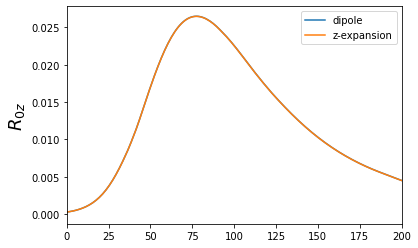

In [21]:
plt.plot(wR,R0z_cc_1b_dip[:,1,1], label='dipole')
plt.plot(wR,R0z_cc_1b_zexp[:,1,1], label='z-expansion')
plt.xlim(0,200)
plt.legend(loc=1)
plt.ylabel(r'$R_{0z}$', size=18)
#plt.yscale('log')

Text(0.5, 33.0, '$\\omega$')

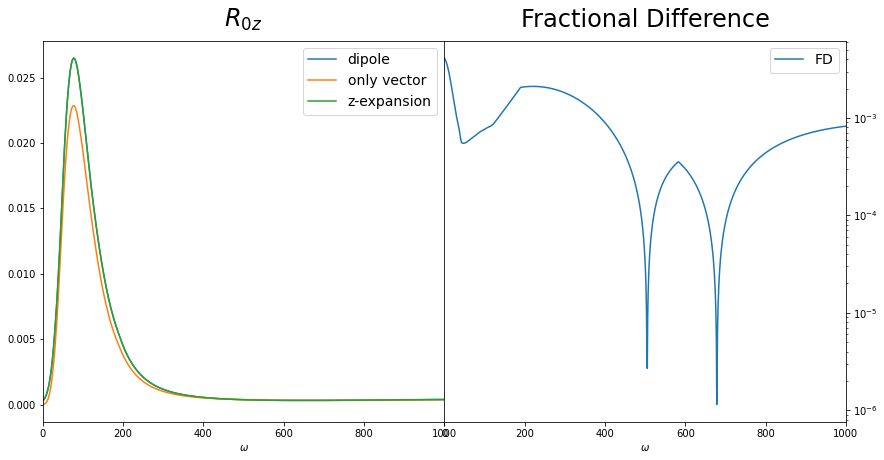

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

ax1.plot(wR,R0z_cc_1b_dip[:,1,1], label='dipole')
ax1.plot(wR,R0z_cc_1b_dip_just_vector[:,1,1], label='only vector')
ax1.plot(wR,R0z_cc_1b_zexp[:,1,1], label='z-expansion')

#ax2.plot(wR,(R0z_cc_1b_zexp[:,1,1]-R0z_cc_1b_dip[:,1,1])/R0z_cc_1b_dip[:,1,1], label='FD')
# if i want to make the right graph a log plot
ax2.plot(wR,np.abs((R0z_cc_1b_zexp[:,1,1]-R0z_cc_1b_dip[:,1,1])/R0z_cc_1b_dip[:,1,1]), label='FD')
ax2.set_yscale('log')

ax1.set_title(r'$R_{0z}$', fontsize=24, y=1.02)
ax1.set_xlim(0,1000)
ax1.legend(loc=0, prop={'size': 14})

ax2.set_title(r'Fractional Difference', fontsize=24, y=1.02)
ax2.set_xlim(0,1000)
#ax2.set_ylim(-0.002, 0.002)
ax2.legend(loc=0, prop={'size': 14})
ax2.yaxis.tick_right()

ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')

#fig.savefig('fractional_difference_R0z_1b.png',bbox_inches='tight')

Text(0, 0.5, '$R_{zz}$')

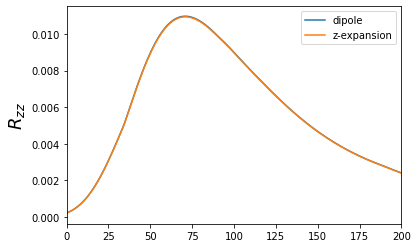

In [23]:
plt.plot(wR,Rzz_cc_1b_dip[:,1,1], label='dipole')
plt.plot(wR,Rzz_cc_1b_zexp[:,1,1], label='z-expansion')
plt.xlim(0,200)
plt.legend(loc=1)
plt.ylabel(r'$R_{zz}$', size=18)
#plt.yscale('log')

Text(0.5, 33.0, '$\\omega$')

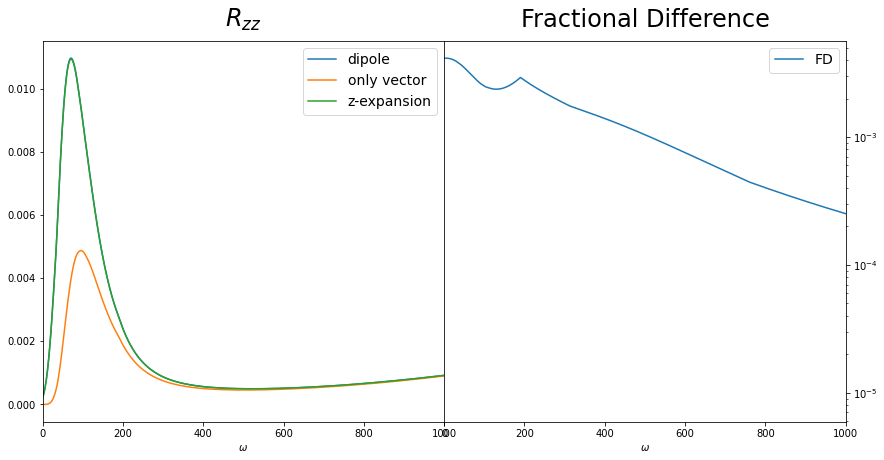

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

ax1.plot(wR,Rzz_cc_1b_dip[:,1,1], label='dipole')
ax1.plot(wR,Rzz_cc_1b_dip_just_vector[:,1,1], label='only vector')
ax1.plot(wR,Rzz_cc_1b_zexp[:,1,1], label='z-expansion')

#ax2.plot(wR,(Rzz_cc_1b_zexp[:,1,1]-Rzz_cc_1b_dip[:,1,1])/Rzz_cc_1b_dip[:,1,1], label='FD')
# if i want to make the right graph a log plot
ax2.plot(wR,np.abs((Rzz_cc_1b_zexp[:,1,1]-Rzz_cc_1b_dip[:,1,1])/Rzz_cc_1b_dip[:,1,1]), label='FD')
ax2.set_yscale('log')

ax1.set_title(r'$R_{zz}$', fontsize=24, y=1.02)
ax1.set_xlim(0,1000)
ax1.legend(loc=0, prop={'size': 14})

ax2.set_title(r'Fractional Difference', fontsize=24, y=1.02)
ax2.set_xlim(0,1000)
#ax2.set_ylim(-0.002, 0.002)
ax2.legend(loc=0, prop={'size': 14})
ax2.yaxis.tick_right()

ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')

#fig.savefig('fractional_difference_Rzz_1b.png',bbox_inches='tight')

Text(0, 0.5, '$R_{xx}$')

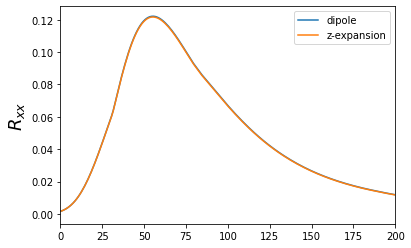

In [25]:
plt.plot(wR,Rxx_cc_1b_dip[:,1,1], label='dipole')
plt.plot(wR,Rxx_cc_1b_zexp[:,1,1], label='z-expansion')
plt.xlim(0,200)
plt.legend(loc=1)
plt.ylabel(r'$R_{xx}$', size=18)
#plt.yscale('log')

Text(0.5, 33.0, '$\\omega$')

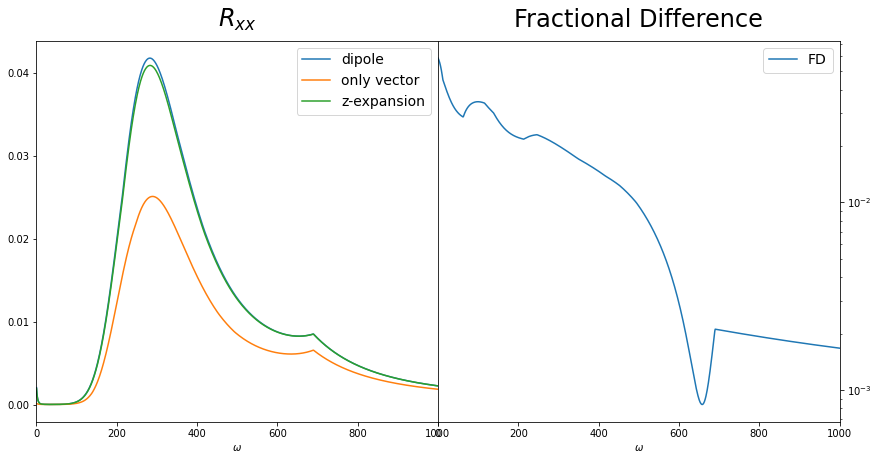

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

ax1.plot(wR,Rxx_cc_1b_dip[:,6,1], label='dipole')
ax1.plot(wR,Rxx_cc_1b_dip_just_vector[:,6,1], label='only vector')
ax1.plot(wR,Rxx_cc_1b_zexp[:,6,1], label='z-expansion')

#ax2.plot(wR,(Rxx_cc_1b_zexp[:,1,1]-Rxx_cc_1b_dip[:,1,1])/Rxx_cc_1b_dip[:,1,1], label='FD')
# if i want to make the right graph a log plot
ax2.plot(wR,np.abs((Rxx_cc_1b_zexp[:,6,1]-Rxx_cc_1b_dip[:,6,1])/Rxx_cc_1b_dip[:,6,1]), label='FD')
ax2.set_yscale('log')

ax1.set_title(r'$R_{xx}$', fontsize=24, y=1.02)
ax1.set_xlim(0,1000)
ax1.legend(loc=0, prop={'size': 14})

ax2.set_title(r'Fractional Difference', fontsize=24, y=1.02)
ax2.set_xlim(0,1000)
#ax2.set_ylim(-0.002, 0.002)
ax2.legend(loc=0, prop={'size': 14})
ax2.yaxis.tick_right()

ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')

#fig.savefig('fractional_difference_Rxx_1b.png',bbox_inches='tight')

In [27]:
#somethingnew = (Rxx_cc_1b_zexp[:,1,1]-Rxx_cc_1b_dip[:,1,1])/Rxx_cc_1b_dip[:,1,1]
#somethingnew
#Rxx_cc_1b_dip[:,1,1]
#Rxx_cc_1b_zexp[:,1,1]-Rxx_cc_1b_dip[:,1,1]

Text(0, 0.5, '$R_{xy}$')

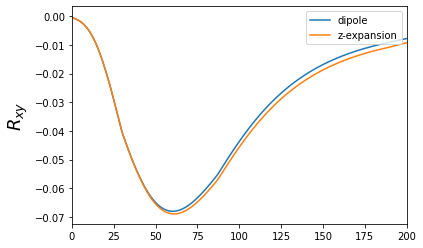

In [28]:
plt.plot(wR,Rxy_cc_1b_dip[:,1,1], label='dipole')
plt.plot(wR,Rxy_cc_1b_zexp[:,1,1], label='z-expansion')
plt.xlim(0,200)
plt.legend(loc=1)
plt.ylabel(r'$R_{xy}$', size=18)
#plt.yscale('log')

Text(0.5, 33.0, '$\\omega$')

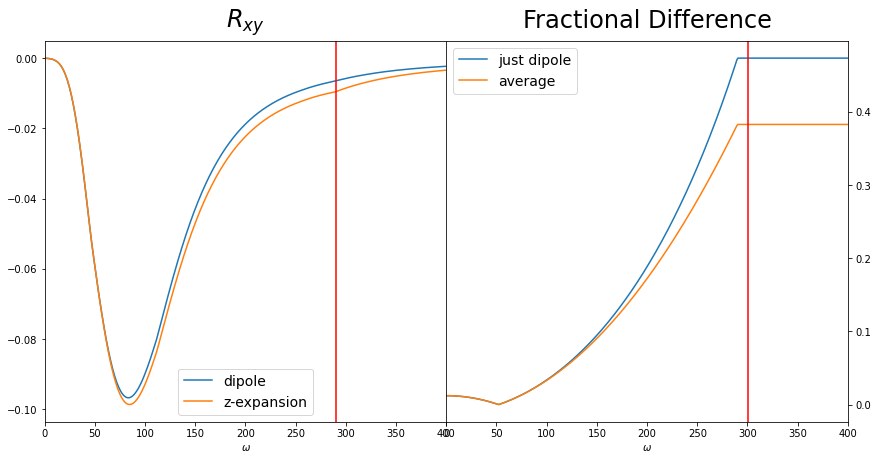

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

which_qR_value = 2

ax1.plot(wR,Rxy_cc_1b_dip[:,which_qR_value,1], label='dipole')
#ax1.plot(wR,Rxy_cc_1b_dip_just_vector[:,which_qR_value,1], label='only vector')
ax1.plot(wR,Rxy_cc_1b_zexp[:,which_qR_value,1], label='z-expansion')

#ax2.plot(wR,(Rxy_cc_1b_zexp[:,1,1]-Rxy_cc_1b_dip[:,1,1])/Rxy_cc_1b_dip[:,1,1], label='FD')
# if i want to make the right graph a log plot
ax2.plot(wR,np.abs((Rxy_cc_1b_zexp[:,which_qR_value,1]-Rxy_cc_1b_dip[:,which_qR_value,1])/Rxy_cc_1b_dip[:,which_qR_value,1]), label='just dipole')
#ax2.plot(wR,np.abs((Rxy_cc_1b_zexp[:,which_qR_value,1]-Rxy_cc_1b_dip[:,which_qR_value,1])), label='FD')
ax2.plot(wR,np.abs(2*(Rxy_cc_1b_zexp[:,which_qR_value,1]-Rxy_cc_1b_dip[:,which_qR_value,1])/(Rxy_cc_1b_zexp[:,which_qR_value,1]+Rxy_cc_1b_dip[:,which_qR_value,1])), label='average')
#ax2.plot(wR, 1.3324857443613807*np.ones(wR.size))
#ax2.set_yscale('log')

ax1.set_title(r'$R_{xy}$', fontsize=24, y=1.02)
ax1.axvline(wR[qR[which_qR_value]-10], color='red')
#ax1.set_xlim(0,qR[6])
#ax1.set_xlim(0,2000)
ax1.set_xlim(0,400)
ax1.legend(loc=0, prop={'size': 14})

ax2.set_title(r'Fractional Difference', fontsize=24, y=1.02)
ax2.axvline(wR[qR[which_qR_value]], color='red')
#ax2.set_xlim(0,qR[6])
#ax2.set_xlim(0,2000)
ax2.set_xlim(0,400)
#ax2.set_ylim(-0.002, 0.002)
ax2.legend(loc=0, prop={'size': 14})
ax2.yaxis.tick_right()

ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')

#fig.savefig('fractional_difference_Rxy_1b.png',bbox_inches='tight')

In [30]:
which_qR_value = 2
difference_array_xy = (Rxy_cc_1b_zexp[:,which_qR_value,1]-Rxy_cc_1b_dip[:,which_qR_value,1])
#print(difference_array_xy[4990:])
#print(difference_array_xy[:10])

In [31]:
average_array_xy = (Rxy_cc_1b_zexp[:,which_qR_value,1]+Rxy_cc_1b_dip[:,which_qR_value,1])/2
#print(average_array_xy[4990:])
#print(average_array_xy[:10])

In [32]:
# for qR_value=2
print(difference_array_xy[289:291]/average_array_xy[289:291])
#print(difference_array_xy[290]/average_array_xy[290])
print(qR[which_qR_value])

# for qR_value=3
#print(difference_array_xy[389:391]/average_array_xy[389:391])
#print(difference_array_xy[390]/average_array_xy[390])
#print(qR[which_qR_value])

# for qR_value=4
#print(difference_array_xy[489:491]/average_array_xy[489:491])
#print(difference_array_xy[490]/average_array_xy[490])
#print(qR[which_qR_value])


print(difference_array_xy[4999]/average_array_xy[4999])

[0.38142471 0.38281715]
300
0.3828171508807084


In [33]:
print(difference_array_xy[285:305])
print(' ')
#print(average_array_xy[285:305])
print(Rxy_cc_1b_dip[:,which_qR_value,1][285:305])
print(' ')
#print(difference_array_xy[285:305]/average_array_xy[285:305])
print(difference_array_xy[285:305]/Rxy_cc_1b_dip[:,which_qR_value,1][285:305])

[-0.00307314 -0.00307327 -0.00307357 -0.00307402 -0.00307464 -0.00305699
 -0.00302141 -0.00298641 -0.00295198 -0.00291811 -0.00288479 -0.00285201
 -0.00281976 -0.00278803 -0.00275681 -0.00272608 -0.00269584 -0.00266609
 -0.0026368  -0.00260797]
 
[-0.00676088 -0.00670005 -0.00664024 -0.00658143 -0.00652361 -0.00645702
 -0.00638186 -0.00630793 -0.00623521 -0.00616367 -0.0060933  -0.00602406
 -0.00595594 -0.00588892 -0.00582296 -0.00575806 -0.0056942  -0.00563134
 -0.00556948 -0.00550859]
 
[0.45454669 0.45869424 0.46287039 0.46707531 0.4713092  0.47343707
 0.47343707 0.47343707 0.47343707 0.47343707 0.47343707 0.47343707
 0.47343707 0.47343707 0.47343707 0.47343707 0.47343707 0.47343707
 0.47343707 0.47343707]


## $R_{00}$ - one body

In [34]:
eps=50.
mn=939.
mpi=139.
kF=260.
mstar=1.0
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/(mn*mstar)-eps)
G00_vc = np.zeros((nq,nwR))
G00_ac = np.zeros((nq,nwR))
G00_cc_dip = np.zeros((nq,nwR))
G00_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        G00_vc[i,j] = (((Gen-Gep-2*Gmn+2*Gmp)**2*(kF-pG)*(kF+pG)*qR[i]**2)/(32*mn**4)+(Gen-Gep)**2/(1+tauqe[i]))/qR[i]
        G00_ac[i,j] = ((GA**2*(2*(kF**2+pG**2)+4*pG*qR[i]+qR[i]**2))/(4*mn**2)-(GA*gps*qR[i]*(2*pG+qR[i])*wqe[i])/mn
                    + gps**2*qR[i]**2*wqe[i]**2)/qR[i]
        G00_cc_dip[i,j] = G00_vc[i,j]*Gevj**2/Gev**2 + G00_ac[i,j]*GAj_dip**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G00_cc_min_dip[i] = G00_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G00_cc_dip[i,j] = G00_cc_min_dip[i]
        G00_cc_dip[i,j] = G00_cc_dip[i,j] / kF * ( mn * 6 ) 

In [35]:
# now looking at the z-case for R00

# making the G00_cc arrays for the z-expansion case
G00_cc_zexp = np.zeros((nq,nwR))
G00_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        G00_cc_zexp[i,j] = G00_vc[i,j]*Gevj**2/Gev**2 + G00_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G00_cc_min_zexp[i] = G00_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G00_cc_zexp[i,j] = G00_cc_min_zexp[i]
        G00_cc_zexp[i,j] = G00_cc_zexp[i,j] / kF * ( mn * 6 ) 

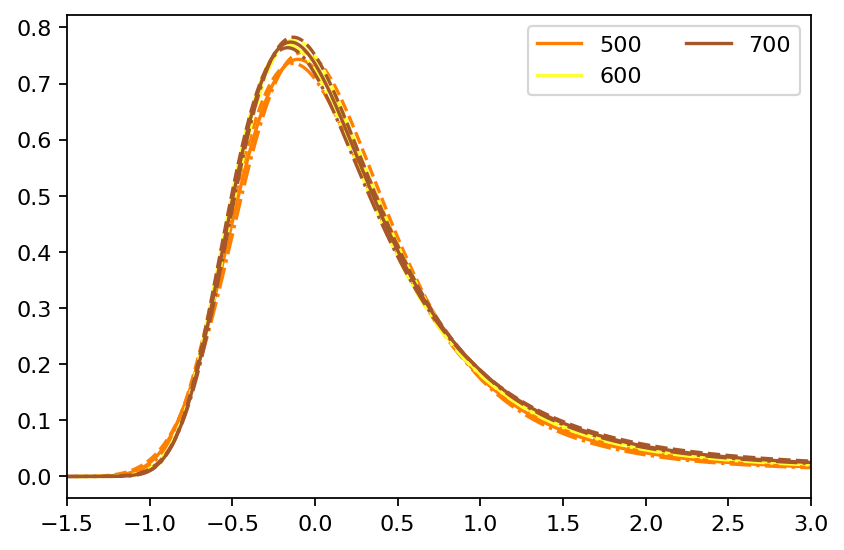

In [36]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R00_cc_1b_dip[:,i,2]/G00_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_1b_dip[:,i,1]/G00_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R00_cc_1b_dip[:,i,0]/G00_cc_dip[i,:], color=palette(i), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.legend(loc=1, ncol=2)
plt.show() 
data_dip=np.array([y[:,4],R00_cc_1b_dip[:,4,0]/G00_cc_dip[4,:],R00_cc_1b_dip[:,4,2]/G00_cc_dip[4,:],R00_cc_1b_dip[:,4,1]/G00_cc_dip[4,:],
               y[:,5],R00_cc_1b_dip[:,5,0]/G00_cc_dip[5,:],R00_cc_1b_dip[:,5,2]/G00_cc_dip[5,:],R00_cc_1b_dip[:,5,1]/G00_cc_dip[5,:],
               y[:,6],R00_cc_1b_dip[:,6,0]/G00_cc_dip[6,:],R00_cc_1b_dip[:,6,2]/G00_cc_dip[6,:],R00_cc_1b_dip[:,6,1]/G00_cc_dip[6,:]])
data_dip = data_dip.T
#np.savetxt('F_00_1b_dip.dat', data_dip)

In [37]:
R00_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_1b_dip[:,6,2]/G00_cc_dip[6,:])
R00_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_1b_dip[:,5,2]/G00_cc_dip[5,:])

R00_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_1b_zexp[:,6,2]/G00_cc_zexp[6,:])
R00_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_1b_zexp[:,5,2]/G00_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R00_cc_1b_dip[i,j,0] = R00_cc_1b_interpolate_600_dip(y[i,j])*G00_cc_dip[j,i]
        R00_cc_1b_dip[i,j,2] = R00_cc_1b_interpolate_700_dip(y[i,j])*G00_cc_dip[j,i]
        err_dip =  2 * (R00_cc_1b_dip[i,j,2] - R00_cc_1b_dip[i,j,0])
        R00_cc_1b_dip[i,j,1] = R00_cc_1b_dip[i,j,2] + err_dip
        R00_cc_1b_dip[i,j,0] = R00_cc_1b_dip[i,j,2] - err_dip
        
        R00_cc_1b_zexp[i,j,0] = R00_cc_1b_interpolate_600_zexp(y[i,j])*G00_cc_zexp[j,i]
        R00_cc_1b_zexp[i,j,2] = R00_cc_1b_interpolate_700_zexp(y[i,j])*G00_cc_zexp[j,i]
        err_zexp =  2 * (R00_cc_1b_zexp[i,j,2] - R00_cc_1b_zexp[i,j,0])
        R00_cc_1b_zexp[i,j,1] = R00_cc_1b_zexp[i,j,2] + err_zexp
        R00_cc_1b_zexp[i,j,0] = R00_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R00_cc_1b_dip[i,j,:] = 0
            R00_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if R00_cc_1b_dip[i,j,k] < 0:  R00_cc_1b_dip[i,j,k] = 0
            if R00_cc_1b_zexp[i,j,k] < 0:  R00_cc_1b_zexp[i,j,k] = 0

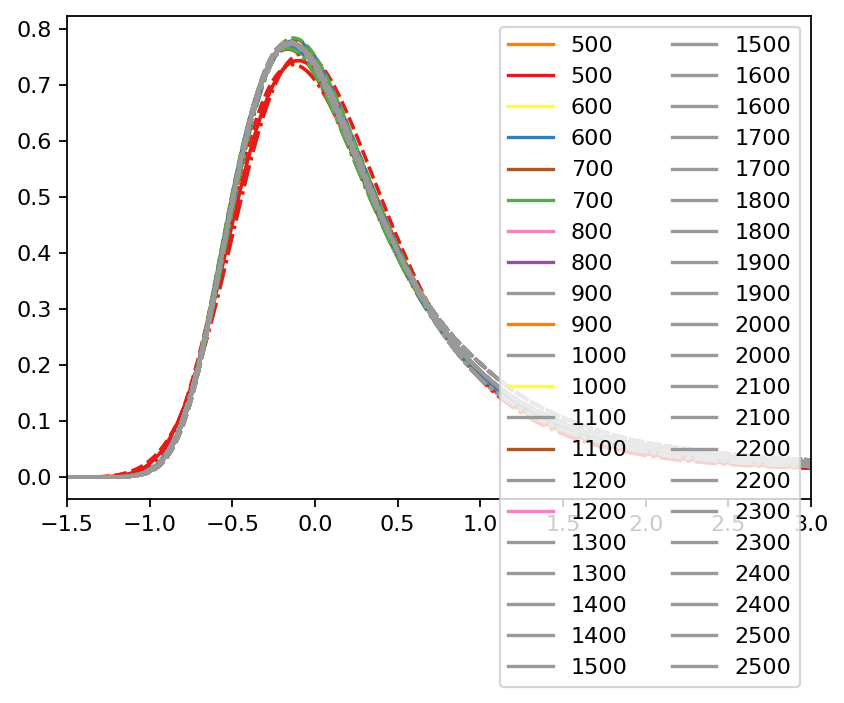

In [38]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,nq):
    plt.plot(y[:,i], R00_cc_1b_dip[:,i,2]/G00_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_1b_dip[:,i,1]/G00_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R00_cc_1b_dip[:,i,0]/G00_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R00_cc_1b_zexp[:,i,2]/G00_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_1b_zexp[:,i,1]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], R00_cc_1b_zexp[:,i,0]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.legend(loc=1, ncol=2)
plt.show() 

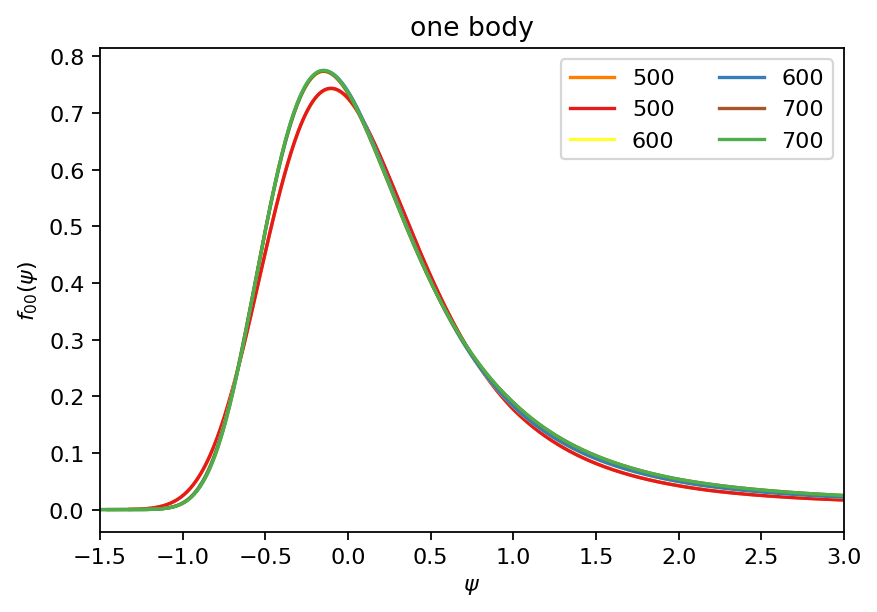

In [39]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R00_cc_1b_dip[:,i,2]/G00_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], R00_cc_1b_dip[:,i,1]/G00_cc_dip[i,:], color=palette(i), linestyle='--')
    #plt.plot(y[:,i], R00_cc_1b_dip[:,i,0]/G00_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R00_cc_1b_zexp[:,i,2]/G00_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], R00_cc_1b_zexp[:,i,1]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    #plt.plot(y[:,i], R00_cc_1b_zexp[:,i,0]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.xlabel(r'$\psi$')
plt.title('one body')
plt.ylabel(r'$f_{00}(\psi)$')
plt.legend(loc=1, ncol=2)
plt.show() 

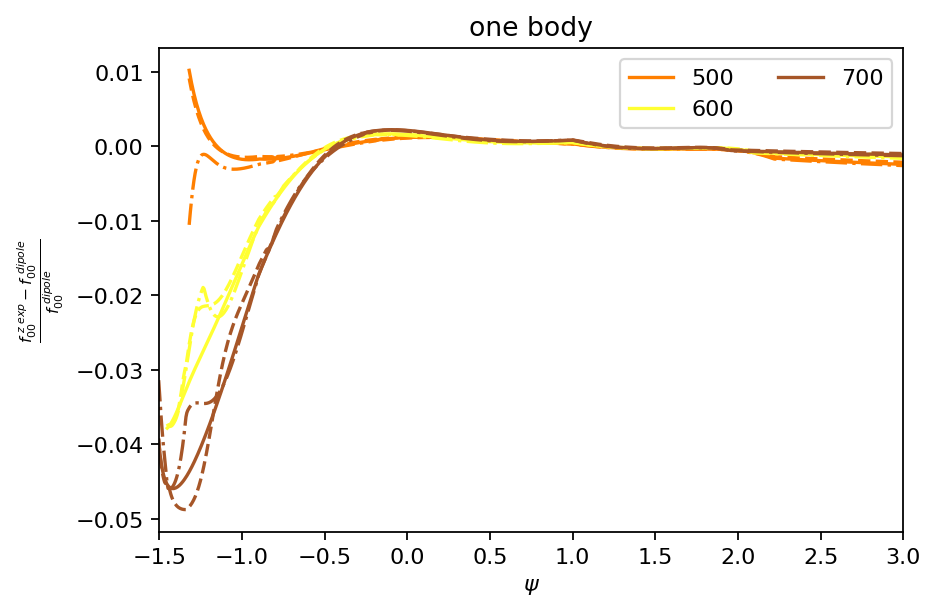

In [40]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R00_cc_1b_dip[:,i,2]/G00_cc_dip[i,:]
    dip1 = R00_cc_1b_dip[:,i,1]/G00_cc_dip[i,:]
    dip0 = R00_cc_1b_dip[:,i,0]/G00_cc_dip[i,:]
    z2 = R00_cc_1b_zexp[:,i,2]/G00_cc_zexp[i,:]
    z1 = R00_cc_1b_zexp[:,i,1]/G00_cc_zexp[i,:]
    z0 = R00_cc_1b_zexp[:,i,0]/G00_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.legend(loc=1, ncol=2)
plt.title('one body')
plt.xlabel(r'$\psi$')

# plotting the difference
#plt.ylabel(r'$f_{00}^{\ z \ exp} - f_{00}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{00}^{\ z \ exp} - f_{00}^{\ dipole}}{f_{00}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_f00_1b.png',bbox_inches='tight')
plt.show() 

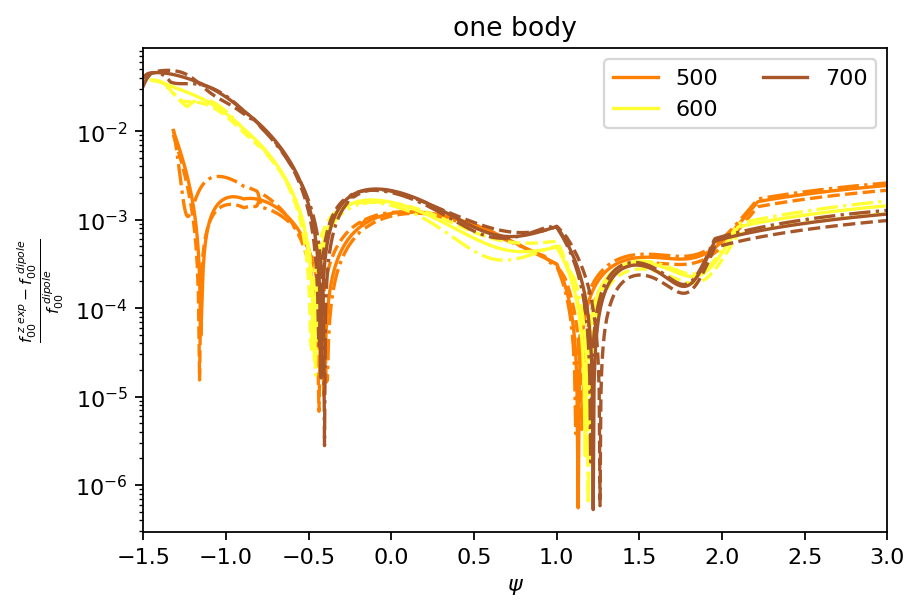

In [41]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R00_cc_1b_dip[:,i,2]/G00_cc_dip[i,:]
    dip1 = R00_cc_1b_dip[:,i,1]/G00_cc_dip[i,:]
    dip0 = R00_cc_1b_dip[:,i,0]/G00_cc_dip[i,:]
    z2 = R00_cc_1b_zexp[:,i,2]/G00_cc_zexp[i,:]
    z1 = R00_cc_1b_zexp[:,i,1]/G00_cc_zexp[i,:]
    z0 = R00_cc_1b_zexp[:,i,0]/G00_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.legend(loc=1, ncol=2)
plt.title('one body')
plt.xlabel(r'$\psi$')

# plotting the difference
#plt.ylabel(r'$f_{00}^{\ z \ exp} - f_{00}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{00}^{\ z \ exp} - f_{00}^{\ dipole}}{f_{00}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_f00_1b_log.png',bbox_inches='tight')
plt.show() 

## $R_{00}$ - one-two body

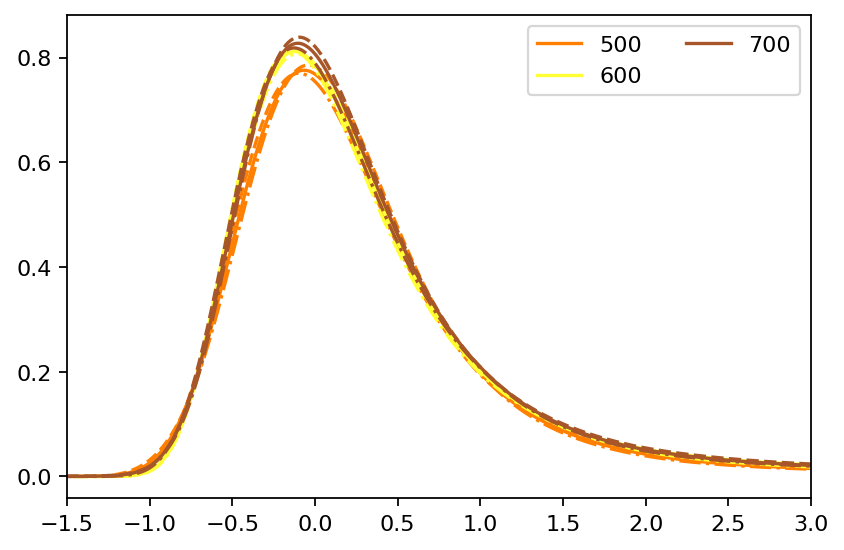

In [42]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,2]/G00_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,1]/G00_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,0]/G00_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3.)
plt.legend(loc=1, ncol=2)
plt.show() 
data_dip=np.array([y[:,4],R00_cc_12b_dip[:,4,0]/G00_cc_dip[4,:],R00_cc_12b_dip[:,4,2]/G00_cc_dip[4,:],R00_cc_12b_dip[:,4,1]/G00_cc_dip[4,:],
                   y[:,5],R00_cc_12b_dip[:,5,0]/G00_cc_dip[5,:],R00_cc_12b_dip[:,5,2]/G00_cc_dip[5,:],R00_cc_12b_dip[:,5,1]/G00_cc_dip[5,:],
                   y[:,6],R00_cc_12b_dip[:,6,0]/G00_cc_dip[6,:],R00_cc_12b_dip[:,6,2]/G00_cc_dip[6,:],R00_cc_12b_dip[:,6,1]/G00_cc_dip[6,:]])
data_dip = data_dip.T
#np.savetxt('F_00_12b_dip.dat', data_dip)

In [43]:
R00_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_12b_dip[:,6,2]/G00_cc_dip[6,:])
R00_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_12b_dip[:,5,2]/G00_cc_dip[5,:])

R00_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_12b_zexp[:,6,2]/G00_cc_zexp[6,:])
R00_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_12b_zexp[:,5,2]/G00_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R00_cc_12b_dip[i,j,0] = R00_cc_12b_interpolate_600_dip(y[i,j])*G00_cc_dip[j,i]
        R00_cc_12b_dip[i,j,2] = R00_cc_12b_interpolate_700_dip(y[i,j])*G00_cc_dip[j,i]
        err_dip = 2 * (R00_cc_12b_dip[i,j,2] - R00_cc_12b_dip[i,j,0])
        R00_cc_12b_dip[i,j,1] = R00_cc_12b_dip[i,j,2] + err_dip
        R00_cc_12b_dip[i,j,0] = R00_cc_12b_dip[i,j,2] - err_dip
        
        R00_cc_12b_zexp[i,j,0] = R00_cc_12b_interpolate_600_zexp(y[i,j])*G00_cc_zexp[j,i]
        R00_cc_12b_zexp[i,j,2] = R00_cc_12b_interpolate_700_zexp(y[i,j])*G00_cc_zexp[j,i]
        err_zexp = 2 * (R00_cc_12b_zexp[i,j,2] - R00_cc_12b_zexp[i,j,0])
        R00_cc_12b_zexp[i,j,1] = R00_cc_12b_zexp[i,j,2] + err_zexp
        R00_cc_12b_zexp[i,j,0] = R00_cc_12b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R00_cc_12b_dip[i,j,:] = 0
            R00_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if R00_cc_12b_dip[i,j,k] < 0:  R00_cc_12b_dip[i,j,k] = 0
            if R00_cc_12b_zexp[i,j,k] < 0:  R00_cc_12b_zexp[i,j,k] = 0

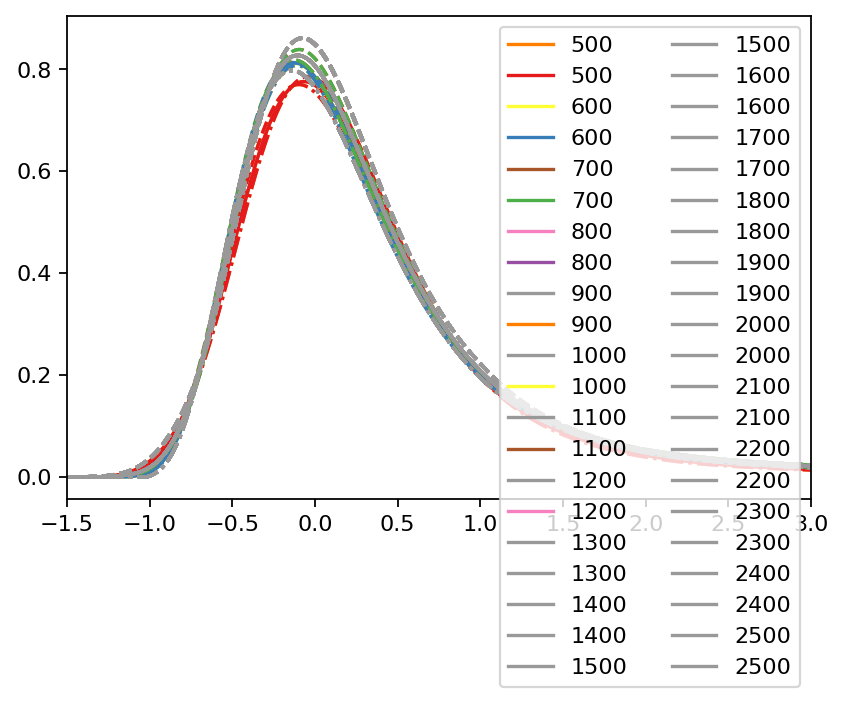

In [44]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,nq):
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,2]/G00_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,1]/G00_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,0]/G00_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R00_cc_12b_zexp[:,i,2]/G00_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_12b_zexp[:,i,1]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], R00_cc_12b_zexp[:,i,0]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3.)
plt.legend(loc=1, ncol=2)
plt.show() 

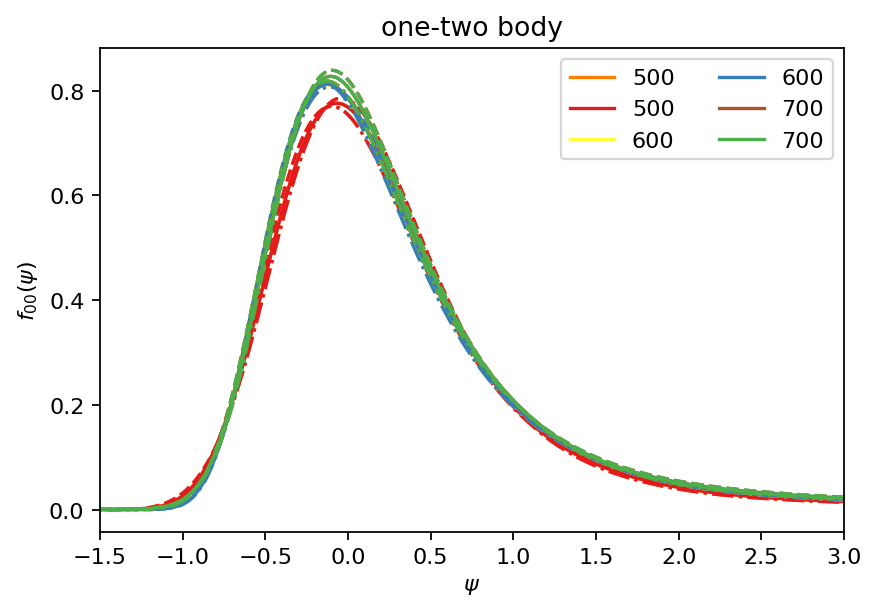

In [45]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,2]/G00_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,1]/G00_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R00_cc_12b_dip[:,i,0]/G00_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R00_cc_12b_zexp[:,i,2]/G00_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R00_cc_12b_zexp[:,i,1]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], R00_cc_12b_zexp[:,i,0]/G00_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.ylabel(r'$f_{00}(\psi)$')
plt.legend(loc=1, ncol=2)
plt.show() 

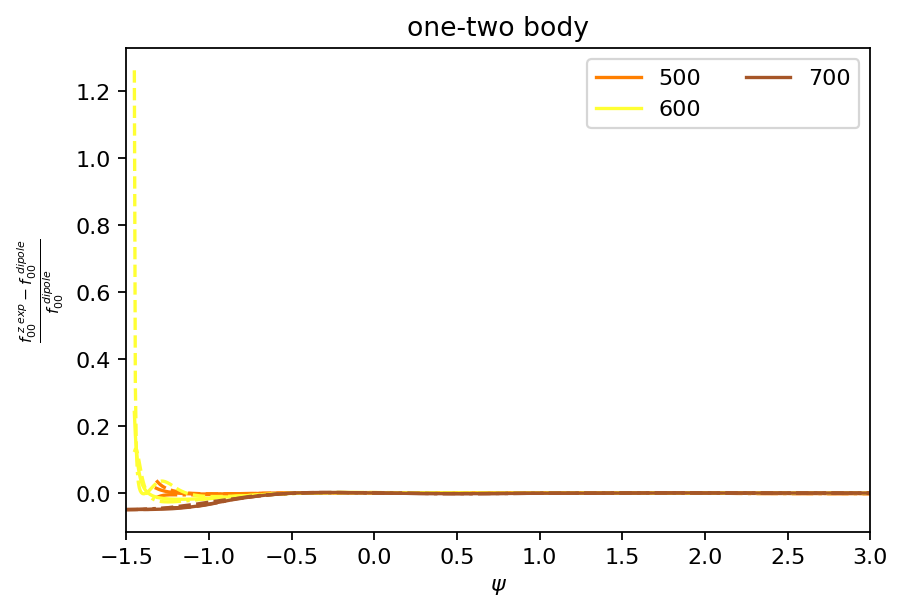

In [46]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R00_cc_12b_dip[:,i,2]/G00_cc_dip[i,:]
    dip1 = R00_cc_12b_dip[:,i,1]/G00_cc_dip[i,:]
    dip0 = R00_cc_12b_dip[:,i,0]/G00_cc_dip[i,:]
    z2 = R00_cc_12b_zexp[:,i,2]/G00_cc_zexp[i,:]
    z1 = R00_cc_12b_zexp[:,i,1]/G00_cc_zexp[i,:]
    z0 = R00_cc_12b_zexp[:,i,0]/G00_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.legend(loc=1, ncol=2)
plt.xlabel(r'$\psi$')
plt.title('one-two body')

# plotting the difference
#plt.ylabel(r'$f_{00}^{\ z \ exp} - f_{00}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{00}^{\ z \ exp} - f_{00}^{\ dipole}}{f_{00}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_f00_12b.png',bbox_inches='tight')
plt.show()

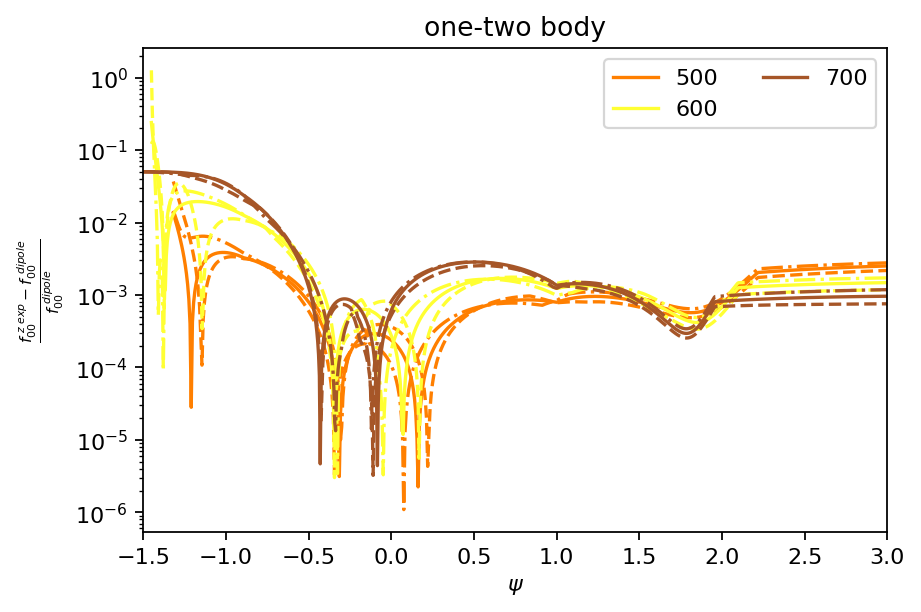

In [47]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R00_cc_12b_dip[:,i,2]/G00_cc_dip[i,:]
    dip1 = R00_cc_12b_dip[:,i,1]/G00_cc_dip[i,:]
    dip0 = R00_cc_12b_dip[:,i,0]/G00_cc_dip[i,:]
    z2 = R00_cc_12b_zexp[:,i,2]/G00_cc_zexp[i,:]
    z1 = R00_cc_12b_zexp[:,i,1]/G00_cc_zexp[i,:]
    z0 = R00_cc_12b_zexp[:,i,0]/G00_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.legend(loc=1, ncol=2)
plt.xlabel(r'$\psi$')
plt.title('one-two body')

# plotting the difference
#plt.ylabel(r'$f_{00}^{\ z \ exp} - f_{00}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{00}^{\ z \ exp} - f_{00}^{\ dipole}}{f_{00}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_f00_12b_log.png',bbox_inches='tight')
plt.show()

## $R_{0z}$ - one body

In [48]:
G0z_vc = np.zeros((nq,nwR))
G0z_ac = np.zeros((nq,nwR))
G0z_cc_dip = np.zeros((nq,nwR))
G0z_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2-wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > 3*kF: pG = 3*kF
        G0z_vc[i,j] = wR[j]/qR[i]*G00_vc[i,j]
        G0z_ac[i,j] = ((GA**2*(4*mn**2*(2*pG+qR[i])+qR[i]*(kF**2+(pG+qR[i])*(3*pG+qR[i])))+8*gps**2*mn**3*qR[i]**3*wqe[i]
                    - 2*GA*gps*mn*qR[i]*(2*mn*qR[i]*(2*pG+qR[i])+(-kF**2+4*mn**2+(pG+qR[i])**2)*wqe[i]))/(8*mn**3))/qR[i]
        G0z_cc_dip[i,j] = G0z_vc[i,j]*Gevj**2/Gev**2 + G0z_ac[i,j]*GAj_dip**2/GA**2
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G0z_cc_min_dip[i] = G0z_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: G0z_cc_dip[i,j] = G0z_cc_min_dip[i]
        G0z_cc_dip[i,j] = G0z_cc_dip[i,j] / kF * ( mn * 6 ) 

In [49]:
# now looking at the z-case for R0z

# making the G0z_cc arrays for the z-expansion case
G0z_cc_zexp = np.zeros((nq,nwR))
G0z_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        G0z_cc_zexp[i,j] = G0z_vc[i,j]*Gevj**2/Gev**2 + G0z_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G0z_cc_min_zexp[i] = G0z_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G0z_cc_zexp[i,j] = G0z_cc_min_zexp[i]
        G0z_cc_zexp[i,j] = G0z_cc_zexp[i,j] / kF * ( mn * 6 ) 

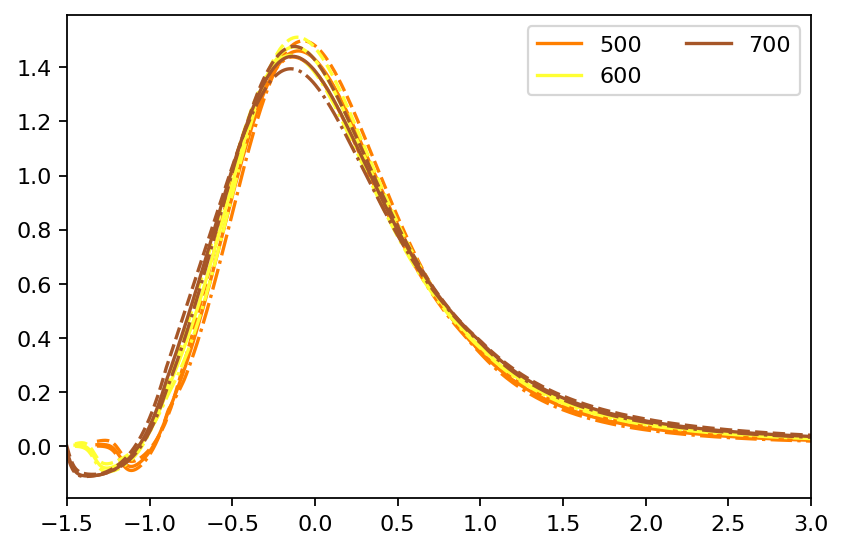

In [50]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R0z_cc_1b_dip[:,i,2]/G0z_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_1b_dip[:,i,1]/G0z_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R0z_cc_1b_dip[:,i,0]/G0z_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3.)
#plt.ylim(-4,35)
plt.legend(loc=1, ncol=2)
plt.show() 

In [51]:
R0z_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_1b_dip[:,6,2]/G0z_cc_dip[6,:])
R0z_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_1b_dip[:,5,2]/G0z_cc_dip[5,:])

R0z_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_1b_zexp[:,6,2]/G0z_cc_zexp[6,:])
R0z_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_1b_zexp[:,5,2]/G0z_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R0z_cc_1b_dip[i,j,0] = R0z_cc_1b_interpolate_600_dip(y[i,j])*G0z_cc_dip[j,i]
        R0z_cc_1b_dip[i,j,2] = R0z_cc_1b_interpolate_700_dip(y[i,j])*G0z_cc_dip[j,i]
        err_dip = 2 * (R0z_cc_1b_dip[i,j,2] - R0z_cc_1b_dip[i,j,0])
        R0z_cc_1b_dip[i,j,1] = R0z_cc_1b_dip[i,j,2] + err_dip
        R0z_cc_1b_dip[i,j,0] = R0z_cc_1b_dip[i,j,2] - err_dip
        
        R0z_cc_1b_zexp[i,j,0] = R0z_cc_1b_interpolate_600_zexp(y[i,j])*G0z_cc_zexp[j,i]
        R0z_cc_1b_zexp[i,j,2] = R0z_cc_1b_interpolate_700_zexp(y[i,j])*G0z_cc_zexp[j,i]
        err_zexp = 2 * (R0z_cc_1b_zexp[i,j,2] - R0z_cc_1b_zexp[i,j,0])
        R0z_cc_1b_zexp[i,j,1] = R0z_cc_1b_zexp[i,j,2] + err_zexp
        R0z_cc_1b_zexp[i,j,0] = R0z_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R0z_cc_1b_dip[i,j,:] = 0
            R0z_cc_1b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if R0z_cc_1b_dip[i,j,k] < 0:  R0z_cc_1b_dip[i,j,k] = 0
        #    if R0z_cc_1b_zexp[i,j,k] < 0:  R0z_cc_1b_zexp[i,j,k] = 0

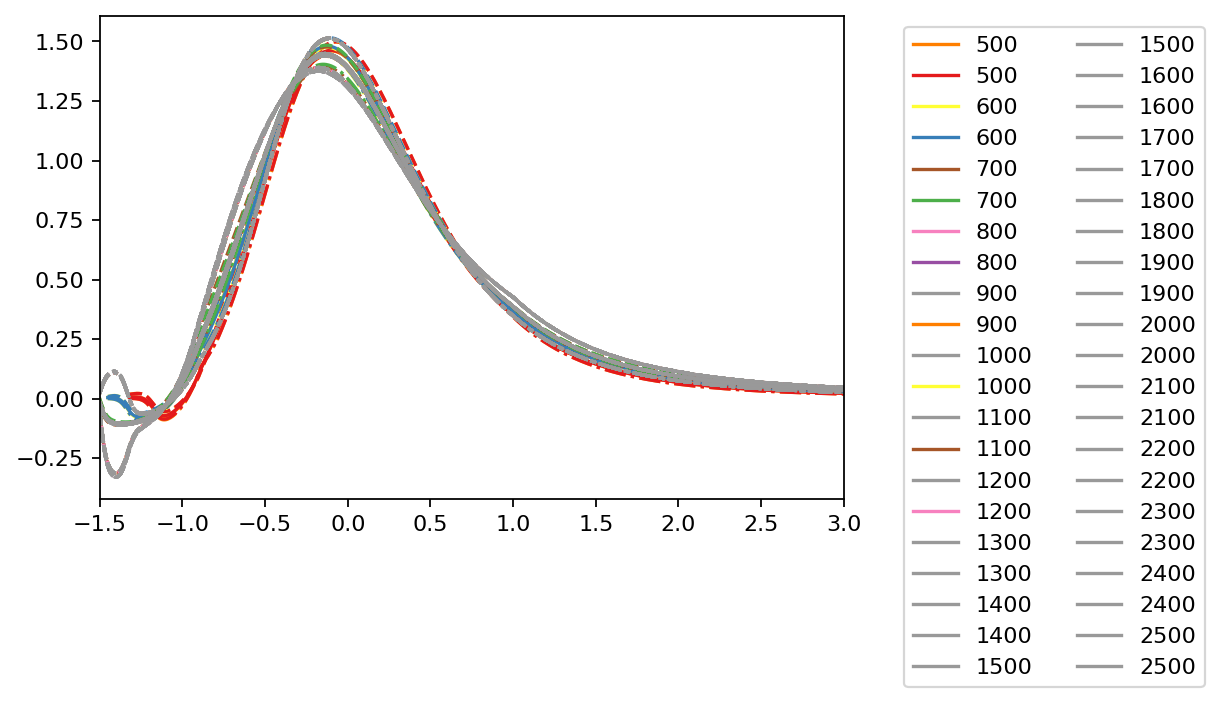

In [52]:
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], R0z_cc_1b_dip[:,i,2]/G0z_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_1b_dip[:,i,1]/G0z_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R0z_cc_1b_dip[:,i,0]/G0z_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R0z_cc_1b_zexp[:,i,2]/G0z_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_1b_zexp[:,i,1]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], R0z_cc_1b_zexp[:,i,0]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3.)
#plt.ylim(-4,35)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0))
plt.show() 

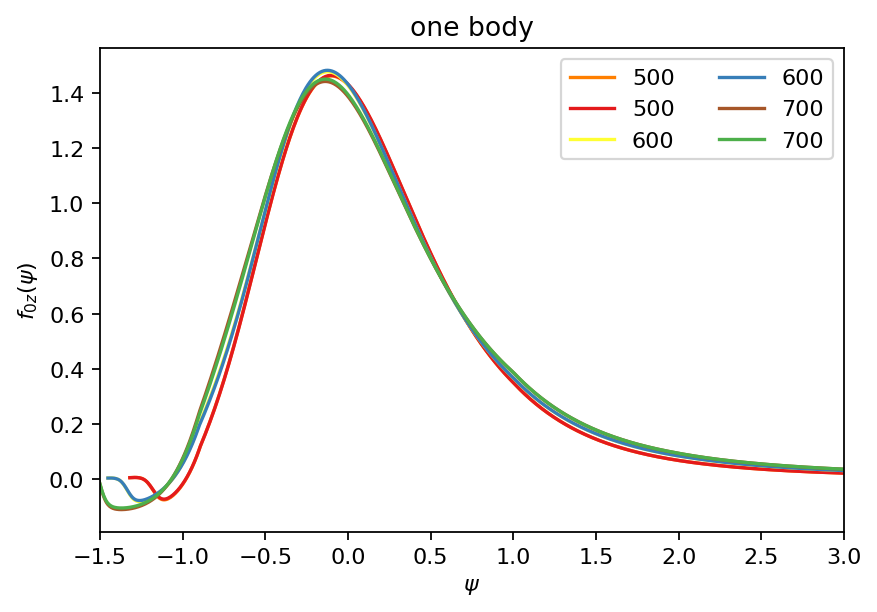

In [53]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R0z_cc_1b_dip[:,i,2]/G0z_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], R0z_cc_1b_dip[:,i,1]/G0z_cc_dip[i,:], color=palette(i), linestyle='--')
    #plt.plot(y[:,i], R0z_cc_1b_dip[:,i,0]/G0z_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R0z_cc_1b_zexp[:,i,2]/G0z_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], R0z_cc_1b_zexp[:,i,1]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    #plt.plot(y[:,i], R0z_cc_1b_zexp[:,i,0]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.ylabel(r'$f_{0z}(\psi)$')
plt.legend(loc=1, ncol=2)
plt.show() 

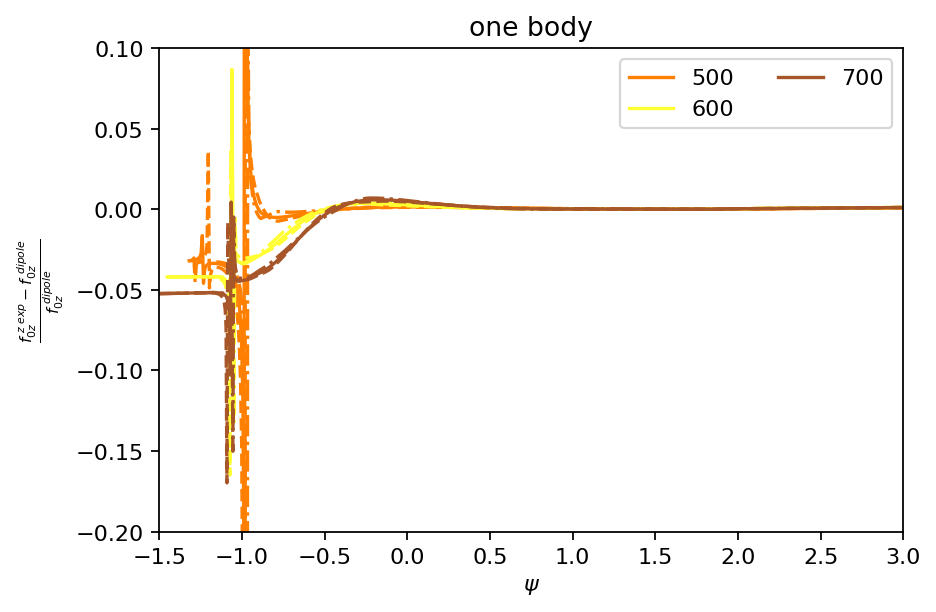

In [54]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R0z_cc_1b_dip[:,i,2]/G0z_cc_dip[i,:]
    dip1 = R0z_cc_1b_dip[:,i,1]/G0z_cc_dip[i,:]
    dip0 = R0z_cc_1b_dip[:,i,0]/G0z_cc_dip[i,:]
    z2 = R0z_cc_1b_zexp[:,i,2]/G0z_cc_zexp[i,:]
    z1 = R0z_cc_1b_zexp[:,i,1]/G0z_cc_zexp[i,:]
    z0 = R0z_cc_1b_zexp[:,i,0]/G0z_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
plt.ylim(-0.2,0.1)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}}{f_{0z}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_f0z_1b.png',bbox_inches='tight')
plt.show() 

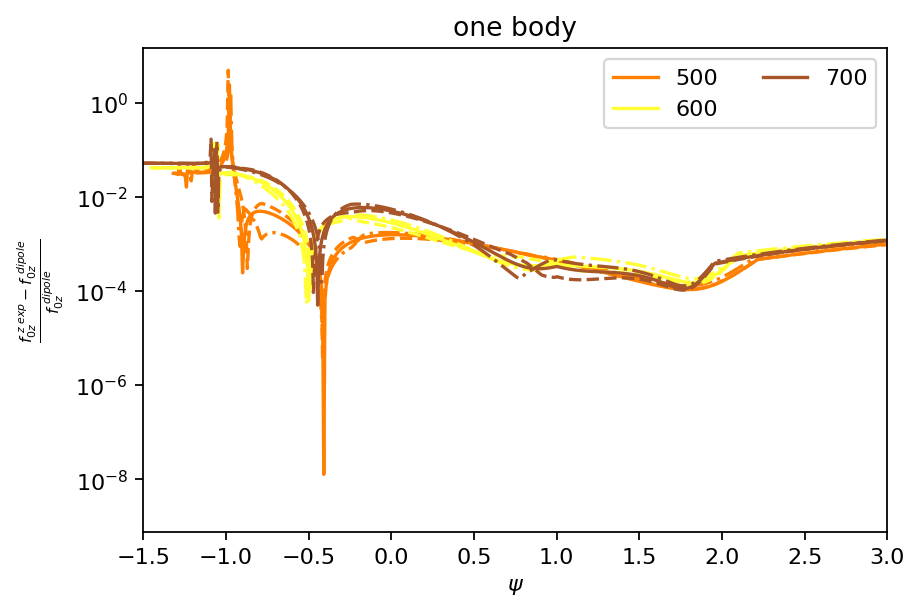

In [55]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R0z_cc_1b_dip[:,i,2]/G0z_cc_dip[i,:]
    dip1 = R0z_cc_1b_dip[:,i,1]/G0z_cc_dip[i,:]
    dip0 = R0z_cc_1b_dip[:,i,0]/G0z_cc_dip[i,:]
    z2 = R0z_cc_1b_zexp[:,i,2]/G0z_cc_zexp[i,:]
    z1 = R0z_cc_1b_zexp[:,i,1]/G0z_cc_zexp[i,:]
    z0 = R0z_cc_1b_zexp[:,i,0]/G0z_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(-0.2,0.1)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}}{f_{0z}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_f0z_1b_log.png',bbox_inches='tight')
plt.show() 

## $R_{0z}$ - one+two body

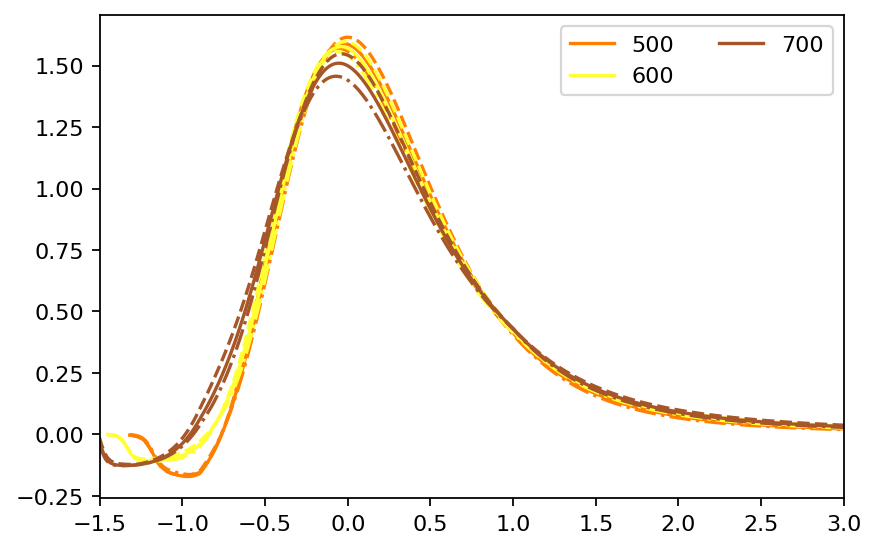

In [56]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,2]/G0z_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,1]/G0z_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,0]/G0z_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3.)
#plt.ylim(-2,35)
plt.legend(loc=1, ncol=2) 
plt.show()

In [57]:
R0z_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_12b_dip[:,6,2]/G0z_cc_dip[6,:])
R0z_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_12b_dip[:,5,2]/G0z_cc_dip[5,:])

R0z_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_12b_zexp[:,6,2]/G0z_cc_zexp[6,:])
R0z_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_12b_zexp[:,5,2]/G0z_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R0z_cc_12b_dip[i,j,0] = R0z_cc_12b_interpolate_600_dip(y[i,j])*G0z_cc_dip[j,i]
        R0z_cc_12b_dip[i,j,2] = R0z_cc_12b_interpolate_700_dip(y[i,j])*G0z_cc_dip[j,i]
        err_dip = 2 * (R0z_cc_12b_dip[i,j,2] - R0z_cc_12b_dip[i,j,0])
        R0z_cc_12b_dip[i,j,1] = R0z_cc_12b_dip[i,j,2] + err_dip
        R0z_cc_12b_dip[i,j,0] = R0z_cc_12b_dip[i,j,2] - err_dip
        
        R0z_cc_12b_zexp[i,j,0] = R0z_cc_12b_interpolate_600_zexp(y[i,j])*G0z_cc_zexp[j,i]
        R0z_cc_12b_zexp[i,j,2] = R0z_cc_12b_interpolate_700_zexp(y[i,j])*G0z_cc_zexp[j,i]
        err_zexp = 2 * (R0z_cc_12b_zexp[i,j,2] - R0z_cc_12b_zexp[i,j,0])
        R0z_cc_12b_zexp[i,j,1] = R0z_cc_12b_zexp[i,j,2] + err_zexp
        R0z_cc_12b_zexp[i,j,0] = R0z_cc_12b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R0z_cc_12b_dip[i,j,:] = 0
            R0z_cc_12b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if R0z_cc_12b_dip[i,j,k] < 0:  R0z_cc_12b_dip[i,j,k] = 0
        #    if R0z_cc_12b_zexp[i,j,k] < 0:  R0z_cc_12b_zexp[i,j,k] = 0

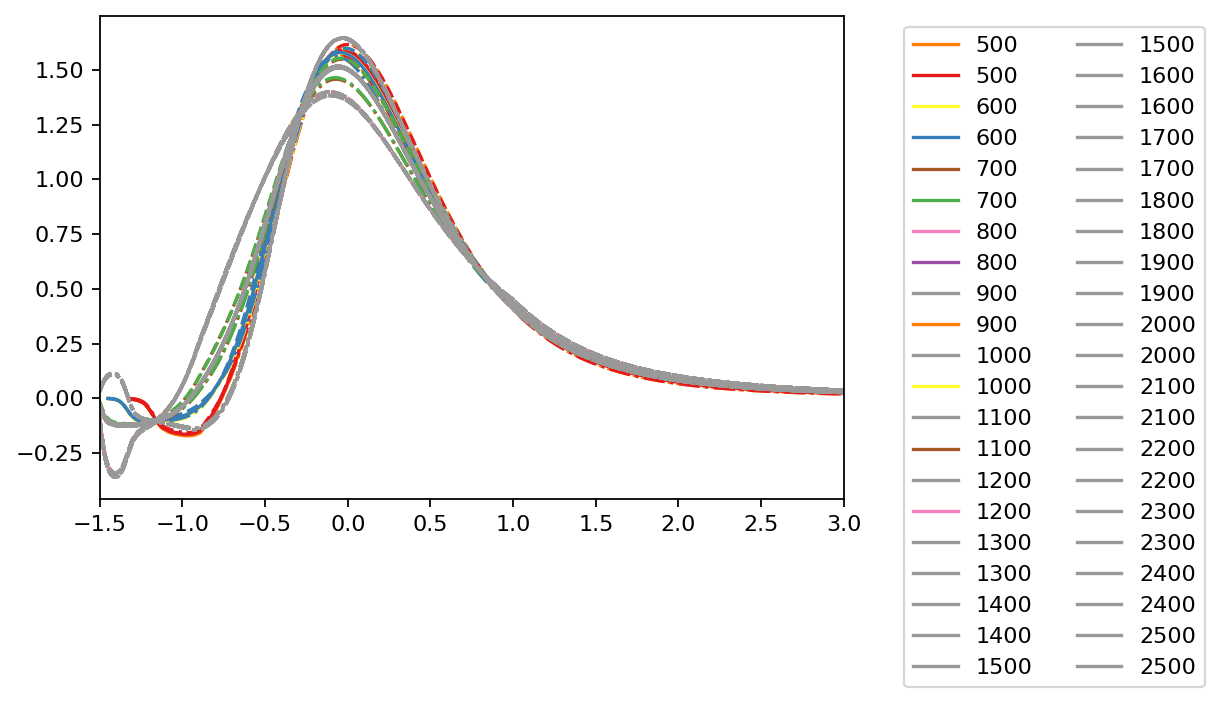

In [58]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,2]/G0z_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,1]/G0z_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,0]/G0z_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R0z_cc_12b_zexp[:,i,2]/G0z_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_12b_zexp[:,i,1]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], R0z_cc_12b_zexp[:,i,0]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3.)
#plt.ylim(-2,35)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0)) 
plt.show()

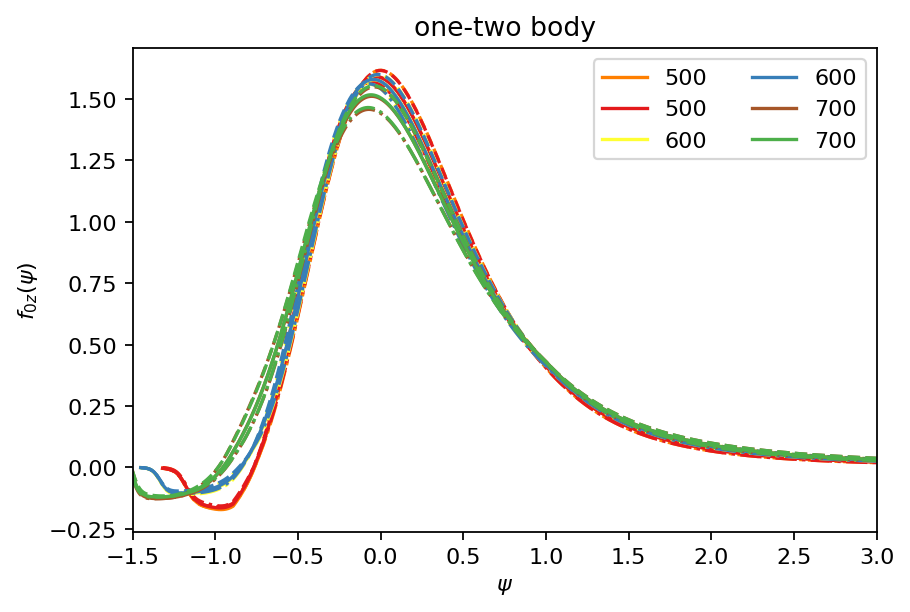

In [59]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,2]/G0z_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,1]/G0z_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], R0z_cc_12b_dip[:,i,0]/G0z_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], R0z_cc_12b_zexp[:,i,2]/G0z_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], R0z_cc_12b_zexp[:,i,1]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], R0z_cc_12b_zexp[:,i,0]/G0z_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.ylabel(r'$f_{0z}(\psi)$')
plt.legend(loc=1, ncol=2)
plt.show() 

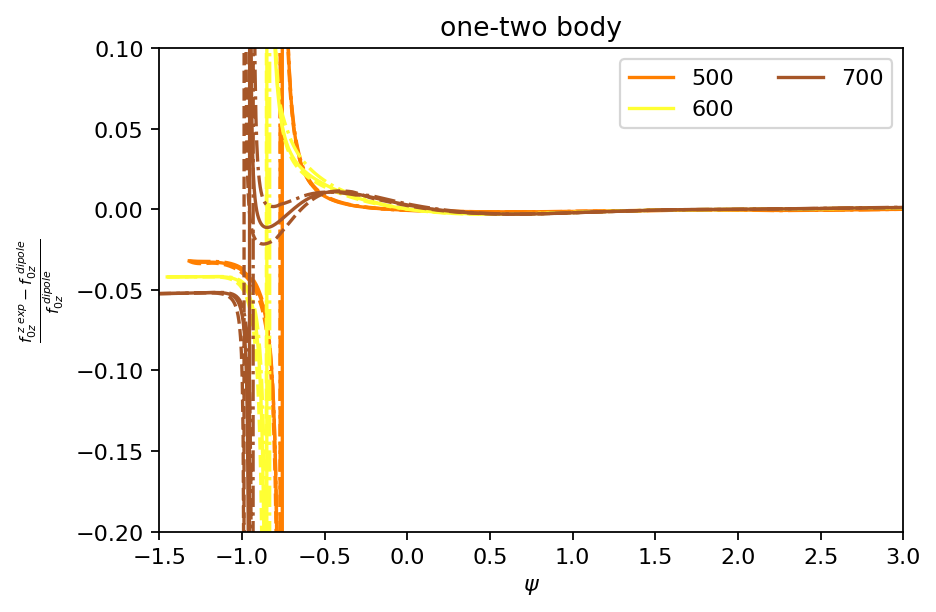

In [60]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R0z_cc_12b_dip[:,i,2]/G0z_cc_dip[i,:]
    dip1 = R0z_cc_12b_dip[:,i,1]/G0z_cc_dip[i,:]
    dip0 = R0z_cc_12b_dip[:,i,0]/G0z_cc_dip[i,:]
    z2 = R0z_cc_12b_zexp[:,i,2]/G0z_cc_zexp[i,:]
    z1 = R0z_cc_12b_zexp[:,i,1]/G0z_cc_zexp[i,:]
    z0 = R0z_cc_12b_zexp[:,i,0]/G0z_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
plt.ylim(-0.2,0.1)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}}{f_{0z}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_f0z_12b.png',bbox_inches='tight')
plt.show()

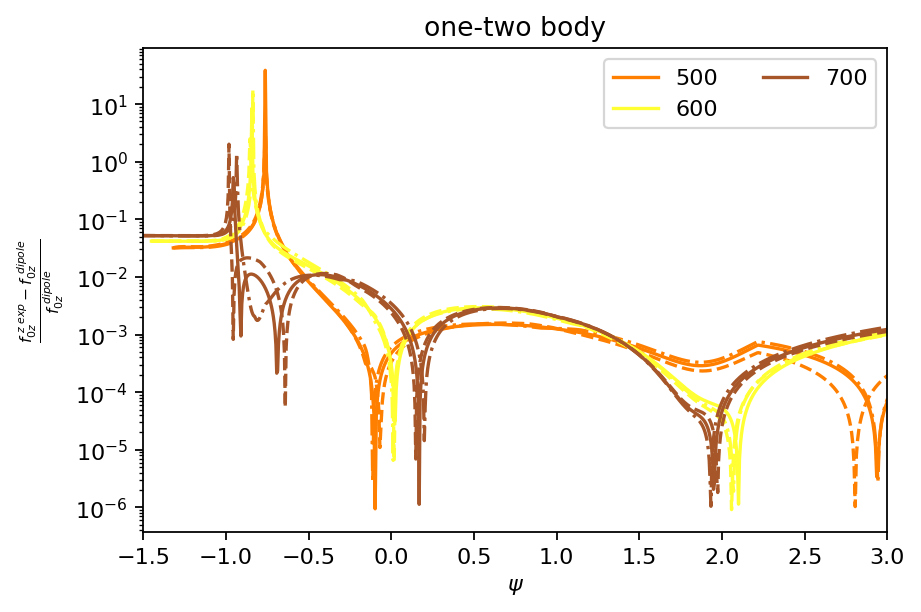

In [61]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = R0z_cc_12b_dip[:,i,2]/G0z_cc_dip[i,:]
    dip1 = R0z_cc_12b_dip[:,i,1]/G0z_cc_dip[i,:]
    dip0 = R0z_cc_12b_dip[:,i,0]/G0z_cc_dip[i,:]
    z2 = R0z_cc_12b_zexp[:,i,2]/G0z_cc_zexp[i,:]
    z1 = R0z_cc_12b_zexp[:,i,1]/G0z_cc_zexp[i,:]
    z0 = R0z_cc_12b_zexp[:,i,0]/G0z_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(-0.2,0.1)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{0z}^{\ z \ exp} - f_{0z}^{\ dipole}}{f_{0z}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_f0z_12b_log.png',bbox_inches='tight')
plt.show()

## $R_{zz}$ one body

In [62]:
Gzz_vc = np.zeros((nq,nwR))
Gzz_vc_qe = np.zeros((nq,nwR))
Gzz_ac = np.zeros((nq,nwR))
Gzz_cc_dip = np.zeros((nq,nwR))
Gzz_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gzz_vc[i,j] = wR[j]**2/qR[i]**2*G00_vc[i,j]
        Gzz_ac[i,j] = (gps**2*qR[i]**4-(GA*gps*qR[i]**2*(-kF**2+4*mn**2+(pG+qR[i])**2))/(2*mn**2)
                    +(GA**2*(4*kF**4+48*mn**4-2*pG**4-2*kF**2*(12*mn**2+pG**2)+12*pG**2*qR[i]**2+12*pG*qR[i]**3
                    +3*qR[i]**4+24*mn**2*(pG+qR[i])**2))/(48.*mn**4))/qR[i]
        Gzz_cc_dip[i,j] = Gzz_vc[i,j]*Gevj**2/Gev**2 + Gzz_ac[i,j]*GAj_dip**2/GA**2
        if  y[j,i] > -0.8 and first_time == 1:
            first_time = 0
            Gzz_cc_min_dip[i] = Gzz_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.8: Gzz_cc_dip[i,j] = Gzz_cc_min_dip[i]
        Gzz_cc_dip[i,j] = Gzz_cc_dip[i,j] / kF * ( mn * 6 )     

In [63]:
# now looking at the z-case for Rzz

# making the Gzz_cc arrays for the z-expansion case
Gzz_cc_zexp = np.zeros((nq,nwR))
Gzz_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gzz_cc_zexp[i,j] = Gzz_vc[i,j]*Gevj**2/Gev**2 + Gzz_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gzz_cc_min_zexp[i] = Gzz_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gzz_cc_zexp[i,j] = Gzz_cc_min_zexp[i]
        Gzz_cc_zexp[i,j] = Gzz_cc_zexp[i,j] / kF * ( mn * 6 ) 

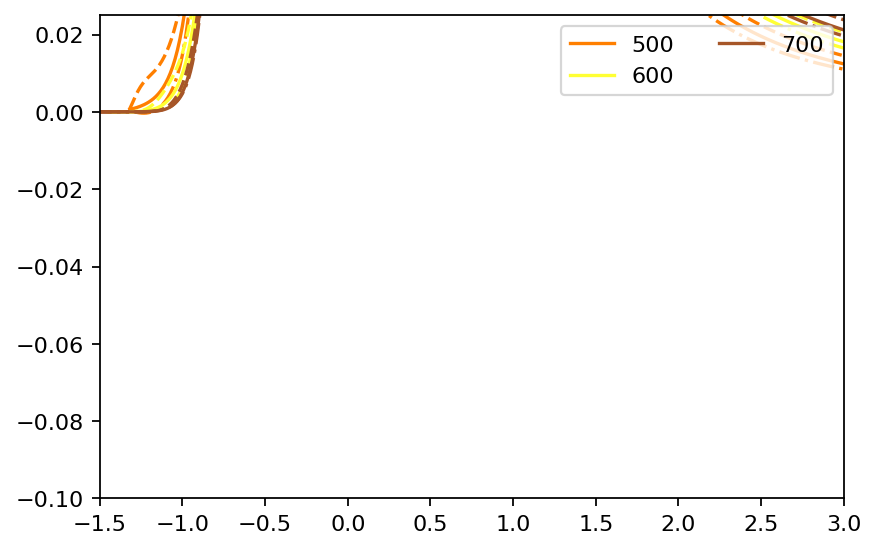

In [64]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,2]/Gzz_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,1]/Gzz_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,0]/Gzz_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3.)
plt.ylim(-0.1,0.025)
plt.legend(loc=1, ncol=2)
plt.show()  

In [65]:
Rzz_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_1b_dip[:,6,2]/Gzz_cc_dip[6,:])
Rzz_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_1b_dip[:,5,2]/Gzz_cc_dip[5,:])

Rzz_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_1b_zexp[:,6,2]/Gzz_cc_zexp[6,:])
Rzz_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_1b_zexp[:,5,2]/Gzz_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rzz_cc_1b_dip[i,j,0] = Rzz_cc_1b_interpolate_600_dip(y[i,j])*Gzz_cc_dip[j,i]
        Rzz_cc_1b_dip[i,j,2] = Rzz_cc_1b_interpolate_700_dip(y[i,j])*Gzz_cc_dip[j,i]
        err_dip = 2 * (Rzz_cc_1b_dip[i,j,2] - Rzz_cc_1b_dip[i,j,0])
        Rzz_cc_1b_dip[i,j,1] = Rzz_cc_1b_dip[i,j,2] + err_dip
        Rzz_cc_1b_dip[i,j,0] = Rzz_cc_1b_dip[i,j,2] - err_dip
        
        Rzz_cc_1b_zexp[i,j,0] = Rzz_cc_1b_interpolate_600_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        Rzz_cc_1b_zexp[i,j,2] = Rzz_cc_1b_interpolate_700_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        err_zexp = 2 * (Rzz_cc_1b_zexp[i,j,2] - Rzz_cc_1b_zexp[i,j,0])
        Rzz_cc_1b_zexp[i,j,1] = Rzz_cc_1b_zexp[i,j,2] + err_zexp
        Rzz_cc_1b_zexp[i,j,0] = Rzz_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            Rzz_cc_1b_dip[i,j,:] = 0
            Rzz_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if Rzz_cc_1b_dip[i,j,k] < 0:  Rzz_cc_1b_dip[i,j,k] = 0
            if Rzz_cc_1b_zexp[i,j,k] < 0:  Rzz_cc_1b_zexp[i,j,k] = 0

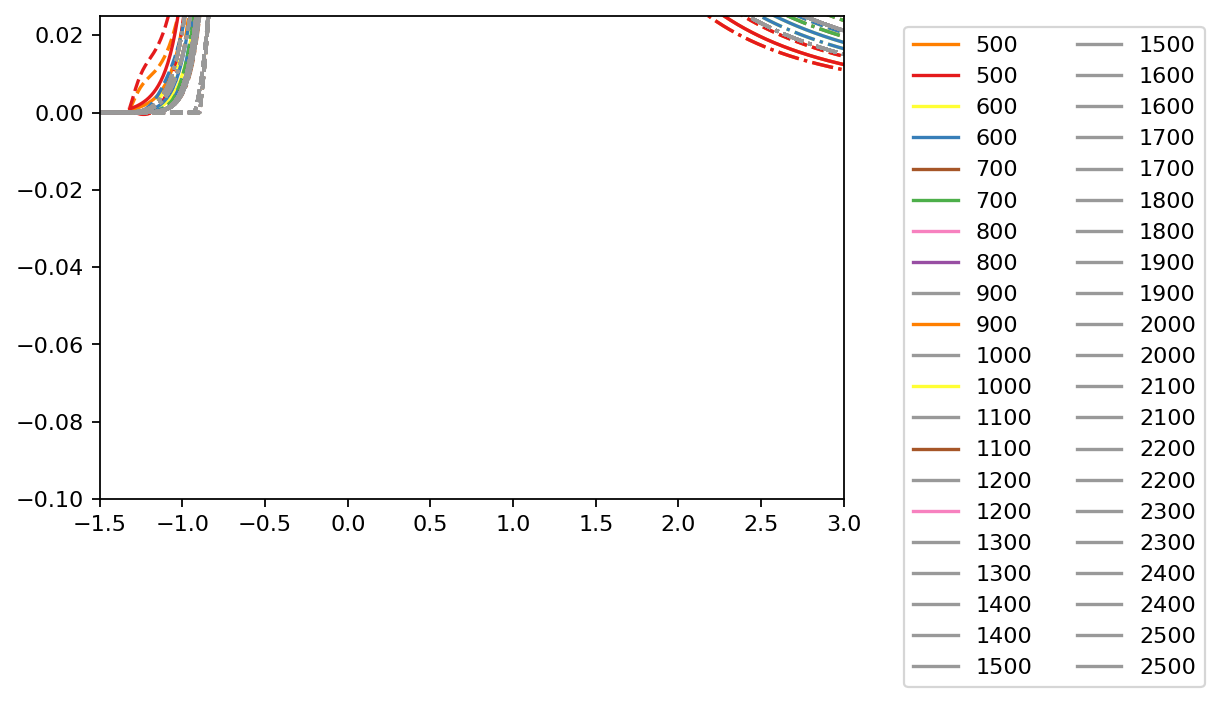

In [66]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,2]/Gzz_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,1]/Gzz_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,0]/Gzz_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rzz_cc_1b_zexp[:,i,2]/Gzz_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_1b_zexp[:,i,1]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_1b_zexp[:,i,0]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3.)
plt.ylim(-0.1,0.025)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0))
plt.show()  

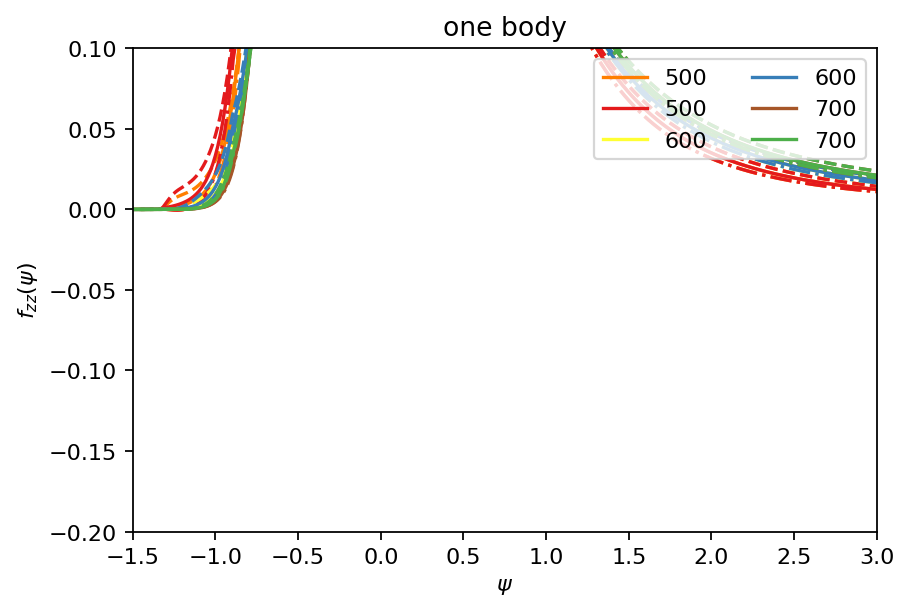

In [67]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,2]/Gzz_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,1]/Gzz_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_1b_dip[:,i,0]/Gzz_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rzz_cc_1b_zexp[:,i,2]/Gzz_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_1b_zexp[:,i,1]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_1b_zexp[:,i,0]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
plt.ylim(-0.2,0.1)
plt.title('one body')
plt.ylabel(r'$f_{zz}(\psi)$')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)
plt.show() 

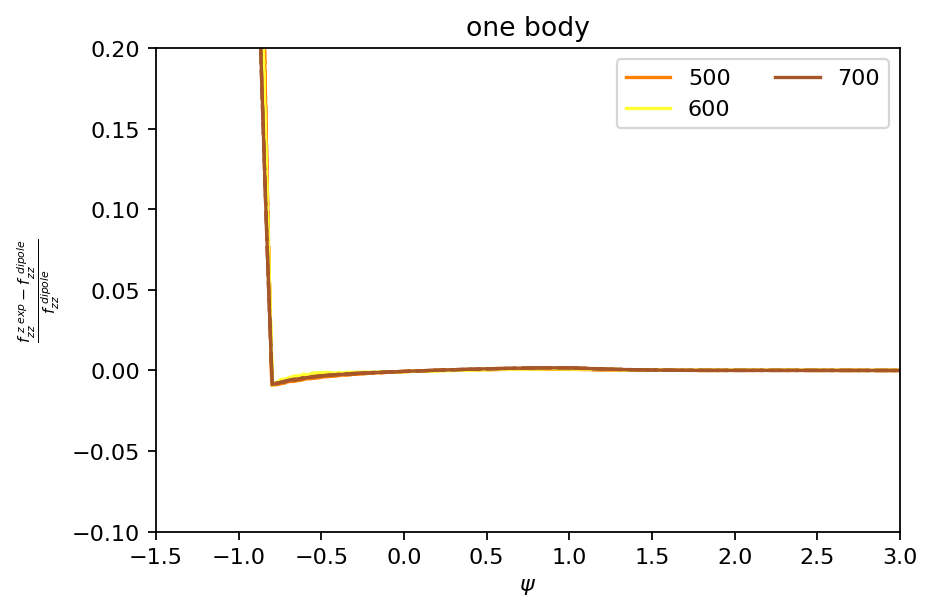

In [68]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rzz_cc_1b_dip[:,i,2]/Gzz_cc_dip[i,:]
    dip1 = Rzz_cc_1b_dip[:,i,1]/Gzz_cc_dip[i,:]
    dip0 = Rzz_cc_1b_dip[:,i,0]/Gzz_cc_dip[i,:]
    z2 = Rzz_cc_1b_zexp[:,i,2]/Gzz_cc_zexp[i,:]
    z1 = Rzz_cc_1b_zexp[:,i,1]/Gzz_cc_zexp[i,:]
    z0 = Rzz_cc_1b_zexp[:,i,0]/Gzz_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
plt.ylim(-0.1,0.2)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}}{f_{zz}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_fzz_1b.png',bbox_inches='tight')
plt.show() 

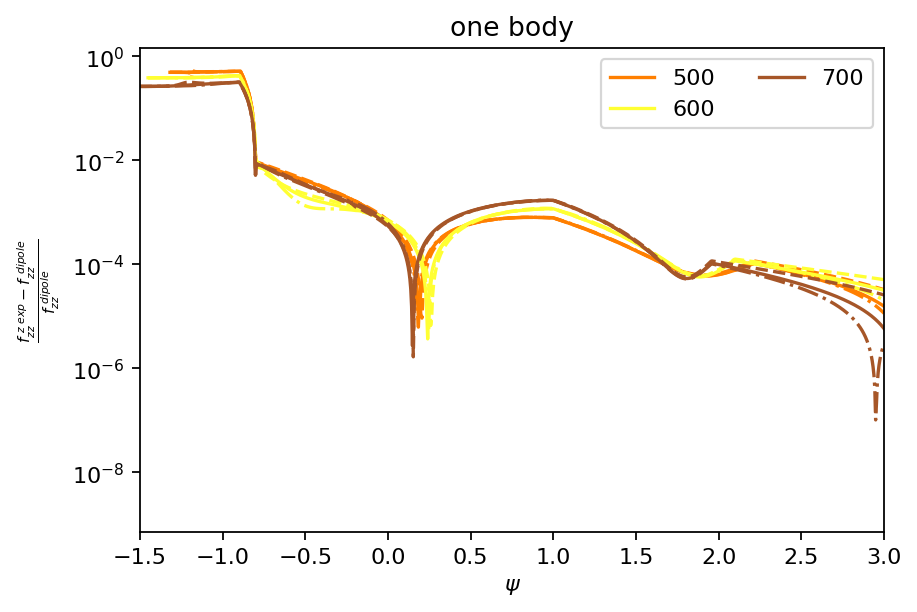

In [69]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rzz_cc_1b_dip[:,i,2]/Gzz_cc_dip[i,:]
    dip1 = Rzz_cc_1b_dip[:,i,1]/Gzz_cc_dip[i,:]
    dip0 = Rzz_cc_1b_dip[:,i,0]/Gzz_cc_dip[i,:]
    z2 = Rzz_cc_1b_zexp[:,i,2]/Gzz_cc_zexp[i,:]
    z1 = Rzz_cc_1b_zexp[:,i,1]/Gzz_cc_zexp[i,:]
    z0 = Rzz_cc_1b_zexp[:,i,0]/Gzz_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.1,0.2)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}}{f_{zz}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_fzz_1b_log.png',bbox_inches='tight')
plt.show() 

## $R_{zz}$ one+two body

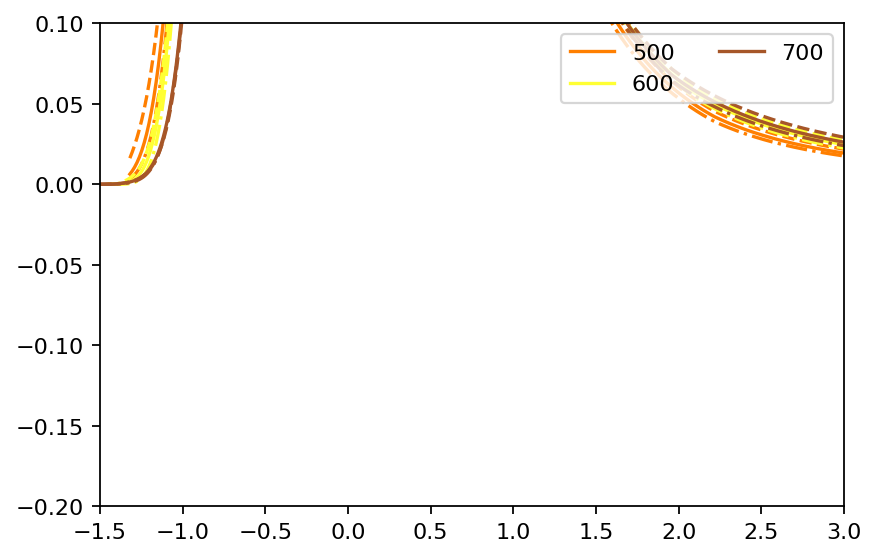

In [70]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,2]/Gzz_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,1]/Gzz_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,0]/Gzz_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
plt.ylim(-0.2,0.1)
plt.legend(loc=1, ncol=2)
plt.show()  

In [71]:
Rzz_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_12b_dip[:,6,2]/G0z_cc_dip[6,:])
Rzz_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_12b_dip[:,5,2]/G0z_cc_dip[5,:])

Rzz_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_12b_zexp[:,6,2]/G0z_cc_zexp[6,:])
Rzz_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_12b_zexp[:,5,2]/G0z_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rzz_cc_12b_dip[i,j,0] = Rzz_cc_12b_interpolate_600_dip(y[i,j])*Gzz_cc_dip[j,i]
        Rzz_cc_12b_dip[i,j,2] = Rzz_cc_12b_interpolate_700_dip(y[i,j])*Gzz_cc_dip[j,i]
        err_dip = 2 * (Rzz_cc_12b_dip[i,j,2] - Rzz_cc_12b_dip[i,j,0])
        Rzz_cc_12b_dip[i,j,1] = Rzz_cc_12b_dip[i,j,2] + err_dip
        Rzz_cc_12b_dip[i,j,0] = Rzz_cc_12b_dip[i,j,2] - err_dip
        
        Rzz_cc_12b_zexp[i,j,0] = Rzz_cc_12b_interpolate_600_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        Rzz_cc_12b_zexp[i,j,2] = Rzz_cc_12b_interpolate_700_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        err_zexp = 2 * (Rzz_cc_12b_zexp[i,j,2] - Rzz_cc_12b_zexp[i,j,0])
        Rzz_cc_12b_zexp[i,j,1] = Rzz_cc_12b_zexp[i,j,2] + err_zexp
        Rzz_cc_12b_zexp[i,j,0] = Rzz_cc_12b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            Rzz_cc_12b_dip[i,j,:] = 0
            Rzz_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if Rzz_cc_12b_dip[i,j,k] < 0:  Rzz_cc_12b_dip[i,j,k] = 0
            if Rzz_cc_12b_zexp[i,j,k] < 0:  Rzz_cc_12b_zexp[i,j,k] = 0

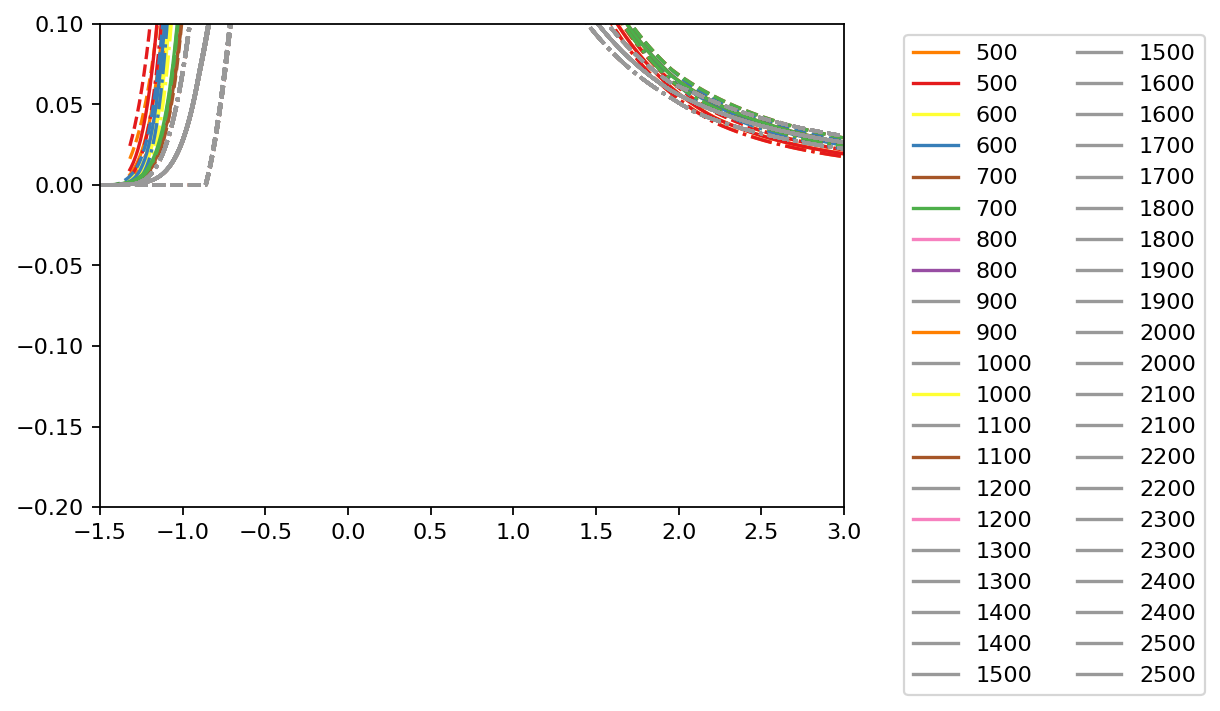

In [72]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,2]/Gzz_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,1]/Gzz_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,0]/Gzz_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rzz_cc_12b_zexp[:,i,2]/Gzz_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_12b_zexp[:,i,1]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_12b_zexp[:,i,0]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3)
plt.ylim(-0.2,0.1)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0))
plt.show() 

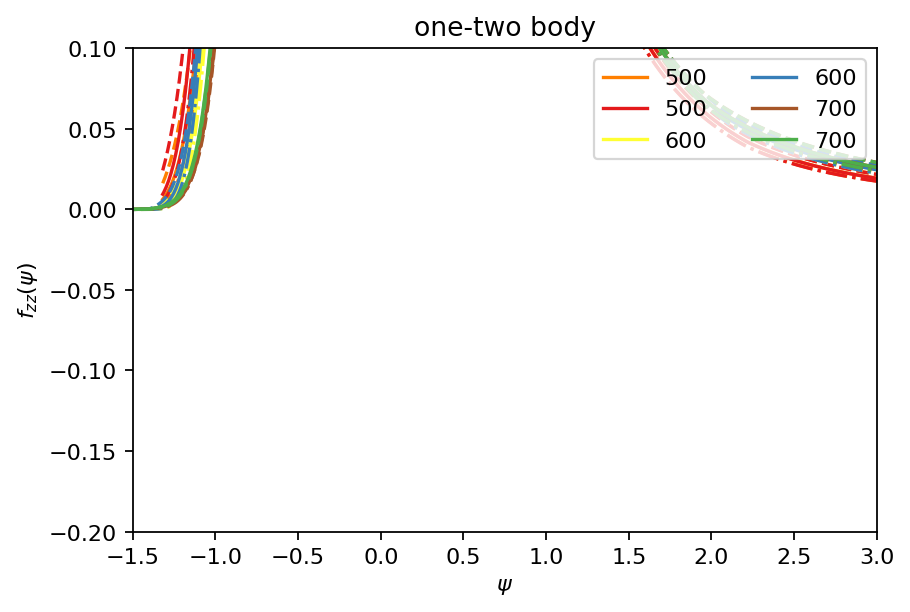

In [73]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,2]/Gzz_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,1]/Gzz_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_12b_dip[:,i,0]/Gzz_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rzz_cc_12b_zexp[:,i,2]/Gzz_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rzz_cc_12b_zexp[:,i,1]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rzz_cc_12b_zexp[:,i,0]/Gzz_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
plt.ylim(-0.2,0.1)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.ylabel(r'$f_{zz}(\psi)$')
plt.legend(loc=1, ncol=2)
plt.show() 

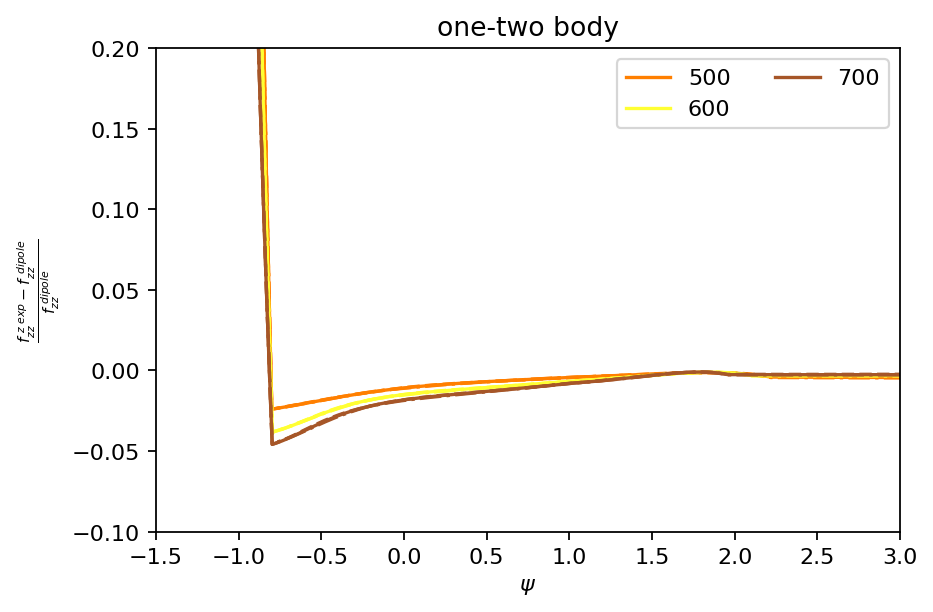

In [74]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rzz_cc_12b_dip[:,i,2]/Gzz_cc_dip[i,:]
    dip1 = Rzz_cc_12b_dip[:,i,1]/Gzz_cc_dip[i,:]
    dip0 = Rzz_cc_12b_dip[:,i,0]/Gzz_cc_dip[i,:]
    z2 = Rzz_cc_12b_zexp[:,i,2]/Gzz_cc_zexp[i,:]
    z1 = Rzz_cc_12b_zexp[:,i,1]/Gzz_cc_zexp[i,:]
    z0 = Rzz_cc_12b_zexp[:,i,0]/Gzz_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
plt.ylim(-0.1,0.2)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}}{f_{zz}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_fzz_12b.png',bbox_inches='tight')
plt.show() 

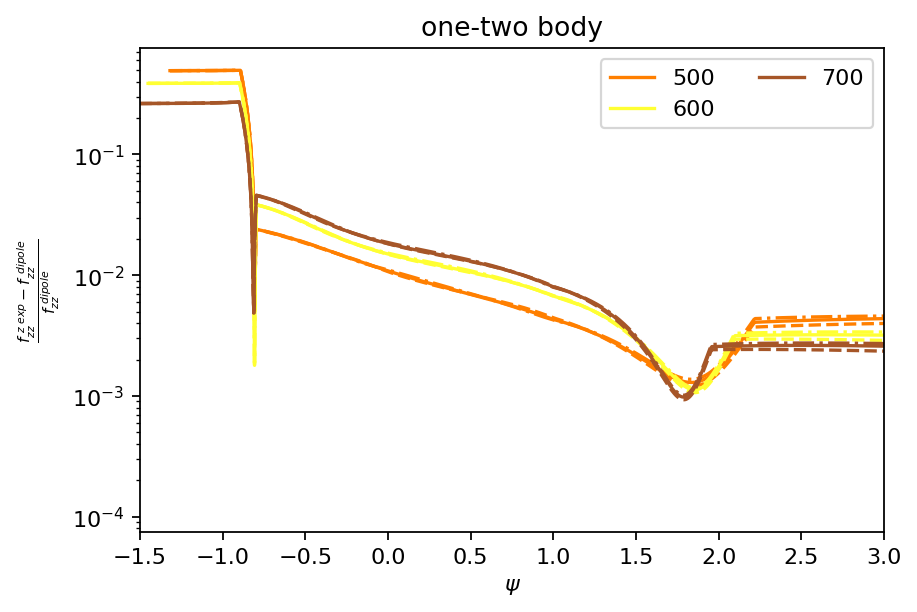

In [75]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rzz_cc_12b_dip[:,i,2]/Gzz_cc_dip[i,:]
    dip1 = Rzz_cc_12b_dip[:,i,1]/Gzz_cc_dip[i,:]
    dip0 = Rzz_cc_12b_dip[:,i,0]/Gzz_cc_dip[i,:]
    z2 = Rzz_cc_12b_zexp[:,i,2]/Gzz_cc_zexp[i,:]
    z1 = Rzz_cc_12b_zexp[:,i,1]/Gzz_cc_zexp[i,:]
    z0 = Rzz_cc_12b_zexp[:,i,0]/Gzz_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    
    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.1,0.2)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{zz}^{\ z \ exp} - f_{zz}^{\ dipole}}{f_{zz}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_fzz_12b_log.png',bbox_inches='tight')
plt.show() 

## $R_{xx}$ one body

In [76]:
eps=50.
mn=939.
mpi=139.
kF=260.
mstar=1.0
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/(mn*mstar)-eps)
Gxx_vc = np.zeros((nq,nwR))
Gxx_ac = np.zeros((nq,nwR))
Gxx_cc_dip = np.zeros((nq,nwR))
Gxx_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxx_vc[i,j] =(((Gen-Gep)**2*(kF-pG)*(kF+pG)+(Gmn-Gmp)**2*qR[i]**2)/(4*mn**2))/qR[i]
        Gxx_ac[i,j] = ((GA**2*(2*kF**4+48*mn**4+5*pG**4+12*pG**3*qR[i]+18*pG**2*qR[i]**2+12*pG*qR[i]**3
                    + 3*qR[i]**4-12*mn**2*(3*pG**2+4*pG*qR[i]+2*qR[i]**2)+kF**2*(-12*mn**2+5*pG**2
                    + 12*pG*qR[i]+6*qR[i]**2)))/(48.*mn**4))/qR[i]
        Gxx_cc_dip[i,j] = Gxx_vc[i,j]*Gevj**2/Gev**2 + Gxx_ac[i,j]*GAj_dip**2/GA**2
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxx_cc_min_dip[i] = Gxx_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: Gxx_cc_dip[i,j] = Gxx_cc_min_dip[i]
        Gxx_cc_dip[i,j] = Gxx_cc_dip[i,j] / kF * ( mn * 12 ) 

In [77]:
# now looking at the z-case for Rxx

# making the Gxx_cc arrays for the z-expansion case
Gxx_cc_zexp = np.zeros((nq,nwR))
Gxx_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxx_cc_zexp[i,j] = Gxx_vc[i,j]*Gevj**2/Gev**2 + Gxx_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxx_cc_min_zexp[i] = Gxx_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gxx_cc_zexp[i,j] = Gxx_cc_min_zexp[i]
        Gxx_cc_zexp[i,j] = Gxx_cc_zexp[i,j] / kF * ( mn * 12 ) 

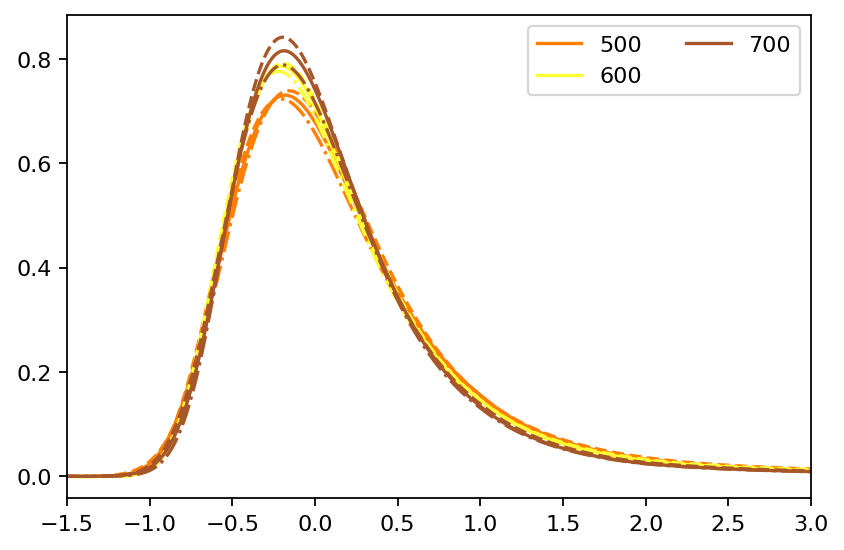

In [78]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,2]/Gxx_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,1]/Gxx_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,0]/Gxx_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3.)
plt.legend(loc=1, ncol=2)
plt.show()  
data_dip=np.array([y[:,4],Rxx_cc_1b_dip[:,4,0]/Gxx_cc_dip[4,:],Rxx_cc_1b_dip[:,4,2]/Gxx_cc_dip[4,:],Rxx_cc_1b_dip[:,4,1]/Gxx_cc_dip[4,:],
               y[:,5],Rxx_cc_1b_dip[:,5,0]/Gxx_cc_dip[5,:],Rxx_cc_1b_dip[:,5,2]/Gxx_cc_dip[5,:],Rxx_cc_1b_dip[:,5,1]/Gxx_cc_dip[5,:],
               y[:,6],Rxx_cc_1b_dip[:,6,0]/Gxx_cc_dip[6,:],Rxx_cc_1b_dip[:,6,2]/Gxx_cc_dip[6,:],Rxx_cc_1b_dip[:,6,1]/Gxx_cc_dip[6,:]])
data_dip = data_dip.T
#np.savetxt('F_xx_1b_dip.dat', data_dip)

In [79]:
Rxx_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_1b_dip[:,6,2]/Gxx_cc_dip[6,:])
Rxx_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_1b_dip[:,5,2]/Gxx_cc_dip[5,:])

Rxx_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_1b_zexp[:,6,2]/Gxx_cc_zexp[6,:])
Rxx_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_1b_zexp[:,5,2]/Gxx_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_1b_dip[i,j,0] = Rxx_cc_1b_interpolate_600_dip(y[i,j])*Gxx_cc_dip[j,i]
        Rxx_cc_1b_dip[i,j,2] = Rxx_cc_1b_interpolate_700_dip(y[i,j])*Gxx_cc_dip[j,i]
        err_dip = 2 * (Rxx_cc_1b_dip[i,j,2] - Rxx_cc_1b_dip[i,j,0])
        Rxx_cc_1b_dip[i,j,1] = Rxx_cc_1b_dip[i,j,2] + err_dip
        Rxx_cc_1b_dip[i,j,0] = Rxx_cc_1b_dip[i,j,2] - err_dip
        
        Rxx_cc_1b_zexp[i,j,0] = Rxx_cc_1b_interpolate_600_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        Rxx_cc_1b_zexp[i,j,2] = Rxx_cc_1b_interpolate_700_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        err_zexp = 2 * (Rxx_cc_1b_zexp[i,j,2] - Rxx_cc_1b_zexp[i,j,0])
        Rxx_cc_1b_zexp[i,j,1] = Rxx_cc_1b_zexp[i,j,2] + err_zexp
        Rxx_cc_1b_zexp[i,j,0] = Rxx_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < -1.4:
            Rxx_cc_1b_dip[i,j,:] = 0
            Rxx_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_1b_dip[i,j,k] < 0:  Rxx_cc_1b_dip[i,j,k] = 0
            if Rxx_cc_1b_zexp[i,j,k] < 0:  Rxx_cc_1b_zexp[i,j,k] = 0

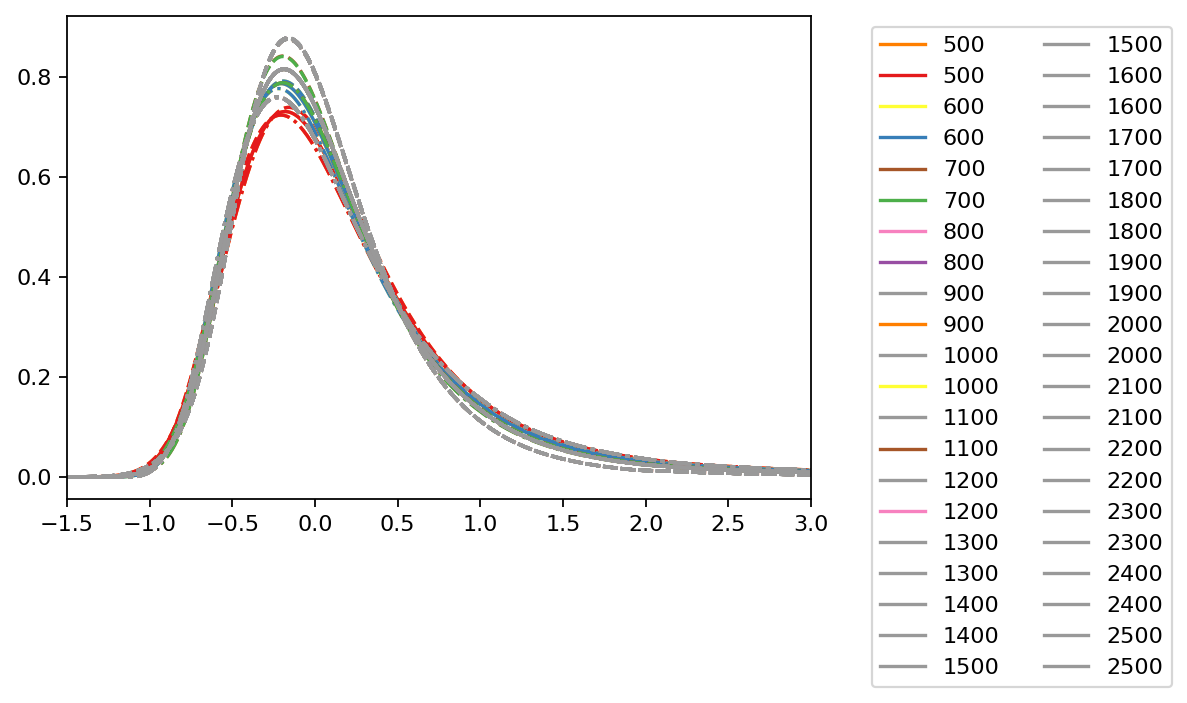

In [80]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,2]/Gxx_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,1]/Gxx_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,0]/Gxx_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxx_cc_1b_zexp[:,i,2]/Gxx_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_1b_zexp[:,i,1]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_1b_zexp[:,i,0]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3.)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0))
plt.show() 

In [81]:
#print(Gxx_cc_dip)
#print(Gxx_cc_zexp*2)

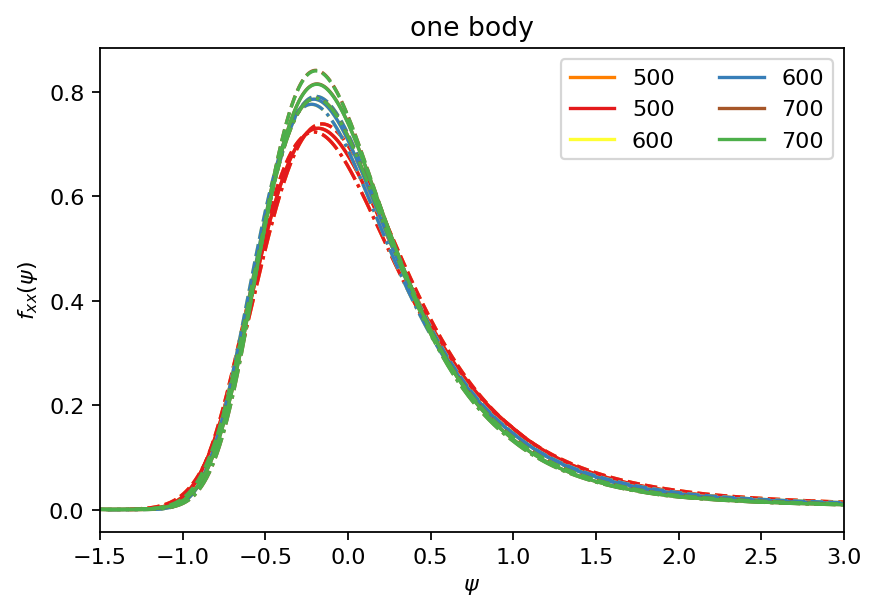

In [82]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,2]/Gxx_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,1]/Gxx_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_1b_dip[:,i,0]/Gxx_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxx_cc_1b_zexp[:,i,2]/Gxx_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_1b_zexp[:,i,1]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_1b_zexp[:,i,0]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.title('one body')
plt.ylabel(r'$f_{xx}(\psi)$')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)
plt.show() 

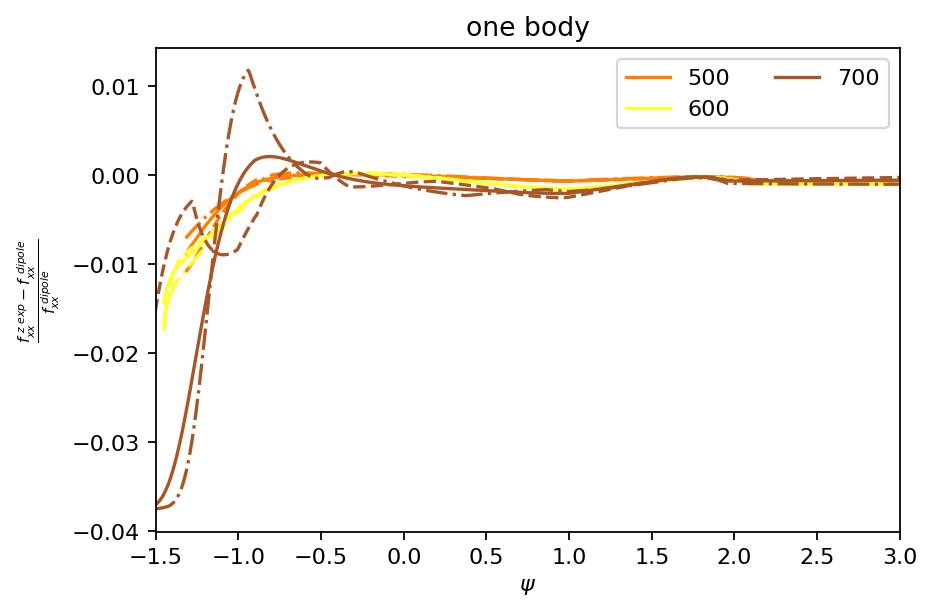

In [83]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxx_cc_1b_dip[:,i,2]/Gxx_cc_dip[i,:]
    dip1 = Rxx_cc_1b_dip[:,i,1]/Gxx_cc_dip[i,:]
    dip0 = Rxx_cc_1b_dip[:,i,0]/Gxx_cc_dip[i,:]
    z2 = Rxx_cc_1b_zexp[:,i,2]/Gxx_cc_zexp[i,:]
    z1 = Rxx_cc_1b_zexp[:,i,1]/Gxx_cc_zexp[i,:]
    z0 = Rxx_cc_1b_zexp[:,i,0]/Gxx_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')

    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}}{f_{xx}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_fxx_1b.png',bbox_inches='tight')
plt.show() 

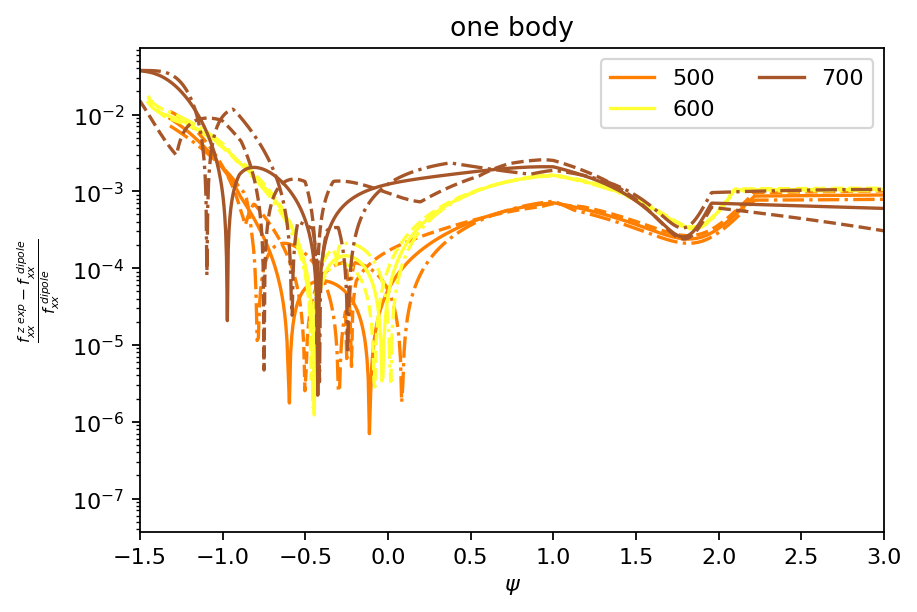

In [84]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxx_cc_1b_dip[:,i,2]/Gxx_cc_dip[i,:]
    dip1 = Rxx_cc_1b_dip[:,i,1]/Gxx_cc_dip[i,:]
    dip0 = Rxx_cc_1b_dip[:,i,0]/Gxx_cc_dip[i,:]
    z2 = Rxx_cc_1b_zexp[:,i,2]/Gxx_cc_zexp[i,:]
    z1 = Rxx_cc_1b_zexp[:,i,1]/Gxx_cc_zexp[i,:]
    z0 = Rxx_cc_1b_zexp[:,i,0]/Gxx_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')

    # plotting the fractional difference
    somefactor = 1
    plt.plot(y[:,i], np.abs((z2/somefactor-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1/somefactor-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0/somefactor-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}}{f_{xx}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_fxx_1b_log.png',bbox_inches='tight')
plt.show() 

## $R_{xx}$ one+two body

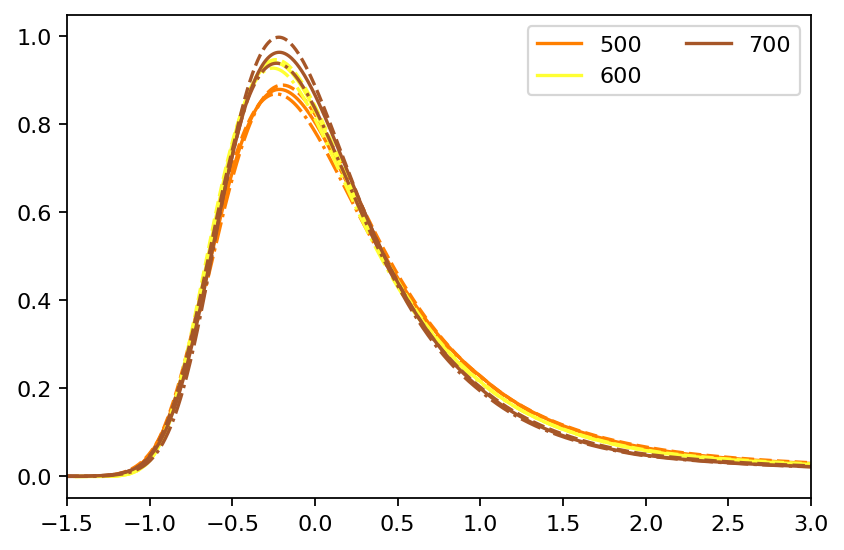

In [85]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,2]/Gxx_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,1]/Gxx_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,0]/Gxx_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
plt.legend(loc=1, ncol=2)
plt.show()  
data_dip=np.array([y[:,4],Rxx_cc_12b_dip[:,4,0]/Gxx_cc_dip[4,:],Rxx_cc_12b_dip[:,4,2]/Gxx_cc_dip[4,:],Rxx_cc_12b_dip[:,4,1]/Gxx_cc_dip[4,:],
               y[:,5],Rxx_cc_12b_dip[:,5,0]/Gxx_cc_dip[5,:],Rxx_cc_12b_dip[:,5,2]/Gxx_cc_dip[5,:],Rxx_cc_12b_dip[:,5,1]/Gxx_cc_dip[5,:],
               y[:,6],Rxx_cc_12b_dip[:,6,0]/Gxx_cc_dip[6,:],Rxx_cc_12b_dip[:,6,2]/Gxx_cc_dip[6,:],Rxx_cc_12b_dip[:,6,1]/Gxx_cc_dip[6,:]])
data_dip = data_dip.T
#np.savetxt('F_xx_12b_dip.dat', data_dip)

In [86]:
# this commented section doesn't work for some reason, but splitting it into separate for loops did work
# so that's what i did
'''
Rxx_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_dip[:,6,2]/Gxx_cc_dip[6,:])
Rxx_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_dip[:,5,2]/Gxx_cc_dip[5,:])

Rxx_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_zexp[:,6,2]/Gxx_cc_zexp[6,:])
Rxx_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_zexp[:,5,2]/Gxx_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_interpolate_600_dip(y[i,j])*Gxx_cc_dip[j,i]
        Rxx_cc_12b_dip[i,j,2] = Rxx_cc_12b_interpolate_700_dip(y[i,j])*Gxx_cc_dip[j,i]
        err_dip = 2 * (Rxx_cc_12b_dip[i,j,2] - Rxx_cc_12b_dip[i,j,0])
        Rxx_cc_12b_dip[i,j,1] = Rxx_cc_12b_dip[i,j,2] + err_dip
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_dip[i,j,2] - err_dip
        
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_interpolate_600_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        Rxx_cc_12b_zexp[i,j,2] = Rxx_cc_12b_interpolate_700_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        err_zexp = 2 * (Rxx_cc_12b_zexp[i,j,2] - Rxx_cc_12b_zexp[i,j,0])
        Rxx_cc_12b_zexp[i,j,1] = Rxx_cc_12b_zexp[i,j,2] + err_zexp
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < -1.4:
            Rxx_cc_12b_dip[i,j,:] = 0
            Rxx_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_12b_dip[i,j,k] < 0:  Rxx_cc_12b_dip[i] = 0 ## $R_{xy}$ one body,j,k] = 0
            if Rxx_cc_12b_zexp[i,j,k] < 0:  Rxx_cc_12b_zexp[i] = 0
'''
Rxx_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_dip[:,6,2]/Gxx_cc_dip[6,:])
Rxx_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_dip[:,5,2]/Gxx_cc_dip[5,:])
for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_interpolate_600_dip(y[i,j])*Gxx_cc_dip[j,i]
        Rxx_cc_12b_dip[i,j,2] = Rxx_cc_12b_interpolate_700_dip(y[i,j])*Gxx_cc_dip[j,i]
        err = 2 * (Rxx_cc_12b_dip[i,j,2] - Rxx_cc_12b_dip[i,j,0])
        Rxx_cc_12b_dip[i,j,1] = Rxx_cc_12b_dip[i,j,2] + err
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_dip[i,j,2] - err
        if y[i,j] < -1.4:
            Rxx_cc_12b_dip[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_12b_dip[i,j,k] < 0:  Rxx_cc_12b_dip[i,j,k] = 0
                
Rxx_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_zexp[:,6,2]/Gxx_cc_zexp[6,:])
Rxx_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_zexp[:,5,2]/Gxx_cc_zexp[5,:])
for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_interpolate_600_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        Rxx_cc_12b_zexp[i,j,2] = Rxx_cc_12b_interpolate_700_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        err = 2 * (Rxx_cc_12b_zexp[i,j,2] - Rxx_cc_12b_zexp[i,j,0])
        Rxx_cc_12b_zexp[i,j,1] = Rxx_cc_12b_zexp[i,j,2] + err
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_zexp[i,j,2] - err
        if y[i,j] < -1.4:
            Rxx_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_12b_zexp[i,j,k] < 0:  Rxx_cc_12b_zexp[i,j,k] = 0

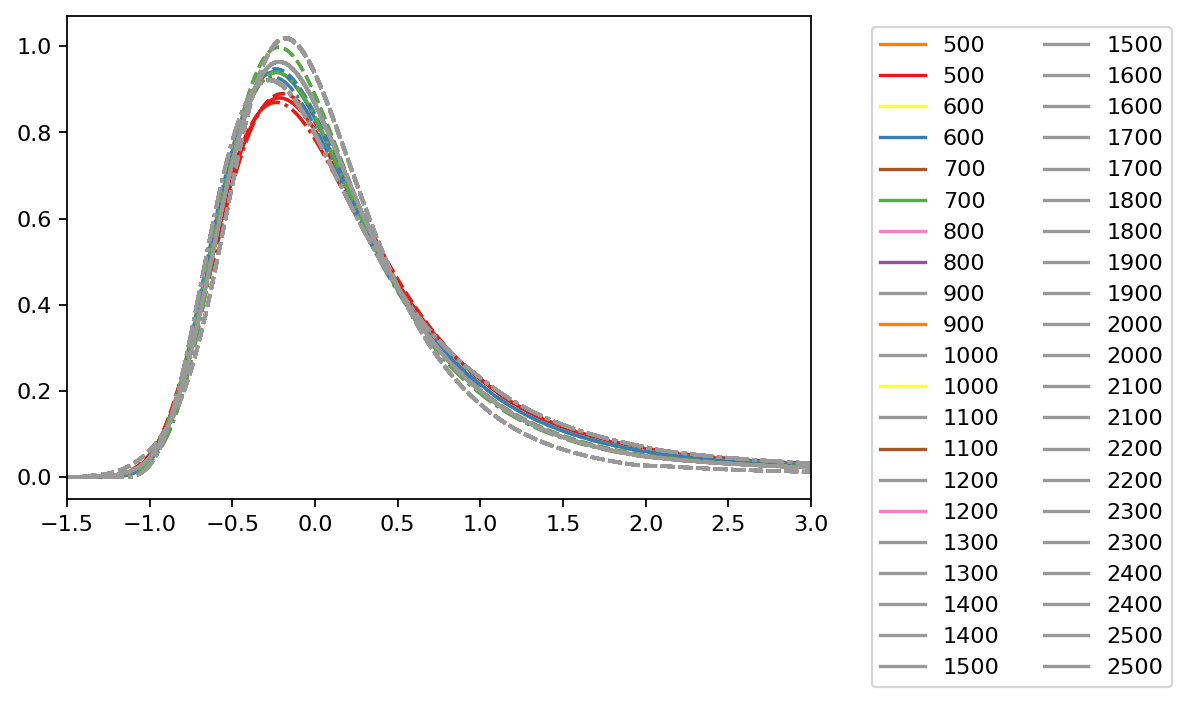

In [87]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,2]/Gxx_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,1]/Gxx_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,0]/Gxx_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxx_cc_12b_zexp[:,i,2]/Gxx_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_12b_zexp[:,i,1]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_12b_zexp[:,i,0]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0))
plt.show()  

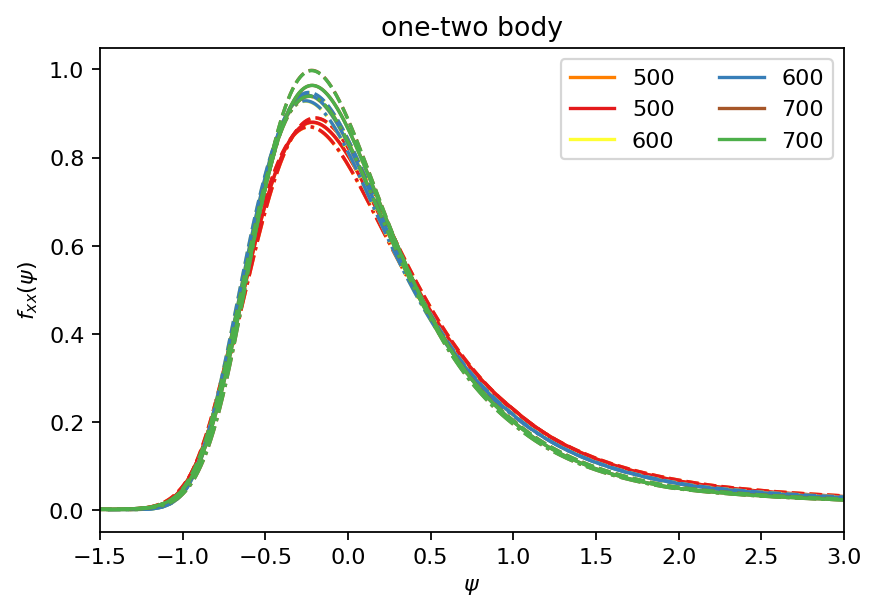

In [88]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,2]/Gxx_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,1]/Gxx_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_12b_dip[:,i,0]/Gxx_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxx_cc_12b_zexp[:,i,2]/Gxx_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxx_cc_12b_zexp[:,i,1]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rxx_cc_12b_zexp[:,i,0]/Gxx_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.ylabel(r'$f_{xx}(\psi)$')
plt.legend(loc=1, ncol=2)
plt.show() 

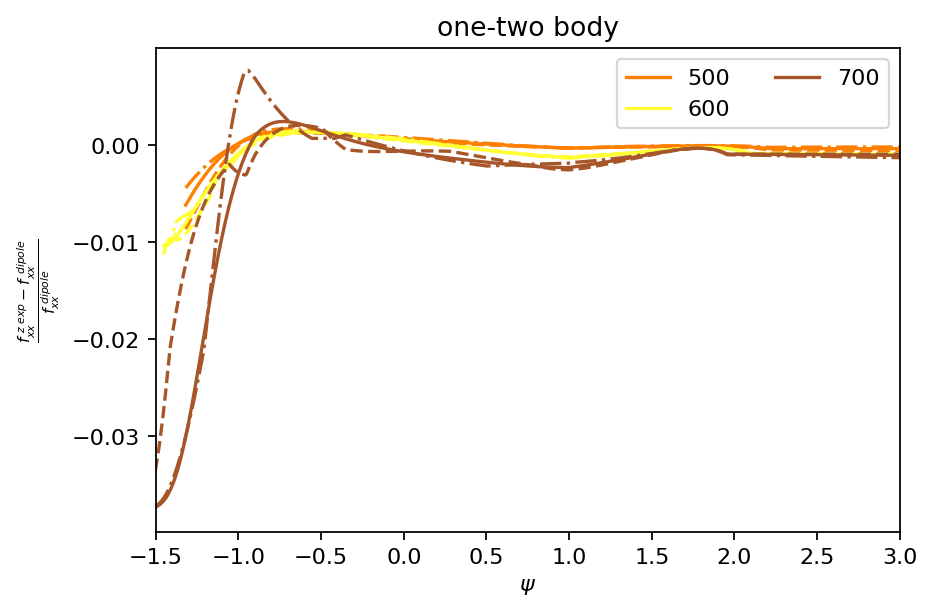

In [89]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxx_cc_12b_dip[:,i,2]/Gxx_cc_dip[i,:]
    dip1 = Rxx_cc_12b_dip[:,i,1]/Gxx_cc_dip[i,:]
    dip0 = Rxx_cc_12b_dip[:,i,0]/Gxx_cc_dip[i,:]
    z2 = Rxx_cc_12b_zexp[:,i,2]/Gxx_cc_zexp[i,:]
    z1 = Rxx_cc_12b_zexp[:,i,1]/Gxx_cc_zexp[i,:]
    z0 = Rxx_cc_12b_zexp[:,i,0]/Gxx_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')

    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}}{f_{xx}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_fxx_12b.png',bbox_inches='tight')
plt.show() 

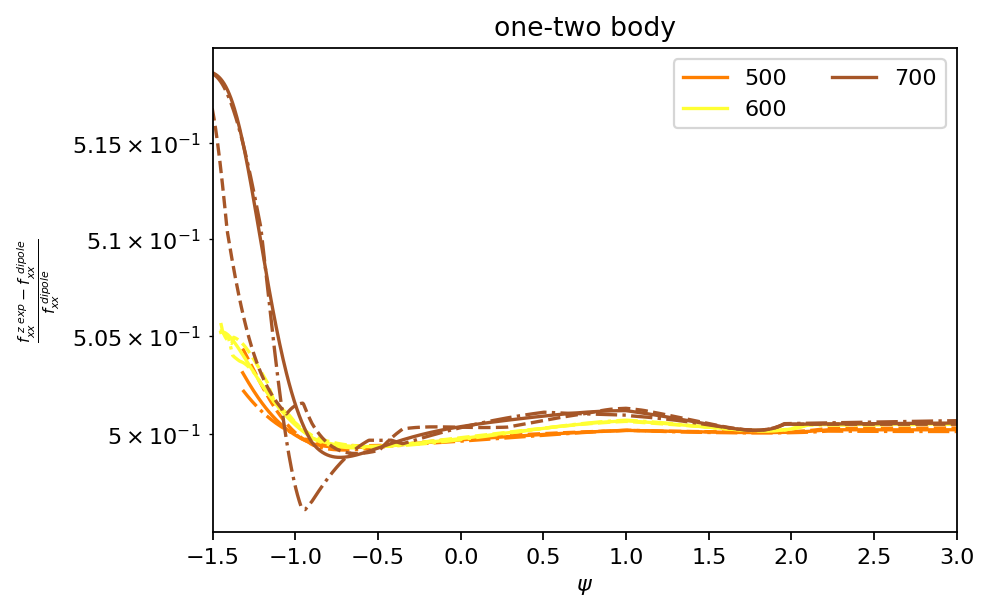

In [90]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxx_cc_12b_dip[:,i,2]/Gxx_cc_dip[i,:]
    dip1 = Rxx_cc_12b_dip[:,i,1]/Gxx_cc_dip[i,:]
    dip0 = Rxx_cc_12b_dip[:,i,0]/Gxx_cc_dip[i,:]
    z2 = Rxx_cc_12b_zexp[:,i,2]/Gxx_cc_zexp[i,:]
    z1 = Rxx_cc_12b_zexp[:,i,1]/Gxx_cc_zexp[i,:]
    z0 = Rxx_cc_12b_zexp[:,i,0]/Gxx_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')

    # plotting the fractional difference
    somefactor = 2
    plt.plot(y[:,i], np.abs((z2/somefactor-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1/somefactor-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0/somefactor-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xx}^{\ z \ exp} - f_{xx}^{\ dipole}}{f_{xx}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_fxx_12b_log.png',bbox_inches='tight')
plt.show() 

## $R_{xy}$ one body

In [91]:
Gxy_cc_dip = np.zeros((nq,nwR))
Gxy_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxy_cc_dip[i,j] = (-(GA*(Gmn-Gmp)*qR[i]*(kF**2-8*mn**2+3*pG**2+4*pG*qR[i]+2*qR[i]**2))/(8*mn**3))/qR[i]
        Gxy_cc_dip[i,j] = Gxy_cc_dip[i,j]*Gevj/Gev*GAj_dip/GA
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxy_cc_min_dip[i] = Gxy_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: Gxy_cc_dip[i,j] = Gxy_cc_min_dip[i]        
        Gxy_cc_dip[i,j] = Gxy_cc_dip[i,j] / kF * ( mn * 12 ) 

In [92]:
# now looking at the z-case for Rxy

# making the Gxy_cc arrays for the z-expansion case
Gxy_cc_zexp = np.zeros((nq,nwR))
Gxy_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxy_cc_zexp[i,j] = (-(GA*(Gmn-Gmp)*qR[i]*(kF**2-8*mn**2+3*pG**2+4*pG*qR[i]+2*qR[i]**2))/(8*mn**3))/qR[i]
        Gxy_cc_zexp[i,j] = Gxy_cc_zexp[i,j]*Gevj/Gev*GAj_zexp/GA
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxy_cc_min_zexp[i] = Gxy_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gxy_cc_zexp[i,j] = Gxy_cc_min_zexp[i]
        Gxy_cc_zexp[i,j] = Gxy_cc_zexp[i,j] / kF * ( mn * 12 ) 

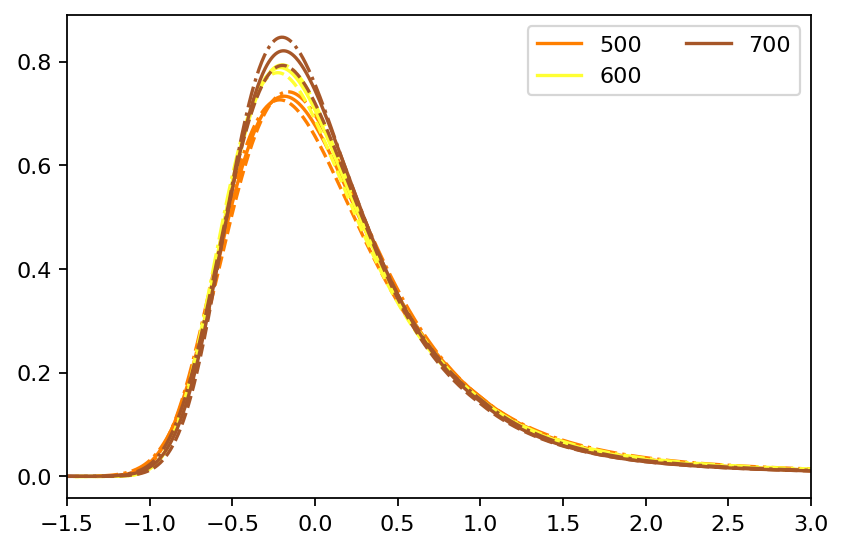

In [93]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,2]/Gxy_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,1]/Gxy_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,0]/Gxy_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
plt.legend(loc=1, ncol=2)
plt.show() 
data_dip=np.array([y[:,4],Rxy_cc_1b_dip[:,4,0]/Gxy_cc_dip[4,:],Rxy_cc_1b_dip[:,4,2]/Gxy_cc_dip[4,:],Rxy_cc_1b_dip[:,4,1]/Gxy_cc_dip[4,:],
                   y[:,5],Rxy_cc_1b_dip[:,5,0]/Gxy_cc_dip[5,:],Rxy_cc_1b_dip[:,5,2]/Gxy_cc_dip[5,:],Rxy_cc_1b_dip[:,5,1]/Gxy_cc_dip[5,:],
                   y[:,6],Rxy_cc_1b_dip[:,6,0]/Gxy_cc_dip[6,:],Rxy_cc_1b_dip[:,6,2]/Gxy_cc_dip[6,:],Rxy_cc_1b_dip[:,6,1]/Gxy_cc_dip[6,:]])
data_dip = data_dip.T
#np.savetxt('F_xy_1b_dip.dat', data_dip)

In [94]:

Rxy_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_1b_dip[:,6,2]/Gxy_cc_dip[6,:])
Rxy_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_1b_dip[:,5,2]/Gxy_cc_dip[5,:])

Rxy_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_1b_zexp[:,6,2]/Gxy_cc_zexp[6,:])
Rxy_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_1b_zexp[:,5,2]/Gxy_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxy_cc_1b_dip[i,j,0] = Rxy_cc_1b_interpolate_600_dip(y[i,j])*Gxy_cc_dip[j,i]
        Rxy_cc_1b_dip[i,j,2] = Rxy_cc_1b_interpolate_700_dip(y[i,j])*Gxy_cc_dip[j,i]
        err_dip = 2 * (Rxy_cc_1b_dip[i,j,2] - Rxy_cc_1b_dip[i,j,0])
        Rxy_cc_1b_dip[i,j,1] = Rxy_cc_1b_dip[i,j,2] + err_dip
        Rxy_cc_1b_dip[i,j,0] = Rxy_cc_1b_dip[i,j,2] - err_dip
        
        Rxy_cc_1b_zexp[i,j,0] = Rxy_cc_1b_interpolate_600_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        Rxy_cc_1b_zexp[i,j,2] = Rxy_cc_1b_interpolate_700_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        err_zexp = 2 * (Rxy_cc_1b_zexp[i,j,2] - Rxy_cc_1b_zexp[i,j,0])
        Rxy_cc_1b_zexp[i,j,1] = Rxy_cc_1b_zexp[i,j,2] + err_zexp
        Rxy_cc_1b_zexp[i,j,0] = Rxy_cc_1b_zexp[i,j,2] - err_zexp
        
        #print(y[i,j])
        if y[i,j] < -1.4:
            Rxy_cc_1b_dip[i,j,:] = 0
            Rxy_cc_1b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if Rxy_cc_1b_dip[i,j,k] < 0:  Rxy_cc_1b_dip[i] = 0 
        #    if Rxy_cc_1b_zexp[i,j,k] < 0:  Rxy_cc_1b_zexp[i] = 0

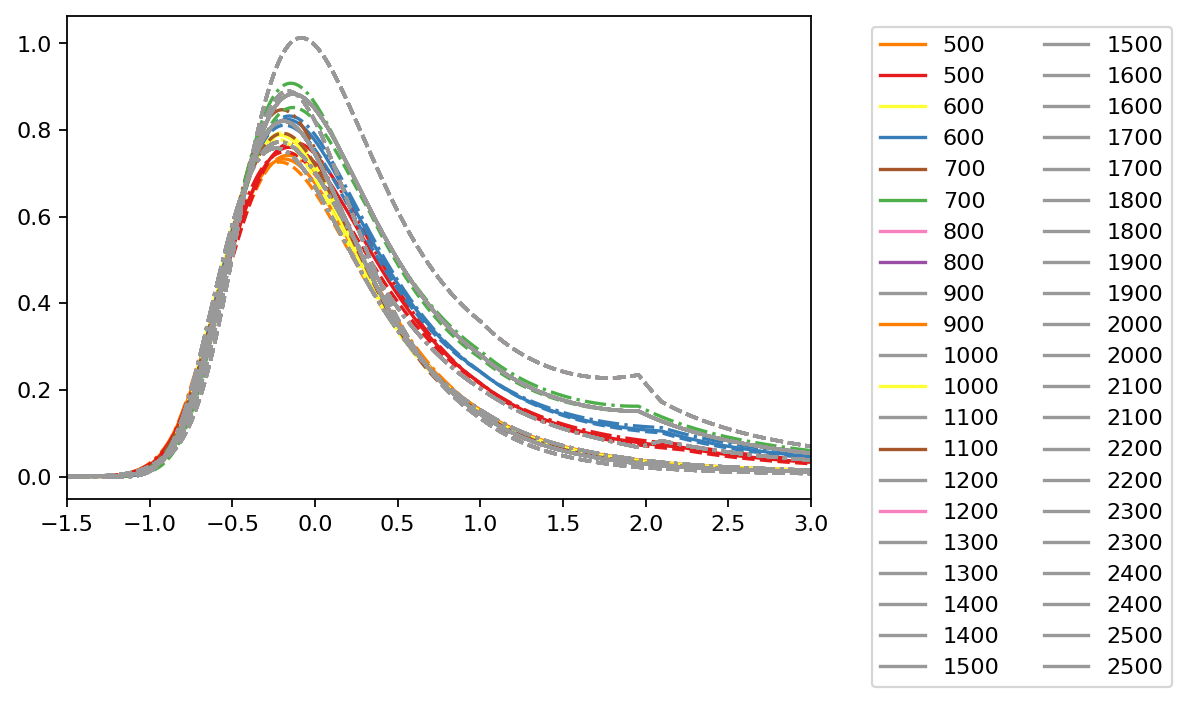

In [95]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,2]/Gxy_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,1]/Gxy_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,0]/Gxy_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxy_cc_1b_zexp[:,i,2]/Gxy_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_1b_zexp[:,i,1]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_1b_zexp[:,i,0]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0))
plt.show() 

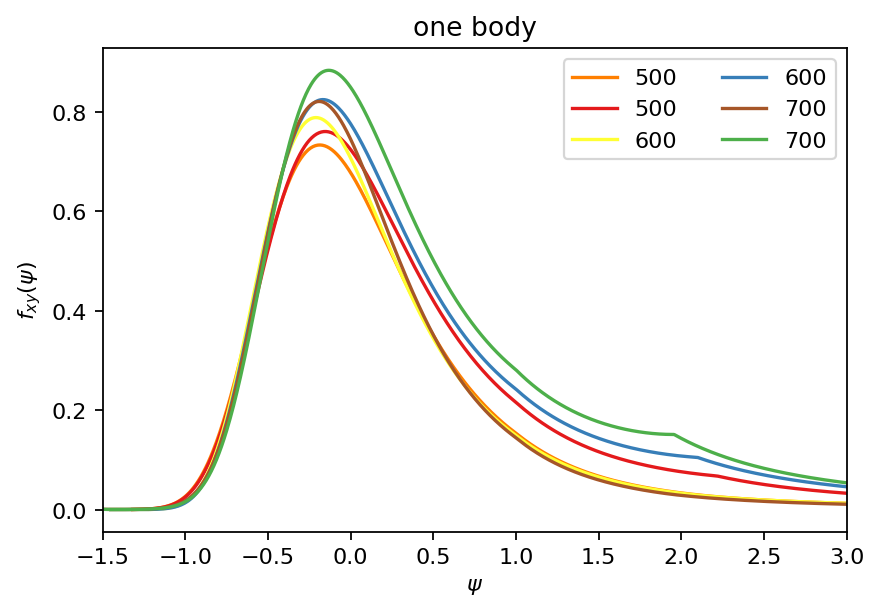

In [96]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,2]/Gxy_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,1]/Gxy_cc_dip[i,:], color=palette(i), linestyle='--')
    #plt.plot(y[:,i], Rxy_cc_1b_dip[:,i,0]/Gxy_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxy_cc_1b_zexp[:,i,2]/Gxy_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], Rxy_cc_1b_zexp[:,i,1]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    #plt.plot(y[:,i], Rxy_cc_1b_zexp[:,i,0]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
#    plt.plot(y[:,i],3/4*(1-y[:,i]**2))
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.title('one body')
plt.ylabel(r'$f_{xy}(\psi)$')
plt.xlabel(r'$\psi$')
plt.legend(loc=1, ncol=2)
plt.show() 

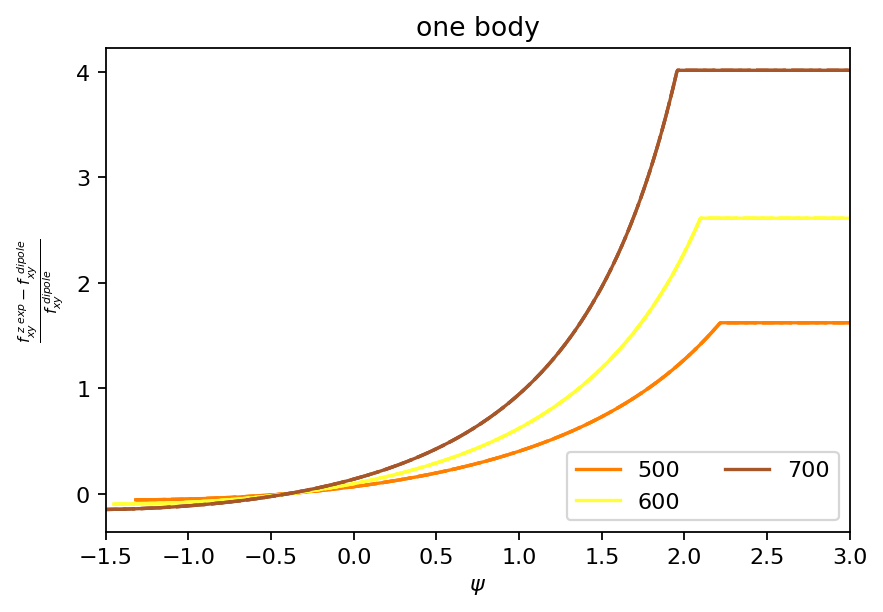

In [97]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxy_cc_1b_dip[:,i,2]/Gxy_cc_dip[i,:]
    dip1 = Rxy_cc_1b_dip[:,i,1]/Gxy_cc_dip[i,:]
    dip0 = Rxy_cc_1b_dip[:,i,0]/Gxy_cc_dip[i,:]
    z2 = Rxy_cc_1b_zexp[:,i,2]/Gxy_cc_zexp[i,:]
    z1 = Rxy_cc_1b_zexp[:,i,1]/Gxy_cc_zexp[i,:]
    z0 = Rxy_cc_1b_zexp[:,i,0]/Gxy_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')

    # plotting the fractional difference
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=4, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}}{f_{xy}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_fxy_1b.png',bbox_inches='tight')
plt.show() 

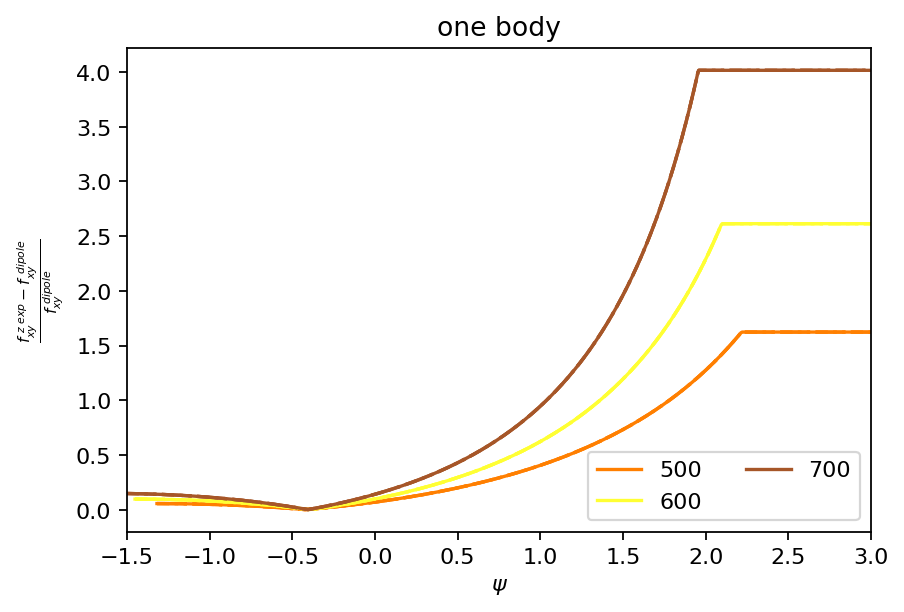

In [98]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxy_cc_1b_dip[:,i,2]/Gxy_cc_dip[i,:]
    dip1 = Rxy_cc_1b_dip[:,i,1]/Gxy_cc_dip[i,:]
    dip0 = Rxy_cc_1b_dip[:,i,0]/Gxy_cc_dip[i,:]
    z2 = Rxy_cc_1b_zexp[:,i,2]/Gxy_cc_zexp[i,:]
    z1 = Rxy_cc_1b_zexp[:,i,1]/Gxy_cc_zexp[i,:]
    z0 = Rxy_cc_1b_zexp[:,i,0]/Gxy_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')

    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one body')
plt.xlabel(r'$\psi$')
plt.legend(loc=4, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}}{f_{xy}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_fxy_1b_log.png',bbox_inches='tight')
plt.show() 

In [99]:
#1/0

## $R_{xy}$ one+two body

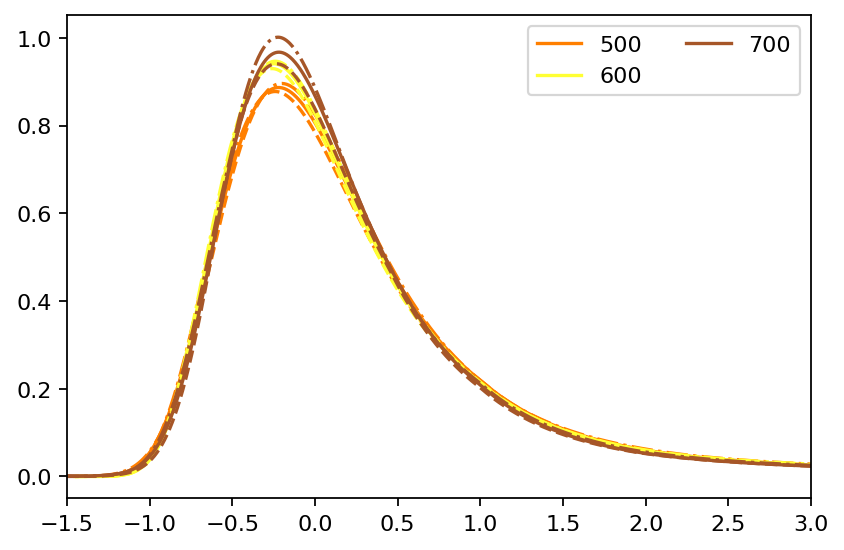

In [100]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,2]/Gxy_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,1]/Gxy_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,0]/Gxy_cc_dip[i,:], color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
plt.legend(loc=1, ncol=2)
plt.show() 
data_dip=np.array([y[:,4],Rxy_cc_12b_dip[:,4,0]/Gxy_cc_dip[4,:],Rxy_cc_12b_dip[:,4,2]/Gxy_cc_dip[4,:],Rxy_cc_12b_dip[:,4,1]/Gxy_cc_dip[4,:],
                   y[:,5],Rxy_cc_12b_dip[:,5,0]/Gxy_cc_dip[5,:],Rxy_cc_12b_dip[:,5,2]/Gxy_cc_dip[5,:],Rxy_cc_12b_dip[:,5,1]/Gxy_cc_dip[5,:],
                   y[:,6],Rxy_cc_12b_dip[:,6,0]/Gxy_cc_dip[6,:],Rxy_cc_12b_dip[:,6,2]/Gxy_cc_dip[6,:],Rxy_cc_12b_dip[:,6,1]/Gxy_cc_dip[6,:]])
data_dip = data_dip.T
#np.savetxt('F_xy_12b_dip.dat', data_dip)

In [101]:
Rxy_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_12b_dip[:,6,2]/Gxy_cc_dip[6,:])
Rxy_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_12b_dip[:,5,2]/Gxy_cc_dip[5,:])

Rxy_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_12b_zexp[:,6,2]/Gxy_cc_zexp[6,:])
Rxy_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_12b_zexp[:,5,2]/Gxy_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxy_cc_12b_dip[i,j,0] = Rxy_cc_12b_interpolate_600_dip(y[i,j])*Gxy_cc_dip[j,i]
        Rxy_cc_12b_dip[i,j,2] = Rxy_cc_12b_interpolate_700_dip(y[i,j])*Gxy_cc_dip[j,i]
        err_dip = 2 * (Rxy_cc_12b_dip[i,j,2] - Rxy_cc_12b_dip[i,j,0])
        Rxy_cc_12b_dip[i,j,1] = Rxy_cc_12b_dip[i,j,2] + err_dip
        Rxy_cc_12b_dip[i,j,0] = Rxy_cc_12b_dip[i,j,2] - err_dip
        
        Rxy_cc_12b_zexp[i,j,0] = Rxy_cc_12b_interpolate_600_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        Rxy_cc_12b_zexp[i,j,2] = Rxy_cc_12b_interpolate_700_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        err_zexp = 2 * (Rxy_cc_12b_zexp[i,j,2] - Rxy_cc_12b_zexp[i,j,0])
        Rxy_cc_12b_zexp[i,j,1] = Rxy_cc_12b_zexp[i,j,2] + err_zexp
        Rxy_cc_12b_zexp[i,j,0] = Rxy_cc_12b_zexp[i,j,2] - err_zexp
        
        #print(y[i,j])
        if y[i,j] < -1.4:
            Rxy_cc_12b_dip[i,j,:] = 0
            Rxy_cc_12b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if Rxy_cc_12b_dip[i,j,k] < 0:  Rxy_cc_12b_dip[i] = 0 
        #    if Rxy_cc_12b_zexp[i,j,k] < 0:  Rxy_cc_12b_zexp[i] = 0

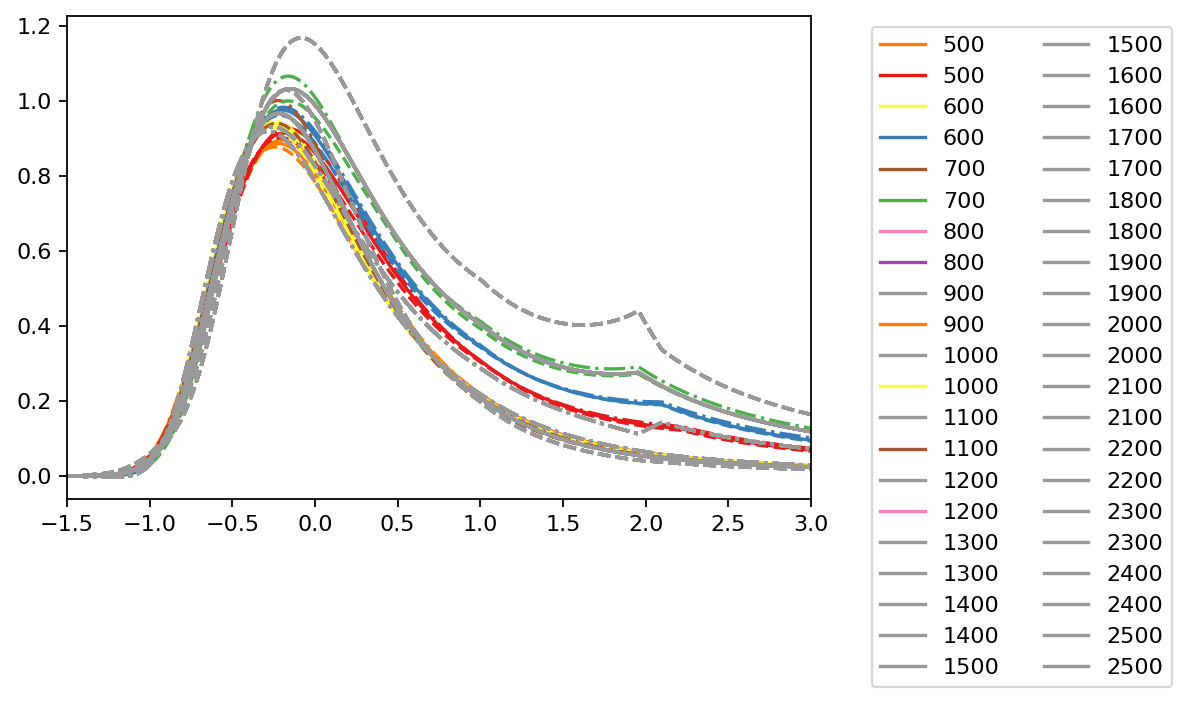

In [102]:
from matplotlib.pyplot import figure
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,25):
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,2]/Gxy_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,1]/Gxy_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,0]/Gxy_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxy_cc_12b_zexp[:,i,2]/Gxy_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_12b_zexp[:,i,1]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_12b_zexp[:,i,0]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3)
plt.legend(loc=1, ncol=2, bbox_to_anchor=(1.5, 1.0))
plt.show() 

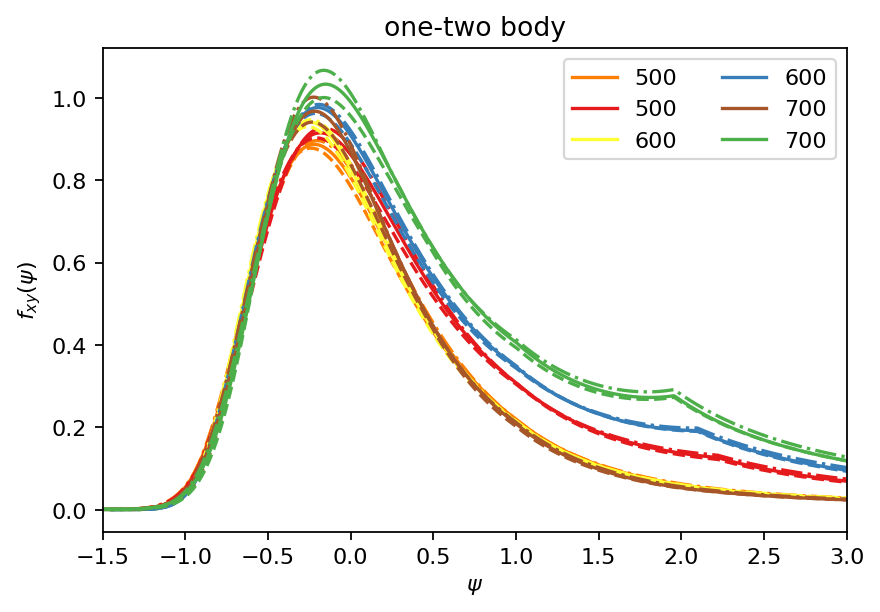

In [103]:
# plotting the dipole and z-expansion scaling functions
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,2]/Gxy_cc_dip[i,:], color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,1]/Gxy_cc_dip[i,:], color=palette(i), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_12b_dip[:,i,0]/Gxy_cc_dip[i,:], color=palette(i), linestyle='-.')
    plt.plot(y[:,i], Rxy_cc_12b_zexp[:,i,2]/Gxy_cc_zexp[i,:], color=palette(i-4), label=qR[i], linestyle='-')
    plt.plot(y[:,i], Rxy_cc_12b_zexp[:,i,1]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='--')
    plt.plot(y[:,i], Rxy_cc_12b_zexp[:,i,0]/Gxy_cc_zexp[i,:], color=palette(i-4), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(0,0.9)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.ylabel(r'$f_{xy}(\psi)$')
plt.legend(loc=1, ncol=2)
plt.show() 

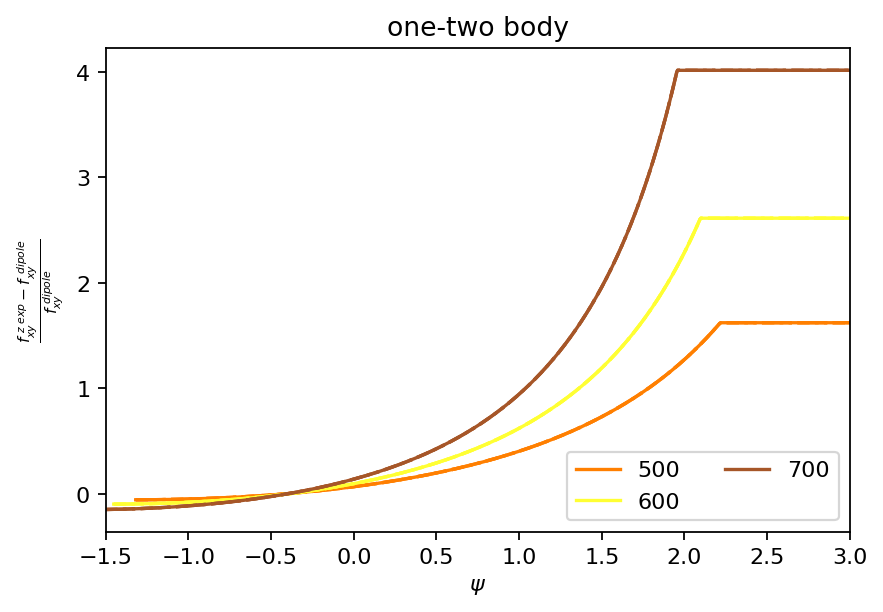

In [104]:
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxy_cc_12b_dip[:,i,2]/Gxy_cc_dip[i,:]
    dip1 = Rxy_cc_12b_dip[:,i,1]/Gxy_cc_dip[i,:]
    dip0 = Rxy_cc_12b_dip[:,i,0]/Gxy_cc_dip[i,:]
    z2 = Rxy_cc_12b_zexp[:,i,2]/Gxy_cc_zexp[i,:]
    z1 = Rxy_cc_12b_zexp[:,i,1]/Gxy_cc_zexp[i,:]
    z0 = Rxy_cc_12b_zexp[:,i,0]/Gxy_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')
    avg2 = (z2+dip2)/2
    # plotting the fractional difference
    #plt.plot(y[:,i], (z2-dip2)/avg2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z2-dip2)/dip2, color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], (z1-dip1)/dip1, color=palette(i), linestyle='--')
    plt.plot(y[:,i], (z0-dip0)/dip0, color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=4, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}}{f_{xy}^{\ dipole}}$')

#plt.yscale('log')
#plt.savefig('fractional_difference_fxy_12b.png',bbox_inches='tight')
plt.show() 

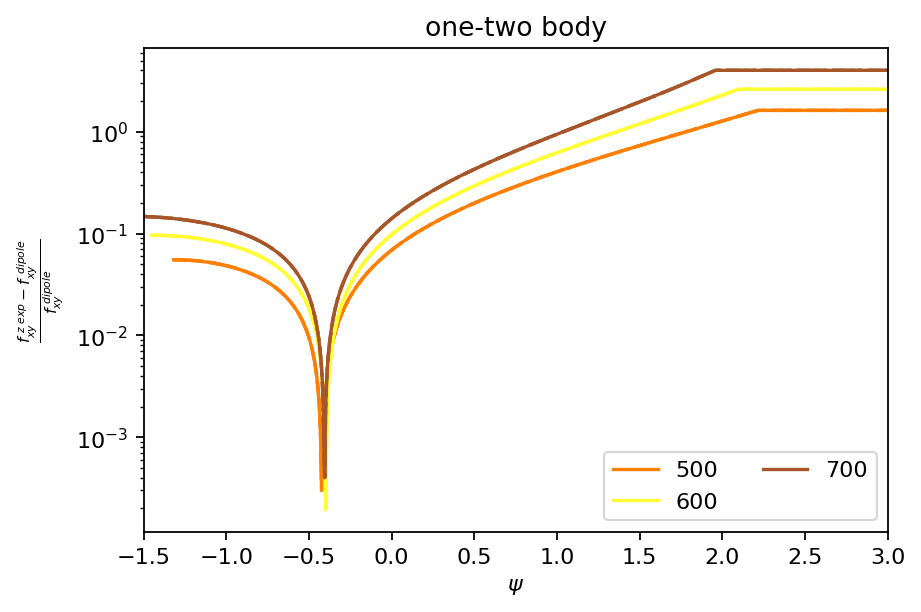

In [105]:
# making the above into a log plot
# looking at the difference of the dipole and z-expansion since they're very close to each other in the above
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
for i in range (4,7):
    dip2 = Rxy_cc_12b_dip[:,i,2]/Gxy_cc_dip[i,:]
    dip1 = Rxy_cc_12b_dip[:,i,1]/Gxy_cc_dip[i,:]
    dip0 = Rxy_cc_12b_dip[:,i,0]/Gxy_cc_dip[i,:]
    z2 = Rxy_cc_12b_zexp[:,i,2]/Gxy_cc_zexp[i,:]
    z1 = Rxy_cc_12b_zexp[:,i,1]/Gxy_cc_zexp[i,:]
    z0 = Rxy_cc_12b_zexp[:,i,0]/Gxy_cc_zexp[i,:]
    #plt.plot(y[:,i], z2-dip2, color=palette(i), label=qR[i], linestyle='-')
    #plt.plot(y[:,i], z1-dip1, color=palette(i), linestyle='--')
    #plt.plot(y[:,i], z0-dip0, color=palette(i), linestyle='-.')

    # plotting the fractional difference
    plt.plot(y[:,i], np.abs((z2-dip2)/dip2), color=palette(i), label=qR[i], linestyle='-')
    plt.plot(y[:,i], np.abs((z1-dip1)/dip1), color=palette(i), linestyle='--')
    plt.plot(y[:,i], np.abs((z0-dip0)/dip0), color=palette(i), linestyle='-.')
plt.xlim(-1.5,3)
#plt.ylim(-0.01,0.01)
plt.title('one-two body')
plt.xlabel(r'$\psi$')
plt.legend(loc=4, ncol=2)

# plotting the difference
#plt.ylabel(r'$f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}$')
#plotting the fractional difference
plt.ylabel(r'$\frac{f_{xy}^{\ z \ exp} - f_{xy}^{\ dipole}}{f_{xy}^{\ dipole}}$')

plt.yscale('log')
#plt.savefig('fractional_difference_fxy_12b_log.png',bbox_inches='tight')
plt.show() 

## Interpolation
Now we interpolate all response functions and plot them

In [106]:
def y_int_nr(wr,qr):
    return mn/qr/kF*(wr-qr**2/2/mn-eps)
def w_inv_nr(y,qr):
    return y*qr*kF/mn+qr**2/2/mn+eps

ny=100
ylin=np.linspace(-1.9, 3, ny)



def interp_responses_nr(nq,ny,nwR,qR,ylin,wR,RL):
    y=np.zeros((nwR,nq))
    RL_int_y=np.zeros((ny,nq))
    #RL_int_q=np.zeros((ny))
    for i in range (nq):
        for j in range (nwR):
            y[j,i]= y_int_nr(wR[j],qR[i])  
        RL_int_w = InterpolatedUnivariateSpline(y[:,i],RL[:,i],k=3)
        for j in range (ny):
            if(ylin[j]<y[nwR-1,i] and ylin[j]> y[0,i]):
                RL_int_y[j,i]=RL_int_w(ylin[j])
    RL_int_yq = interpolate.RectBivariateSpline(ylin, qR,RL_int_y)
    return RL_int_yq


R00_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,2])])
R00_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,0])])
R00_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,1])])

R0z_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,2])])
R0z_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,0])])
R0z_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,1])])

Rzz_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,2]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,2])])
Rzz_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,0])])
Rzz_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,1])])

Rxx_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,2])])
Rxx_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,0])])
Rxx_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,1])])

Rxy_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,2])])
Rxy_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,0])])
Rxy_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,1])])

###

R00_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,2])])
R00_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,0])])
R00_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,1])])

R0z_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,2])])
R0z_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,0])])
R0z_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,1])])

Rzz_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,2])])
Rzz_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,0])])
Rzz_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,1])])

Rxx_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,2])])
Rxx_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,0])])
Rxx_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,1])])

Rxy_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,2])])
Rxy_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,0])])
Rxy_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,1])])

# comparing the different response functions

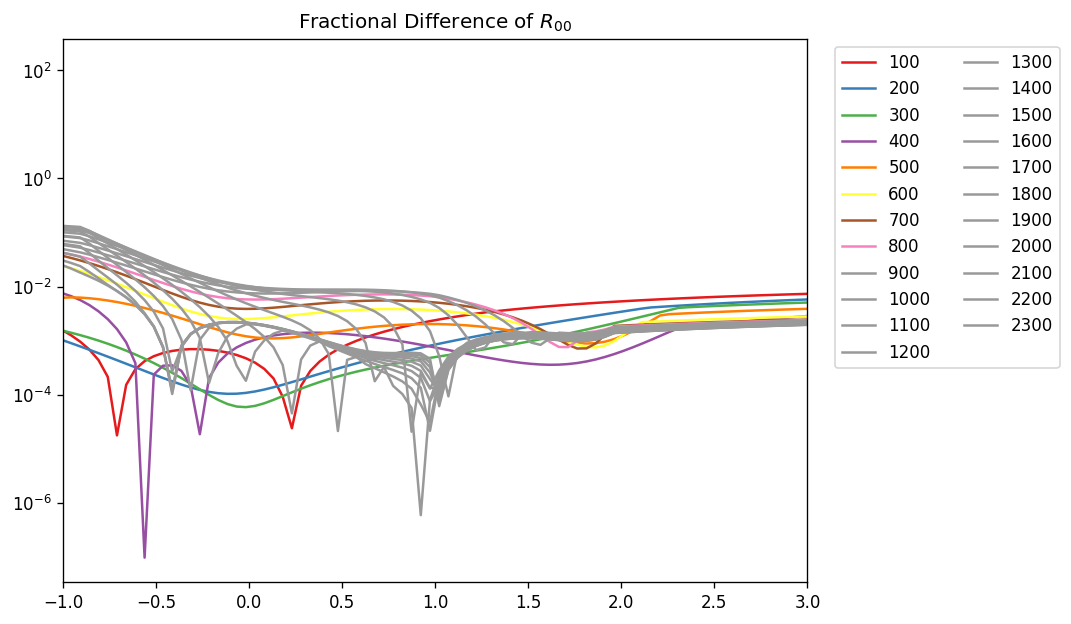

In [107]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# things start to get messy when i>=24
for i in range (23):
    #plt.plot(ylin, R00_int_yq_1b[0](ylin,qR[i]), color=palette(i), label=qR[i])
    #plt.plot(ylin, R00_int_yq_1b[1](ylin,qR[i]), color=palette(i+1), label=qR[i])
    #print(R00_int_yq_1b[0](ylin,qR[i]))
    plt.plot(ylin, np.abs((R00_int_yq_1b[0](ylin,qR[i])-R00_int_yq_1b[1](ylin,qR[i]))/R00_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])

#plt.plot(w, R00_cc_1b_int_min(w,q), 'purple', linestyle='-.')
#plt.plot(ylin, R00_int_yq_1b[0](ylin,450.0), 'purple', linestyle='--')
#plt.plot(w, R00_cc_1b_int(w,q), 'purple', linestyle='-')

#plt.xlim(0, 1000)
plt.xlim(-1.,3)
plt.yscale('log')
plt.title(r'Fractional Difference of $R_{00}$')
plt.legend(loc=1, ncol=2, bbox_to_anchor=[1.35, 1.0])
plt.show()

<ipython-input-108-803408caa8c4>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ylin, np.abs((R0z_int_yq_1b[0](ylin,qR[i])-R0z_int_yq_1b[1](ylin,qR[i]))/R0z_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])
<ipython-input-108-803408caa8c4>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ylin, np.abs((R0z_int_yq_1b[0](ylin,qR[i])-R0z_int_yq_1b[1](ylin,qR[i]))/R0z_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])


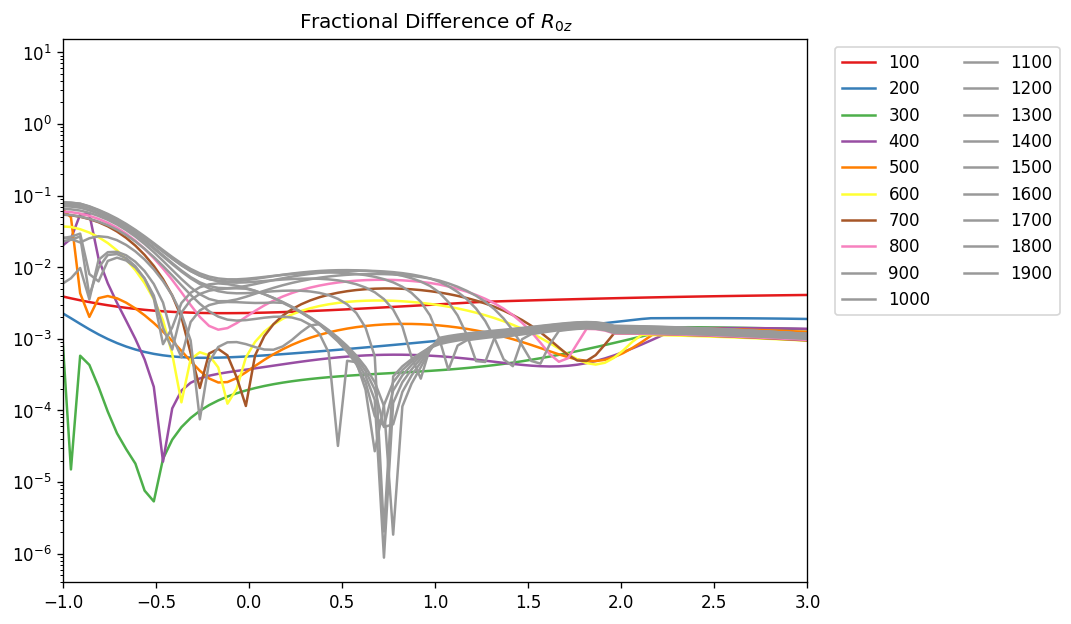

In [108]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# things start to get messy when i>=13
for i in range (19):
    #plt.plot(ylin, R0z_int_yq_1b[0](ylin,qR[i]), color=palette(i), label=qR[i])
    #plt.plot(ylin, R0z_int_yq_1b[1](ylin,qR[i]), color=palette(i+1), label=qR[i])
    #print(R0z_int_yq_1b[0](ylin,qR[i]))
    plt.plot(ylin, np.abs((R0z_int_yq_1b[0](ylin,qR[i])-R0z_int_yq_1b[1](ylin,qR[i]))/R0z_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])


#plt.xlim(0, 1000)
plt.xlim(-1.,3)
plt.yscale('log')
plt.title(r'Fractional Difference of $R_{0z}$')
plt.legend(loc=1, ncol=2, bbox_to_anchor=[1.35, 1.0])
plt.show()

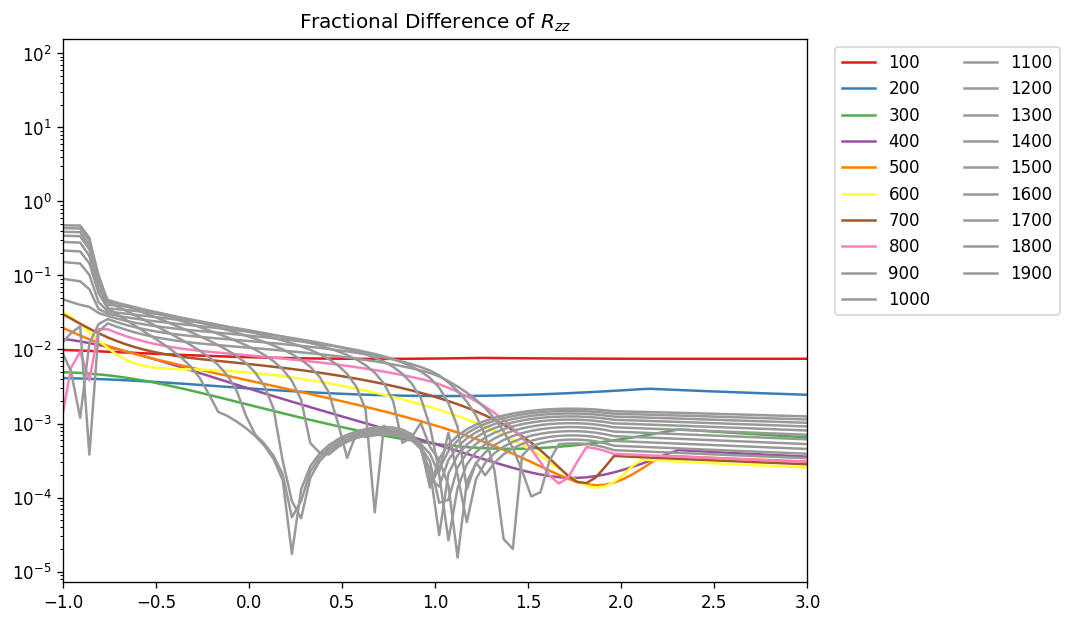

In [109]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# things start to get messy when i>=20
# it's really bad when i=25
for i in range (19):
    #plt.plot(ylin, Rzz_int_yq_1b[0](ylin,qR[i]), color=palette(i), label=qR[i])
    #plt.plot(ylin, Rzz_int_yq_1b[1](ylin,qR[i]), color=palette(i+1), label=qR[i])
    #print(R0z_int_yq_1b[0](ylin,qR[i]))
    plt.plot(ylin, np.abs((Rzz_int_yq_1b[0](ylin,qR[i])-Rzz_int_yq_1b[1](ylin,qR[i]))/Rzz_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])


#plt.xlim(0, 1000)
plt.xlim(-1.,3)
plt.yscale('log')
plt.title(r'Fractional Difference of $R_{zz}$')
plt.legend(loc=1, ncol=2, bbox_to_anchor=[1.35, 1.0])
plt.show()

<ipython-input-110-3f4c30f46e4e>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ylin, np.abs((Rxx_int_yq_1b[0](ylin,qR[i])-Rxx_int_yq_1b[1](ylin,qR[i]))/Rxx_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])
<ipython-input-110-3f4c30f46e4e>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ylin, np.abs((Rxx_int_yq_1b[0](ylin,qR[i])-Rxx_int_yq_1b[1](ylin,qR[i]))/Rxx_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])


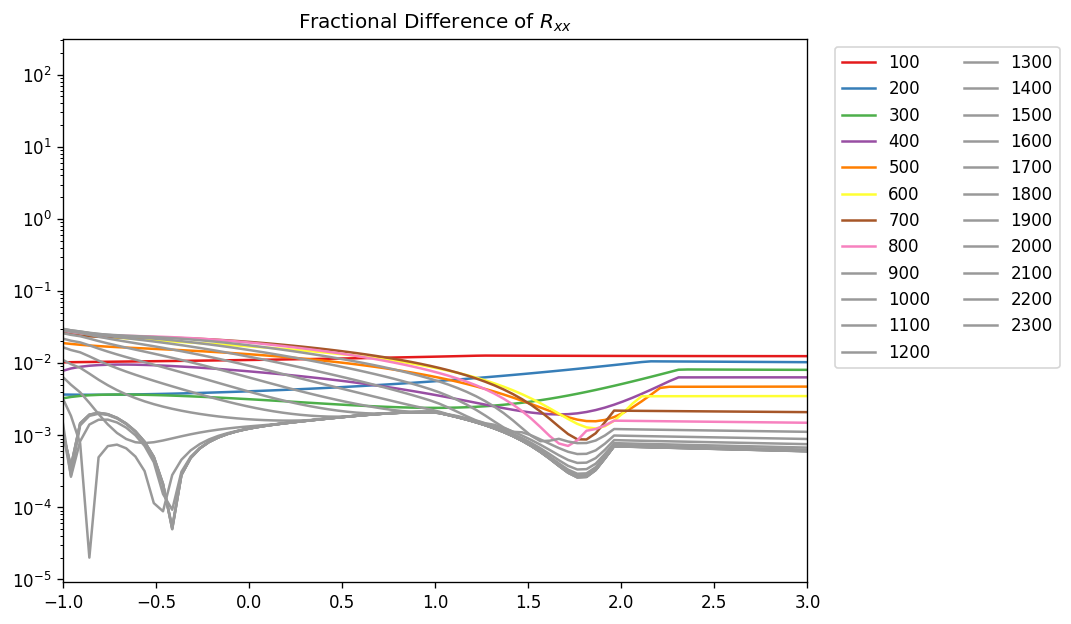

In [110]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# things start to get messy when i>=24
for i in range (23):
    #plt.plot(ylin, Rxx_int_yq_1b[0](ylin,qR[i]), color=palette(i), label=qR[i])
    #plt.plot(ylin, Rxx_int_yq_1b[1](ylin,qR[i]), color=palette(i+1), label=qR[i])
    #print(R0z_int_yq_1b[0](ylin,qR[i]))
    plt.plot(ylin, np.abs((Rxx_int_yq_1b[0](ylin,qR[i])-Rxx_int_yq_1b[1](ylin,qR[i]))/Rxx_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])


#plt.xlim(0, 1000)
plt.xlim(-1.,3)
plt.yscale('log')
plt.title(r'Fractional Difference of $R_{xx}$')
plt.legend(loc=1, ncol=2, bbox_to_anchor=[1.35, 1.0])
plt.show()

<ipython-input-111-4b5ff6ada9db>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ylin, np.abs((Rxy_int_yq_1b[0](ylin,qR[i])-Rxy_int_yq_1b[1](ylin,qR[i]))/Rxy_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])
<ipython-input-111-4b5ff6ada9db>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ylin, np.abs((Rxy_int_yq_1b[0](ylin,qR[i])-Rxy_int_yq_1b[1](ylin,qR[i]))/Rxy_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])
<ipython-input-111-4b5ff6ada9db>:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ylin, np.abs((Rxy_int_yq_1b[0](ylin,qR[i])-Rxy_int_yq_1b[1](ylin,qR[i]))/Rxy_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])


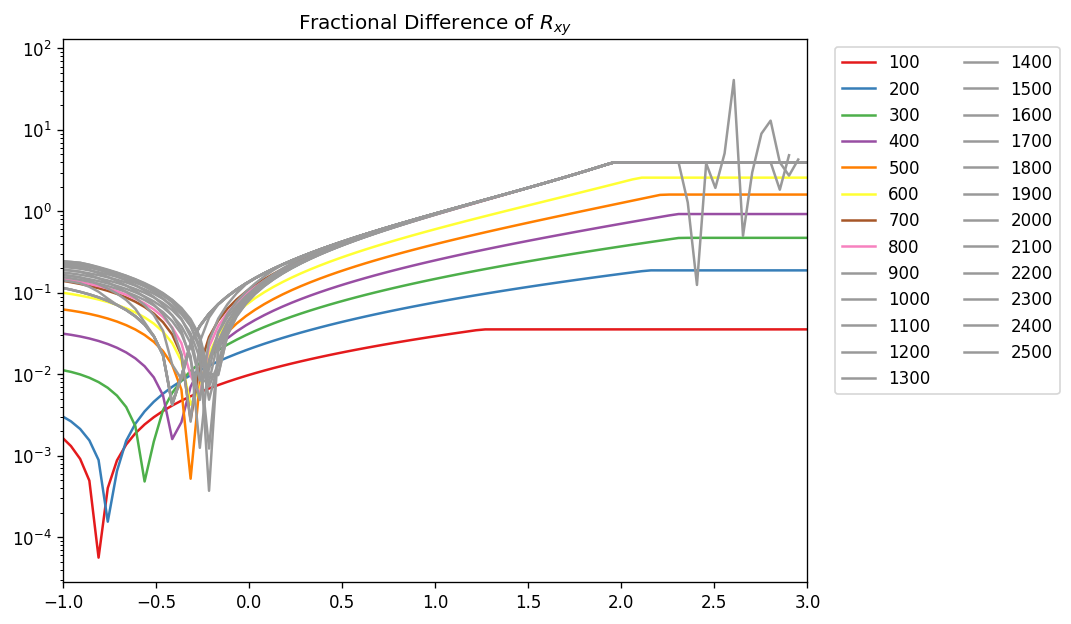

In [111]:
palette = plt.get_cmap('Set1')
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# things start to get messy when i>=24
for i in range (25):
    #plt.plot(ylin, Rxy_int_yq_1b[0](ylin,qR[i]), color=palette(i), label=qR[i])
    #plt.plot(ylin, Rxy_int_yq_1b[1](ylin,qR[i]), color=palette(i+1), label=qR[i])
    #print(R0z_int_yq_1b[0](ylin,qR[i]))
    plt.plot(ylin, np.abs((Rxy_int_yq_1b[0](ylin,qR[i])-Rxy_int_yq_1b[1](ylin,qR[i]))/Rxy_int_yq_1b[0](ylin,qR[i])), color=palette(i), label=qR[i])


#plt.xlim(0, 1000)
plt.xlim(-1.,3)
plt.yscale('log')
plt.title(r'Fractional Difference of $R_{xy}$')
plt.legend(loc=1, ncol=2, bbox_to_anchor=[1.35, 1.0])
plt.show()

# looking at the differential decay rate

In [112]:
# you can plot the other channels and compare with the different form factors

In [113]:
hbar=197.327
ml=105.6584
mn=939.
GF=1.1803*10**(-11)
G=GF*0.97425
mn=939.

# we can compute dsig for either the dipole parameterization or the z-expansion
# dip_or_z = 0 is dipole
# dip_or_z = 1 is z-expansion
# because Rij_int_yq_1(2)b[0] is dipole
# and Rij_int_yq_1(2)b[1] is z-expansion
def dsig_compute_ys(dip_or_z, wi, E, cos):
    Ep=E-wi
    W=E+Ep
    k=E
    kp=np.sqrt(Ep**2-ml**2)
    Q=np.sqrt(k**2+kp**2+2*k*kp*cos)
    q=np.sqrt(k**2+kp**2-2*k*kp*cos)
    # these are the bolded q's from eq. 10
    big_Q = np.sqrt(q**2 - wi**2)
    little_q = q
    #print(q)
    kz=(ml**2-wi**2+q**2+2*E*wi)/2/q
    kx=np.sqrt(E**2-kz**2)
    Qz=2*kz-q
    Qx=2*kx
    L_CC=W**2-q**2-ml**2
    L_CL=(-W*Qz+wi*q)
    L_LL=Qz**2-wi**2+ml**2
    L_T=Qx**2/2.-(wi**2-q**2)+ml**2
    L_Tp=W*q-wi*Qz 
    sig_CC=G**2/4./np.pi**2*kp/2./E
    N_CC=sig_CC*L_CC
    N_CL=sig_CC*L_CL
    N_LL=sig_CC*L_LL
    N_T=sig_CC*L_T
    N_Tp=sig_CC*L_Tp
    yi=y_int_nr(wi,q)
    R00_1b_i=R00_int_yq_1b[dip_or_z](yi,q)
    R00_1b_i_err=np.abs(R00_int_max_yq_1b[dip_or_z](yi,q)-R00_int_min_yq_1b[dip_or_z](yi,q)) 
    R0z_1b_i=R0z_int_yq_1b[dip_or_z](yi,q)
    R0z_1b_i_err=np.abs(R0z_int_max_yq_1b[dip_or_z](yi,q)-R0z_int_min_yq_1b[dip_or_z](yi,q))
    Rzz_1b_i=Rzz_int_yq_1b[dip_or_z](yi,q)
    Rzz_1b_i_err=np.abs(Rzz_int_max_yq_1b[dip_or_z](yi,q)-Rzz_int_min_yq_1b[dip_or_z](yi,q))
    Rxx_1b_i=Rxx_int_yq_1b[dip_or_z](yi,q)
    Rxx_1b_i_err=np.abs(Rxx_int_max_yq_1b[dip_or_z](yi,q)-Rxx_int_min_yq_1b[dip_or_z](yi,q))
    Rxy_1b_i=Rxy_int_yq_1b[dip_or_z](yi,q)
    Rxy_1b_i_err=np.abs(Rxy_int_max_yq_1b[dip_or_z](yi,q)-Rxy_int_min_yq_1b[dip_or_z](yi,q))
    R00_12b_i=R00_int_yq_12b[dip_or_z](yi,q)
    R00_12b_i_err=np.abs(R00_int_max_yq_12b[dip_or_z](yi,q)-R00_int_min_yq_12b[dip_or_z](yi,q)) 
    R0z_12b_i=R0z_int_yq_12b[dip_or_z](yi,q)
    R0z_12b_i_err=np.abs(R0z_int_max_yq_12b[dip_or_z](yi,q)-R0z_int_min_yq_12b[dip_or_z](yi,q))
    Rzz_12b_i=Rzz_int_yq_12b[dip_or_z](yi,q)
    Rzz_12b_i_err=np.abs(Rzz_int_max_yq_12b[dip_or_z](yi,q)-Rzz_int_min_yq_12b[dip_or_z](yi,q))
    Rxx_12b_i=Rxx_int_yq_12b[dip_or_z](yi,q)
    Rxx_12b_i_err=np.abs(Rxx_int_max_yq_12b[dip_or_z](yi,q)-Rxx_int_min_yq_12b[dip_or_z](yi,q))
    Rxy_12b_i=Rxy_int_yq_12b[dip_or_z](yi,q)
    Rxy_12b_i_err=np.abs(Rxy_int_max_yq_12b[dip_or_z](yi,q)-Rxy_int_min_yq_12b[dip_or_z](yi,q))

    if wi > q:
        print('problem, wi > q',wi, q)
    dsig_nu_1b=np.zeros(3)
    dsig_nubar_1b=np.zeros(3)
    dsig_nu_12b=np.zeros(3)
    dsig_nubar_12b=np.zeros(3)
#    if wi < q**2/2/mn+0.5*eps+q*kF/mn:
    if q < 2500:
        dsig_nu=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i-N_Tp*Rxy_1b_i
        
        dsig_nu_e=np.sqrt(N_CC**2*R00_1b_i_err**2+N_CL**2*R0z_1b_i_err**2+N_LL**2*Rzz_1b_i_err**2
                   +N_T**2*Rxx_1b_i_err**2+N_Tp**2*Rxy_1b_i_err**2)
        
        dsig_nubar=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i+N_Tp*Rxy_1b_i
        
        dsig_nubar_e=dsig_nu_e
        dsig_nu_1b[0]=dsig_nu
        dsig_nu_1b[1]=dsig_nu-dsig_nu_e/2
        dsig_nu_1b[2]=dsig_nu+dsig_nu_e/2
        dsig_nubar_1b[0]=dsig_nubar
        dsig_nubar_1b[1]=dsig_nubar-dsig_nubar_e/2
        dsig_nubar_1b[2]=dsig_nubar+dsig_nubar_e/2 
        
        dsig_nu=N_CC*R00_12b_i+N_CL*R0z_12b_i+N_LL*Rzz_12b_i+N_T*Rxx_12b_i-N_Tp*Rxy_12b_i
        dsig_nu_e=np.sqrt(N_CC**2*R00_12b_i_err**2+N_CL**2*R0z_12b_i_err**2+N_LL**2*Rzz_12b_i_err**2
                      +N_T**2*Rxx_12b_i_err**2+N_Tp**2*Rxy_12b_i_err**2)
        dsig_nubar=N_CC*R00_12b_i+N_CL*R0z_12b_i+N_LL*Rzz_12b_i+N_T*Rxx_12b_i+N_Tp*Rxy_12b_i    
        dsig_nubar_e=dsig_nu_e
        
        dsig_nu_12b[0]=dsig_nu
        dsig_nu_12b[1]=dsig_nu-dsig_nu_e/2
        dsig_nu_12b[2]=dsig_nu+dsig_nu_e/2
        dsig_nubar_12b[0]=dsig_nubar
        dsig_nubar_12b[1]=dsig_nubar-dsig_nubar_e/2
        dsig_nubar_12b[2]=dsig_nubar+dsig_nubar_e/2
        dsig_nu_1b=dsig_nu_1b*hbar**2*2*np.pi 
        dsig_nubar_1b=dsig_nubar_1b*hbar**2*2*np.pi
        dsig_nu_12b=dsig_nu_12b*hbar**2*2*np.pi #fm**2 MeV**-1
        dsig_nubar_12b=dsig_nubar_12b*hbar**2*2*np.pi
    return dsig_nu_1b, dsig_nubar_1b, dsig_nu_12b, dsig_nubar_12b, big_Q, little_q

In [114]:
wmax=2000
nw=1000
w=np.linspace(0, wmax, nw)

In [115]:
def get_dsig_arrays(E, theta):
    theta=theta*np.pi/180.
    dsig_nu_1b=np.zeros((nw,3,2))
    dsig_nu_12b=np.zeros((nw,3,2))
    dsig_nubar_1b=np.zeros((nw,3,2))
    dsig_nubar_12b=np.zeros((nw,3,2))
    big_Q_array=np.zeros(nw)
    little_q_array=np.zeros(nw)
    w=np.linspace(0, E-ml, nw)
    for j in range(2):
        for i in range (nw):
            dsig_nu_1b[i,:,j], dsig_nubar_1b[i,:,j], dsig_nu_12b[i,:,j], dsig_nubar_12b[i,:,j], big_Q_array[i], little_q_array[i]  = dsig_compute_ys(j,w[i],E,np.cos(theta))
        
    dsig_nu_1b_dip = dsig_nu_1b[:,0,0]
    dsig_nu_1b_dip_min = dsig_nu_1b[:,1,0]
    dsig_nu_1b_dip_max = dsig_nu_1b[:,2,0]
    dsig_nubar_1b_dip = dsig_nubar_1b[:,0,0]
    dsig_nubar_1b_dip_min = dsig_nubar_1b[:,1,0]
    dsig_nubar_1b_dip_max = dsig_nubar_1b[:,2,0]
    dsig_nu_12b_dip = dsig_nu_12b[:,0,0]
    dsig_nu_12b_dip_min = dsig_nu_12b[:,1,0]
    dsig_nu_12b_dip_max = dsig_nu_12b[:,2,0]
    dsig_nubar_12b_dip = dsig_nubar_12b[:,0,0]
    dsig_nubar_12b_dip_min = dsig_nubar_12b[:,1,0]
    dsig_nubar_12b_dip_max = dsig_nubar_12b[:,2,0]
    
    dsig_nu_1b_zexp = dsig_nu_1b[:,0,1]
    dsig_nu_1b_zexp_min = dsig_nu_1b[:,1,1]
    dsig_nu_1b_zexp_max = dsig_nu_1b[:,2,1]
    dsig_nubar_1b_zexp = dsig_nubar_1b[:,0,1]
    dsig_nubar_1b_zexp_min = dsig_nubar_1b[:,1,1]
    dsig_nubar_1b_zexp_max = dsig_nubar_1b[:,2,1]
    dsig_nu_12b_zexp = dsig_nu_12b[:,0,1]
    dsig_nu_12b_zexp_min = dsig_nu_12b[:,1,1]
    dsig_nu_12b_zexp_max = dsig_nu_12b[:,2,1]
    dsig_nubar_12b_zexp = dsig_nubar_12b[:,0,1]
    dsig_nubar_12b_zexp_min = dsig_nubar_12b[:,1,1]
    dsig_nubar_12b_zexp_max = dsig_nubar_12b[:,2,1]
    
    dsig_dip = np.array([dsig_nu_1b_dip, dsig_nu_1b_dip_min, dsig_nu_1b_dip_max, 
                         dsig_nubar_1b_dip, dsig_nubar_1b_dip_min, dsig_nubar_1b_dip_max, 
                         dsig_nu_12b_dip, dsig_nu_12b_dip_min, dsig_nu_12b_dip_max, 
                         dsig_nubar_12b_dip, dsig_nubar_12b_dip_min, dsig_nubar_12b_dip_max])
    dsig_zexp = np.array([dsig_nu_1b_zexp, dsig_nu_1b_zexp_min, dsig_nu_1b_zexp_max, 
                          dsig_nubar_1b_zexp, dsig_nubar_1b_zexp_min, dsig_nubar_1b_zexp_max, 
                          dsig_nu_12b_zexp, dsig_nu_12b_zexp_min, dsig_nu_12b_zexp_max, 
                          dsig_nubar_12b_zexp, dsig_nubar_12b_zexp_min, dsig_nubar_12b_zexp_max])
    return w, dsig_dip, dsig_zexp, big_Q_array, little_q_array

# dsig arrays have the following form
# dsig[0] = nu_1b
# dsig[1] = nu_1b_min
# dsig[2] = nu_1b_max
# dsig[3] = nubar_1b
# dsig[4] = nubar_1b_min
# dsig[5] = nubar_1b_max
# dsig[6] = nu_12b
# dsig[7] = nu_12b_min
# dsig[8] = nu_12b_max
# dsig[9] = nubar_12b
# dsig[10] = nubar_12b_min
# dsig[11] = nubar_12b_max

<ipython-input-116-59276a7fd763>:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


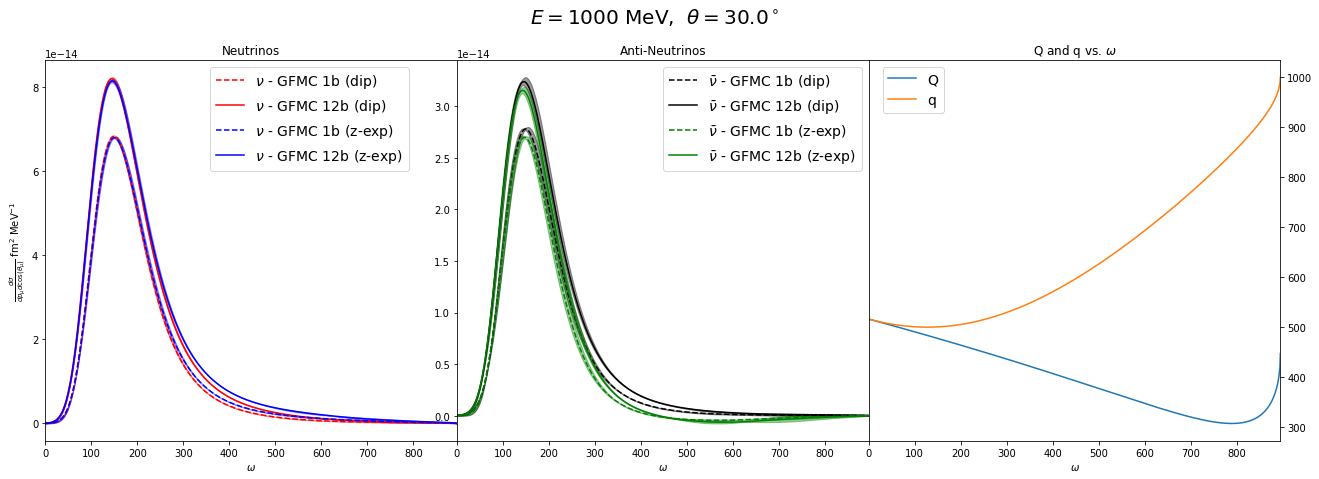

In [116]:
# choosing values of E and theta
E = 1000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

#figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

# plotting the dipole
ax1.plot(w, dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (dip)')
ax1.fill_between(w, dsig_arrays[1][1], dsig_arrays[1][2], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (dip)' )
ax2.fill_between(w, dsig_arrays[1][4], dsig_arrays[1][5], alpha=0.4,color='black')
ax1.plot(w, dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (dip)')
ax1.fill_between(w, dsig_arrays[1][7], dsig_arrays[1][8], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (dip)')
ax2.fill_between(w, dsig_arrays[1][10], dsig_arrays[1][11], alpha=0.4,color='black')

# plotting the z-expansion
ax1.plot(w, dsig_arrays[2][0],'blue',linestyle='--', label=r'$\nu$ - GFMC 1b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][1], dsig_arrays[2][2], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][3],'green',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (z-exp)' )
ax2.fill_between(w, dsig_arrays[2][4], get_dsig_arrays(E, theta)[2][5], alpha=0.4,color='green')
ax1.plot(w, dsig_arrays[2][6],'blue', label=r'$\nu$ - GFMC 12b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][7], dsig_arrays[2][8], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][9],'green', label=r'$\bar{\nu}$ - GFMC 12b (z-exp)')
ax2.fill_between(w, dsig_arrays[2][10], dsig_arrays[2][11], alpha=0.4,color='green')

# plotting q and Q vs omega
ax3.plot(w, big_Q_array, label='Q')
ax3.plot(w, little_q_array, label='q')
#ax3.plot(w, big_Q_array**2 - w**2, label='q')


#ax1.set_legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(0.9, 1.0))
ax2.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(1.0, 1.0))
ax3.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'Neutrinos')
ax2.set_title(r'Anti-Neutrinos')
ax3.set_title(r'Q and q vs. $\omega$')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax3.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax3.set_xlim(0, max(w))
#ax2.yaxis.tick_right()
ax3.yaxis.tick_right()
fig.show()

<ipython-input-117-05b1e7a038a5>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


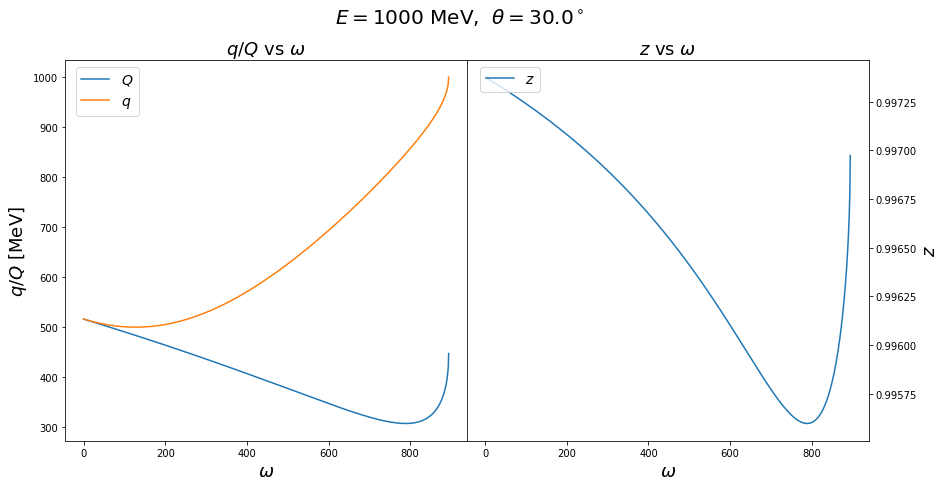

In [117]:
# choosing values of E and theta
E = 1000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]

# looking at q vs omega and z vs omega
# separately so as to not be too crowded

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting q and Q vs omega
ax1.plot(w, big_Q_array, label=r'$Q$')
ax1.plot(w, little_q_array, label=r'$q$')

# plotting z vs omega
z_array = z_exp(big_Q_array**2)
ax2.plot(w, z_array, label=r'$z$')

fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'$q$/$Q$ vs $\omega$', fontsize=18)
ax2.set_title(r'$z$ vs $\omega$', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$q$/$Q$ [MeV]', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
fig.show()

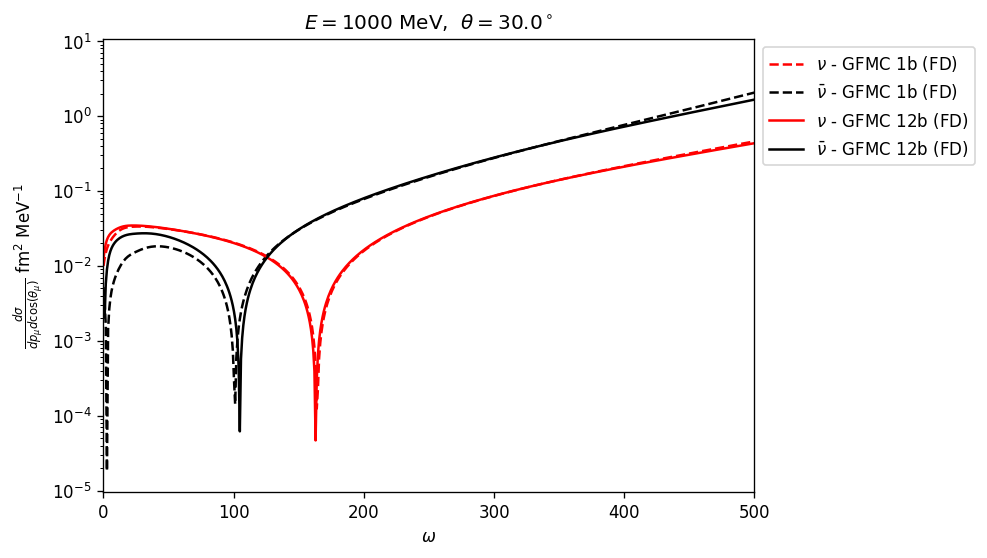

In [118]:
# choosing values of E and theta
E = 1000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
plt.xlim(0, 500)
#plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-119-952ed2834219>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


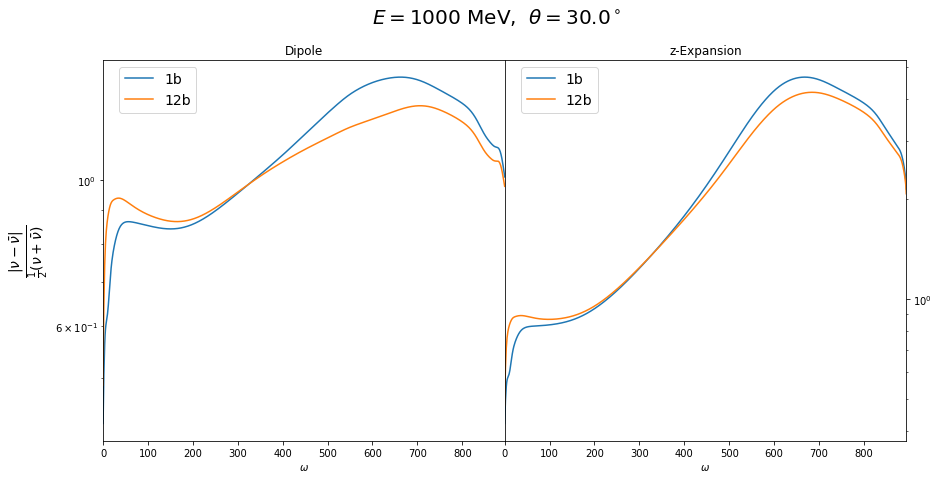

In [119]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 1000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=1000 and $\theta$=80

<ipython-input-120-d5217d7737e7>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


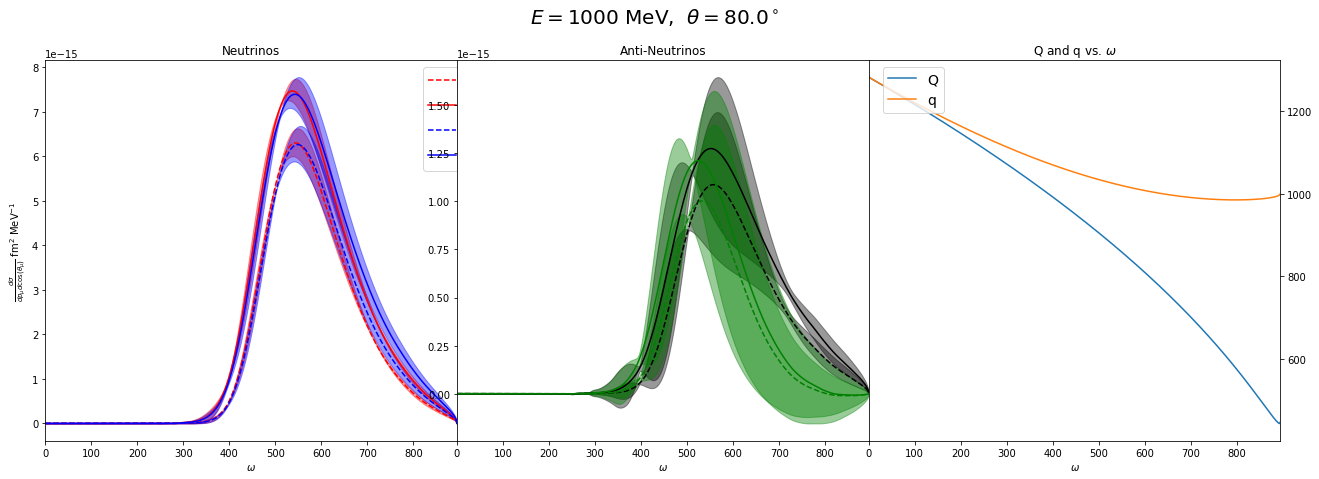

In [120]:
# choosing values of E and theta
E = 1000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

#figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

# plotting the dipole
ax1.plot(w, dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (dip)')
ax1.fill_between(w, dsig_arrays[1][1], dsig_arrays[1][2], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (dip)' )
ax2.fill_between(w, dsig_arrays[1][4], dsig_arrays[1][5], alpha=0.4,color='black')
ax1.plot(w, dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (dip)')
ax1.fill_between(w, dsig_arrays[1][7], dsig_arrays[1][8], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (dip)')
ax2.fill_between(w, dsig_arrays[1][10], dsig_arrays[1][11], alpha=0.4,color='black')

# plotting the z-expansion
ax1.plot(w, dsig_arrays[2][0],'blue',linestyle='--', label=r'$\nu$ - GFMC 1b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][1], dsig_arrays[2][2], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][3],'green',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (z-exp)' )
ax2.fill_between(w, dsig_arrays[2][4], get_dsig_arrays(E, theta)[2][5], alpha=0.4,color='green')
ax1.plot(w, dsig_arrays[2][6],'blue', label=r'$\nu$ - GFMC 12b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][7], dsig_arrays[2][8], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][9],'green', label=r'$\bar{\nu}$ - GFMC 12b (z-exp)')
ax2.fill_between(w, dsig_arrays[2][10], dsig_arrays[2][11], alpha=0.4,color='green')

# plotting q and Q vs omega
ax3.plot(w, big_Q_array, label='Q')
ax3.plot(w, little_q_array, label='q')

#ax1.set_legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(0.9, 1.0))
ax2.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(1.0, 1.0))
ax3.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'Neutrinos')
ax2.set_title(r'Anti-Neutrinos')
ax3.set_title(r'Q and q vs. $\omega$')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax3.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax3.set_xlim(0, max(w))
#ax2.yaxis.tick_right()
ax3.yaxis.tick_right()
fig.show()

<ipython-input-121-92e4ca3fadca>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


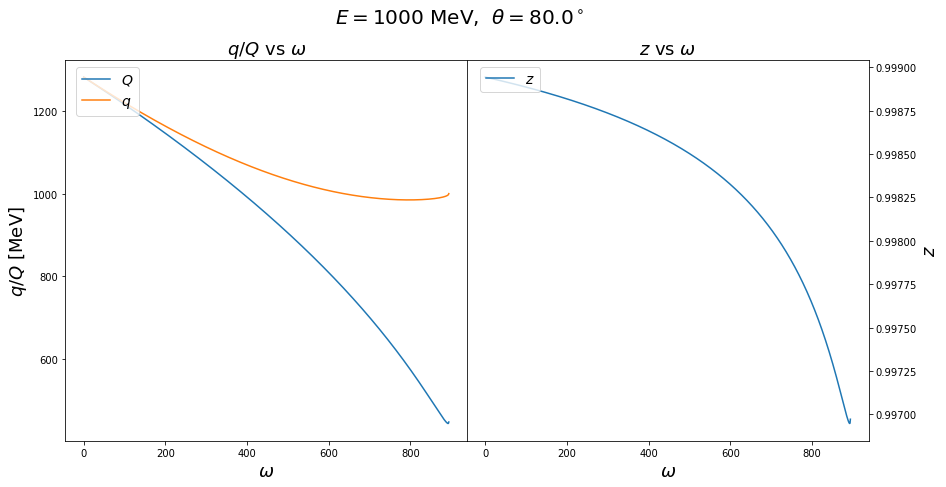

In [121]:
# choosing values of E and theta
E = 1000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]

# looking at q vs omega and z vs omega
# separately so as to not be too crowded

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting q and Q vs omega
ax1.plot(w, big_Q_array, label=r'$Q$')
ax1.plot(w, little_q_array, label=r'$q$')

# plotting z vs omega
z_array = z_exp(big_Q_array**2)
ax2.plot(w, z_array, label=r'$z$')

fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'$q$/$Q$ vs $\omega$', fontsize=18)
ax2.set_title(r'$z$ vs $\omega$', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$q$/$Q$ [MeV]', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
fig.show()

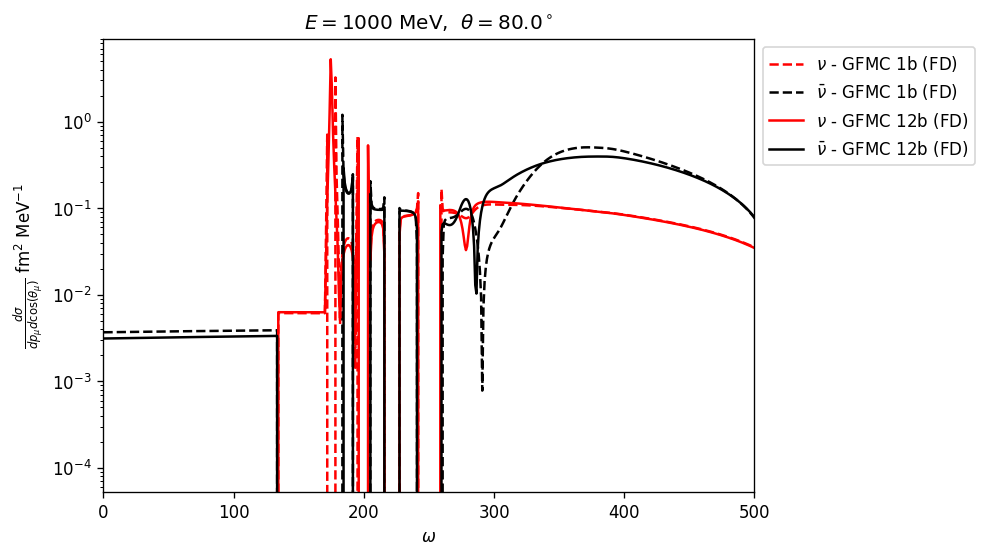

In [122]:
# choosing values of E and theta
E = 1000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
plt.xlim(0, 500)
#plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-123-1a8f46e4c7fd>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


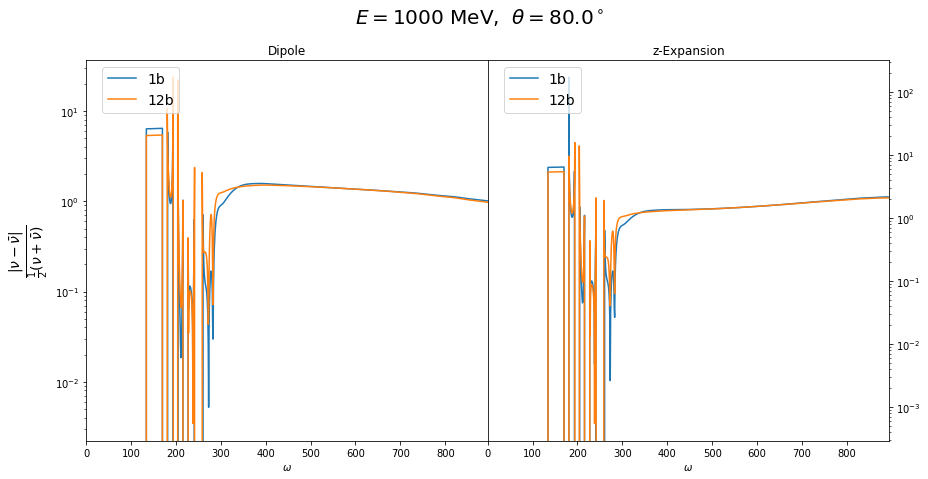

In [123]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 1000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=1000 and $\theta$=10

<ipython-input-124-bd07f34f9667>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


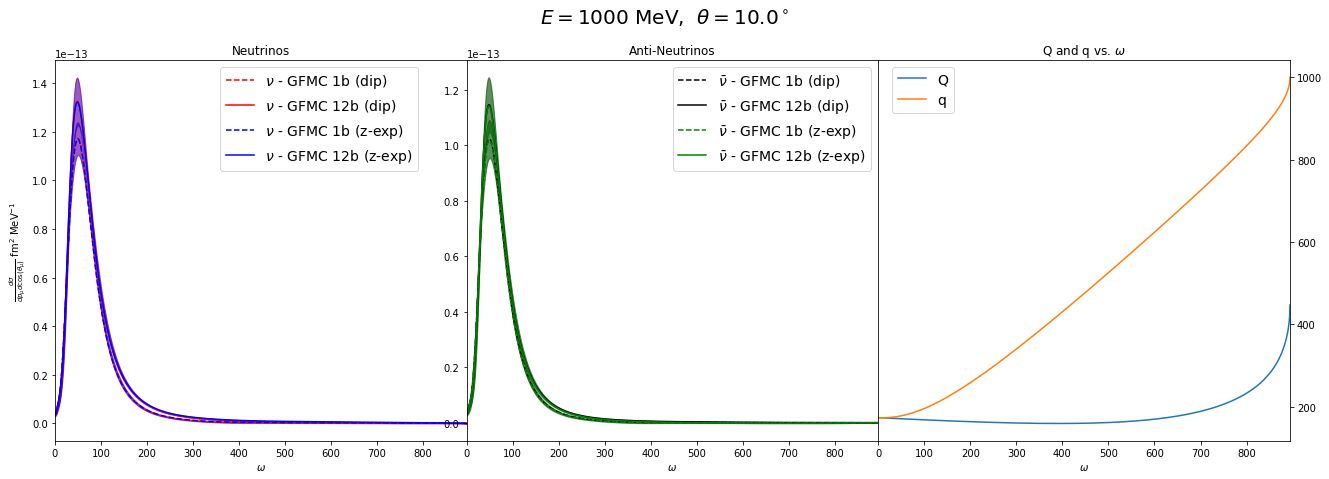

In [124]:
# choosing values of E and theta
E = 1000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

#figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

# plotting the dipole
ax1.plot(w, dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (dip)')
ax1.fill_between(w, dsig_arrays[1][1], dsig_arrays[1][2], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (dip)' )
ax2.fill_between(w, dsig_arrays[1][4], dsig_arrays[1][5], alpha=0.4,color='black')
ax1.plot(w, dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (dip)')
ax1.fill_between(w, dsig_arrays[1][7], dsig_arrays[1][8], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (dip)')
ax2.fill_between(w, dsig_arrays[1][10], dsig_arrays[1][11], alpha=0.4,color='black')

# plotting the z-expansion
ax1.plot(w, dsig_arrays[2][0],'blue',linestyle='--', label=r'$\nu$ - GFMC 1b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][1], dsig_arrays[2][2], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][3],'green',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (z-exp)' )
ax2.fill_between(w, dsig_arrays[2][4], get_dsig_arrays(E, theta)[2][5], alpha=0.4,color='green')
ax1.plot(w, dsig_arrays[2][6],'blue', label=r'$\nu$ - GFMC 12b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][7], dsig_arrays[2][8], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][9],'green', label=r'$\bar{\nu}$ - GFMC 12b (z-exp)')
ax2.fill_between(w, dsig_arrays[2][10], dsig_arrays[2][11], alpha=0.4,color='green')

# plotting q and Q vs omega
ax3.plot(w, big_Q_array, label='Q')
ax3.plot(w, little_q_array, label='q')

#ax1.set_legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(0.9, 1.0))
ax2.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(1.0, 1.0))
ax3.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'Neutrinos')
ax2.set_title(r'Anti-Neutrinos')
ax3.set_title(r'Q and q vs. $\omega$')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax3.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax3.set_xlim(0, max(w))
#ax2.yaxis.tick_right()
ax3.yaxis.tick_right()
fig.show()

<ipython-input-125-f36a1bcdef8b>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


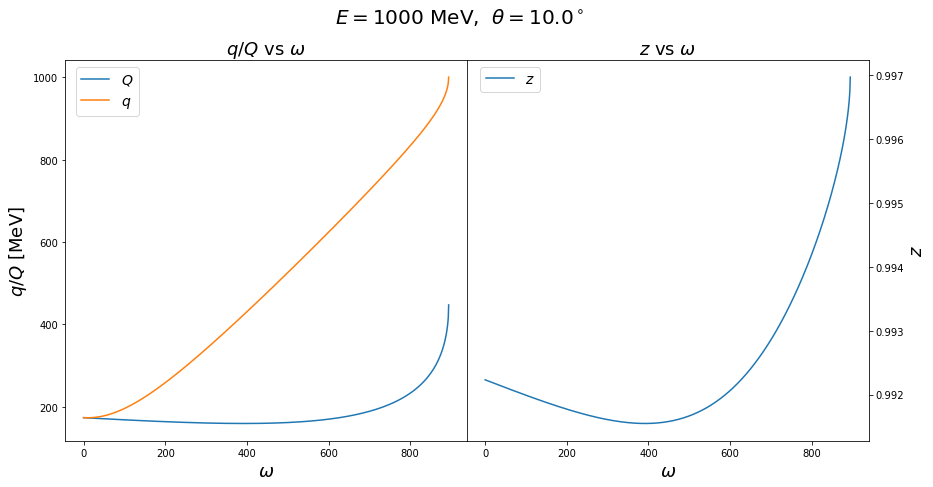

In [125]:
# choosing values of E and theta
E = 1000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]

# looking at q vs omega and z vs omega
# separately so as to not be too crowded

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting q and Q vs omega
ax1.plot(w, big_Q_array, label=r'$Q$')
ax1.plot(w, little_q_array, label=r'$q$')

# plotting z vs omega
z_array = z_exp(big_Q_array**2)
ax2.plot(w, z_array, label=r'$z$')

fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'$q$/$Q$ vs $\omega$', fontsize=18)
ax2.set_title(r'$z$ vs $\omega$', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$q$/$Q$ [MeV]', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
fig.show()

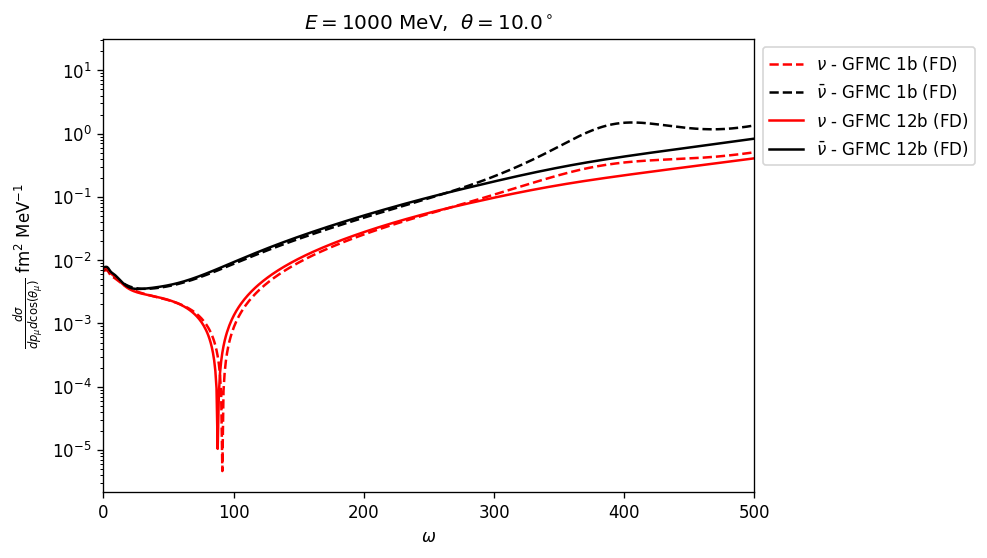

In [126]:
# choosing values of E and theta
E = 1000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
plt.xlim(0, 500)
#plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-127-b43e93e524e2>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


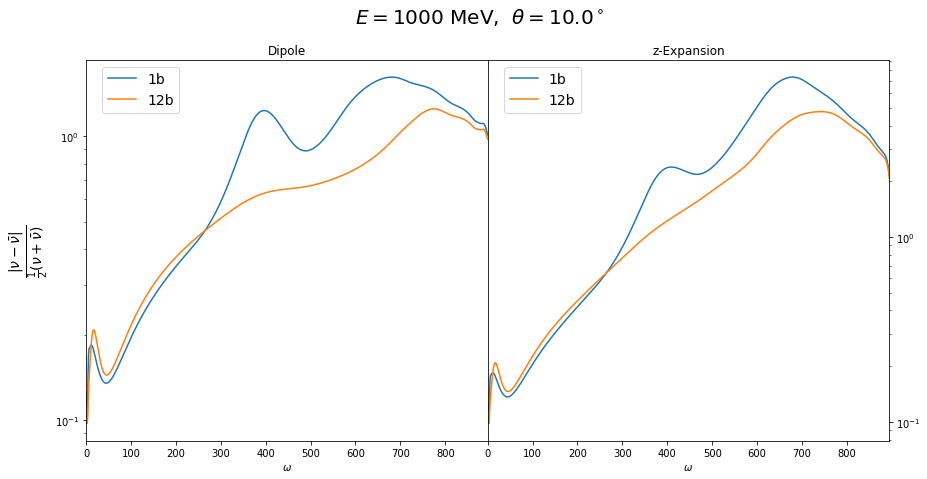

In [127]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 1000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=2000 and $\theta$=30

<ipython-input-128-ec28042ab030>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


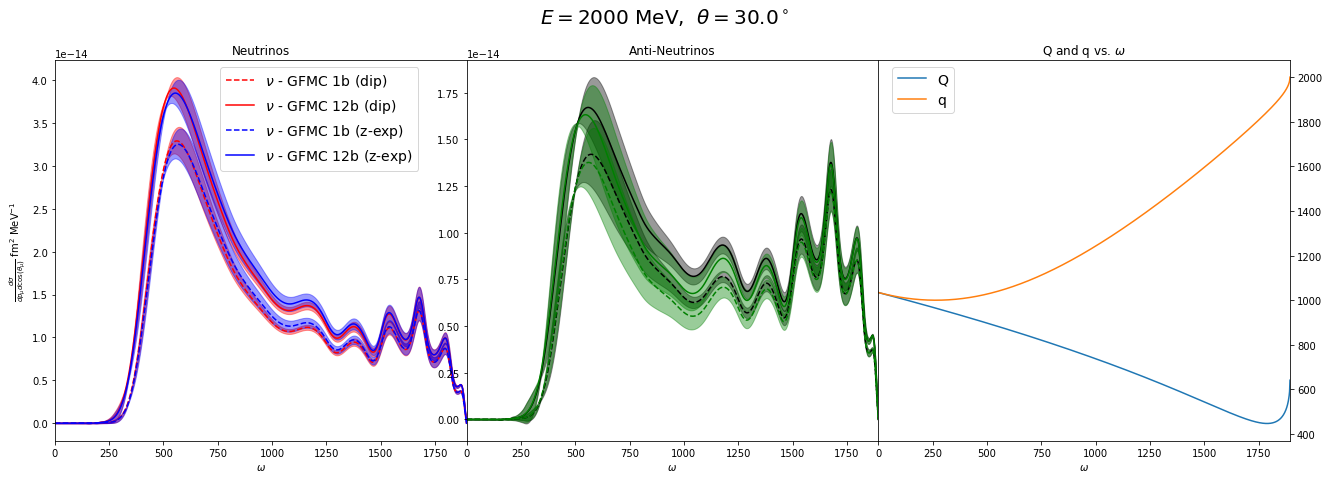

In [128]:
# choosing values of E and theta
E = 2000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

#figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

# plotting the dipole
ax1.plot(w, dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (dip)')
ax1.fill_between(w, dsig_arrays[1][1], dsig_arrays[1][2], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (dip)' )
ax2.fill_between(w, dsig_arrays[1][4], dsig_arrays[1][5], alpha=0.4,color='black')
ax1.plot(w, dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (dip)')
ax1.fill_between(w, dsig_arrays[1][7], dsig_arrays[1][8], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (dip)')
ax2.fill_between(w, dsig_arrays[1][10], dsig_arrays[1][11], alpha=0.4,color='black')

# plotting the z-expansion
ax1.plot(w, dsig_arrays[2][0],'blue',linestyle='--', label=r'$\nu$ - GFMC 1b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][1], dsig_arrays[2][2], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][3],'green',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (z-exp)' )
ax2.fill_between(w, dsig_arrays[2][4], get_dsig_arrays(E, theta)[2][5], alpha=0.4,color='green')
ax1.plot(w, dsig_arrays[2][6],'blue', label=r'$\nu$ - GFMC 12b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][7], dsig_arrays[2][8], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][9],'green', label=r'$\bar{\nu}$ - GFMC 12b (z-exp)')
ax2.fill_between(w, dsig_arrays[2][10], dsig_arrays[2][11], alpha=0.4,color='green')

# plotting q and Q vs omega
ax3.plot(w, big_Q_array, label='Q')
ax3.plot(w, little_q_array, label='q')

#ax1.set_legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(0.9, 1.0))
ax2.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(1.0, 1.0))
ax3.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'Neutrinos')
ax2.set_title(r'Anti-Neutrinos')
ax3.set_title(r'Q and q vs. $\omega$')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax3.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax3.set_xlim(0, max(w))
#ax2.yaxis.tick_right()
ax3.yaxis.tick_right()
fig.show()

<ipython-input-129-202490af0d6a>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


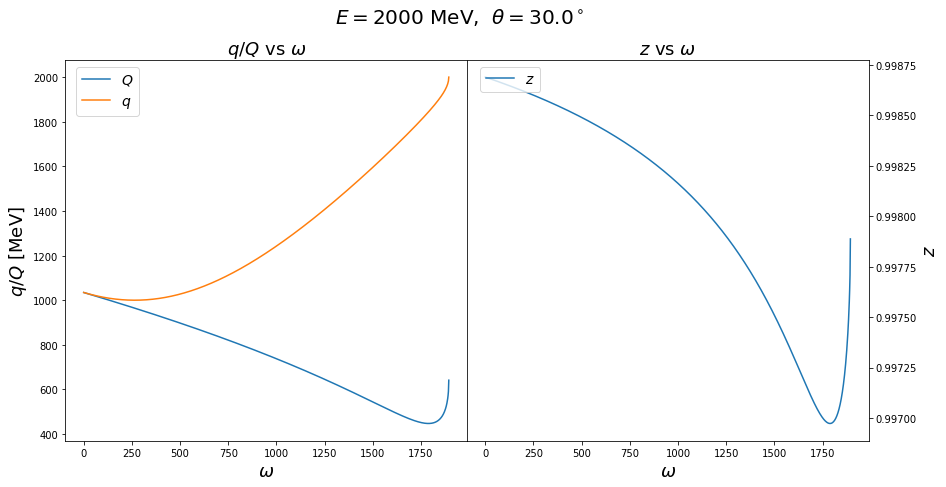

In [129]:
# choosing values of E and theta
E = 2000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]

# looking at q vs omega and z vs omega
# separately so as to not be too crowded

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting q and Q vs omega
ax1.plot(w, big_Q_array, label=r'$Q$')
ax1.plot(w, little_q_array, label=r'$q$')

# plotting z vs omega
z_array = z_exp(big_Q_array**2)
ax2.plot(w, z_array, label=r'$z$')

fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'$q$/$Q$ vs $\omega$', fontsize=18)
ax2.set_title(r'$z$ vs $\omega$', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$q$/$Q$ [MeV]', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
fig.show()

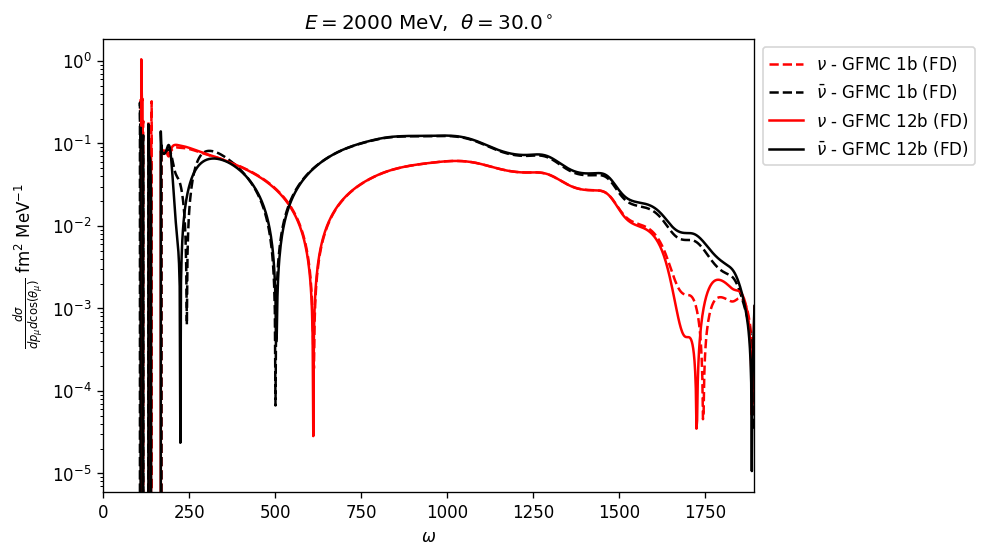

In [130]:
# choosing values of E and theta
E = 2000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-131-6eb7115f2bcc>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


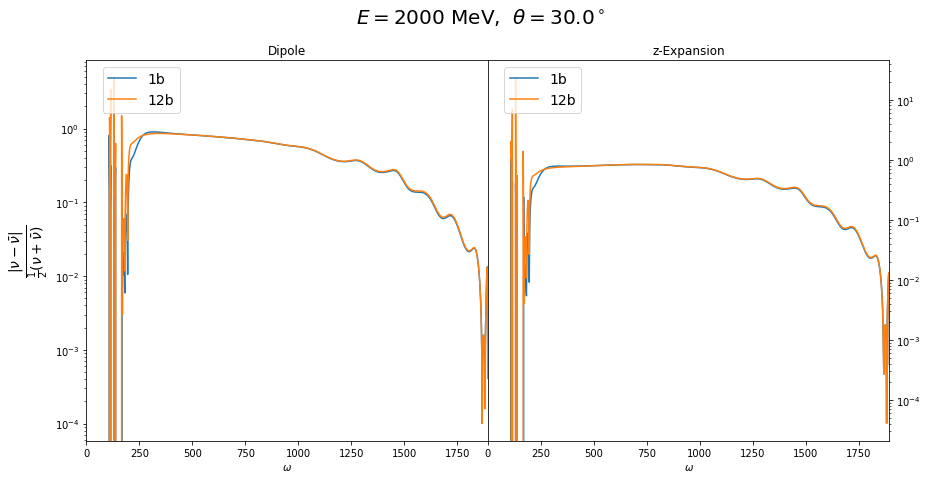

In [131]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 2000
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=2000 and $\theta$=80

<ipython-input-132-06a5b6795c0d>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


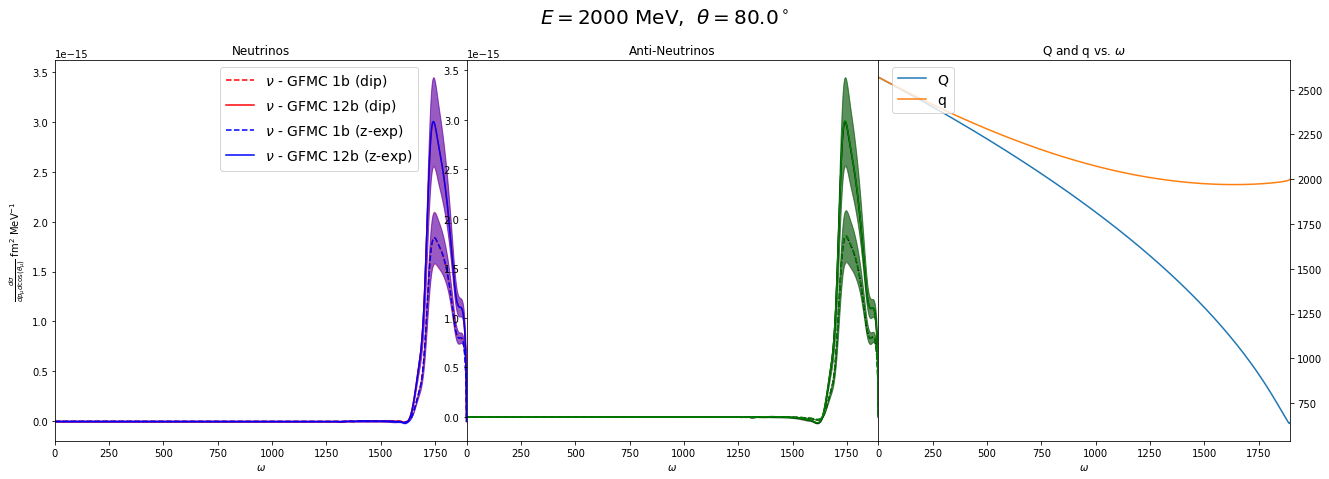

In [132]:
# choosing values of E and theta
E = 2000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

#figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

# plotting the dipole
ax1.plot(w, dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (dip)')
ax1.fill_between(w, dsig_arrays[1][1], dsig_arrays[1][2], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (dip)' )
ax2.fill_between(w, dsig_arrays[1][4], dsig_arrays[1][5], alpha=0.4,color='black')
ax1.plot(w, dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (dip)')
ax1.fill_between(w, dsig_arrays[1][7], dsig_arrays[1][8], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (dip)')
ax2.fill_between(w, dsig_arrays[1][10], dsig_arrays[1][11], alpha=0.4,color='black')

# plotting the z-expansion
ax1.plot(w, dsig_arrays[2][0],'blue',linestyle='--', label=r'$\nu$ - GFMC 1b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][1], dsig_arrays[2][2], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][3],'green',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (z-exp)' )
ax2.fill_between(w, dsig_arrays[2][4], get_dsig_arrays(E, theta)[2][5], alpha=0.4,color='green')
ax1.plot(w, dsig_arrays[2][6],'blue', label=r'$\nu$ - GFMC 12b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][7], dsig_arrays[2][8], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][9],'green', label=r'$\bar{\nu}$ - GFMC 12b (z-exp)')
ax2.fill_between(w, dsig_arrays[2][10], dsig_arrays[2][11], alpha=0.4,color='green')

# plotting q and Q vs omega
ax3.plot(w, big_Q_array, label='Q')
ax3.plot(w, little_q_array, label='q')

#ax1.set_legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(0.9, 1.0))
ax2.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(1.0, 1.0))
ax3.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'Neutrinos')
ax2.set_title(r'Anti-Neutrinos')
ax3.set_title(r'Q and q vs. $\omega$')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax3.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax3.set_xlim(0, max(w))
#ax2.yaxis.tick_right()
ax3.yaxis.tick_right()
fig.show()

<ipython-input-133-b30b978aeaf2>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


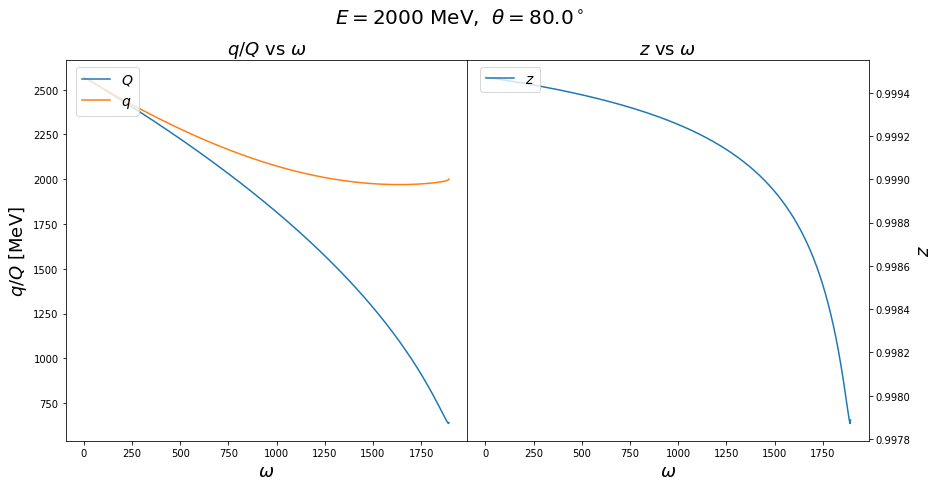

In [133]:
# choosing values of E and theta
E = 2000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]

# looking at q vs omega and z vs omega
# separately so as to not be too crowded

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting q and Q vs omega
ax1.plot(w, big_Q_array, label=r'$Q$')
ax1.plot(w, little_q_array, label=r'$q$')

# plotting z vs omega
z_array = z_exp(big_Q_array**2)
ax2.plot(w, z_array, label=r'$z$')

fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'$q$/$Q$ vs $\omega$', fontsize=18)
ax2.set_title(r'$z$ vs $\omega$', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$q$/$Q$ [MeV]', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
fig.show()

<ipython-input-134-e014cab4c668>:12: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
<ipython-input-134-e014cab4c668>:16: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
<ipython-input-134-e014cab4c668>:20: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
<ipython-input-134-e014cab4c668>:24: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')


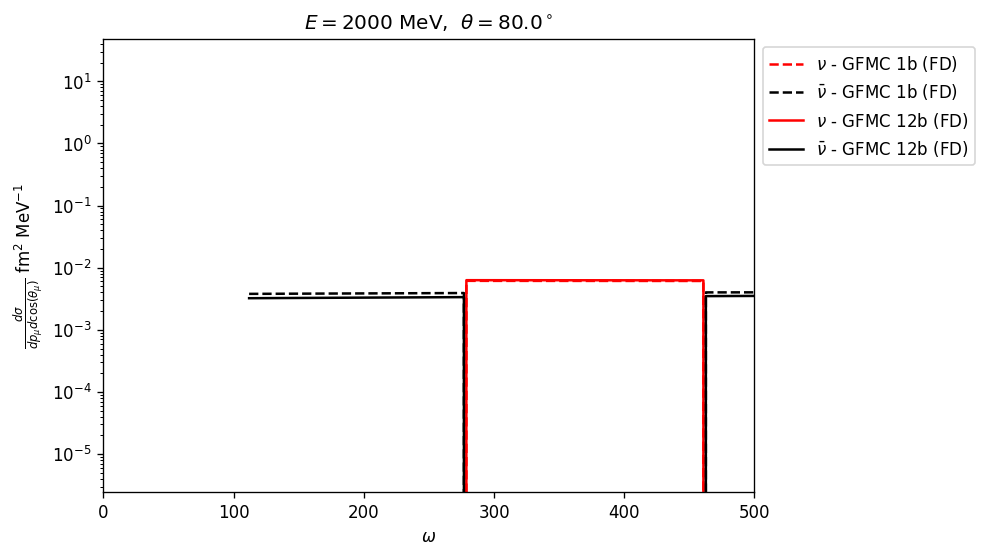

In [134]:
# choosing values of E and theta
E = 2000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
plt.xlim(0, 500)
#plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-135-8a5e149e2d35>:29: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
<ipython-input-135-8a5e149e2d35>:30: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')
<ipython-input-135-8a5e149e2d35>:33: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
<ipython-input-135-8a5e149e2d35>:34: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')
<ipython-input-135-8a5e149e2d35>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


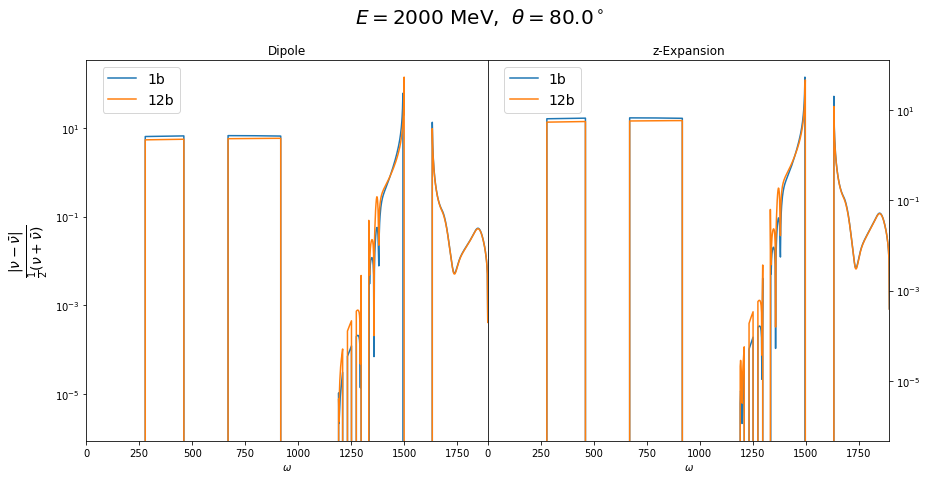

In [135]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 2000
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=2000 and $\theta$=10

<ipython-input-136-5afa13644367>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


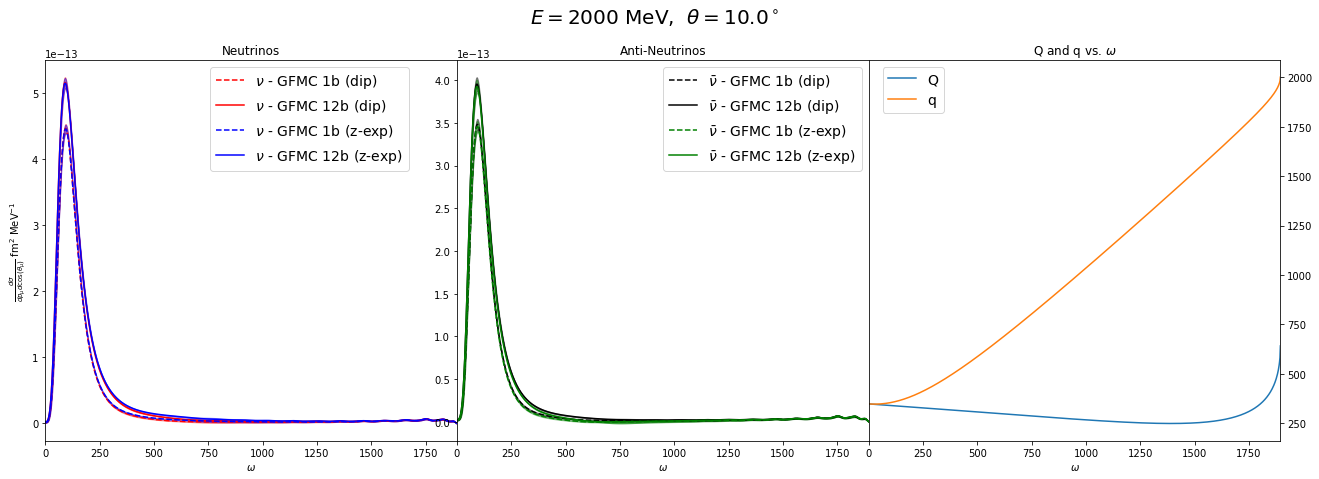

In [136]:
# choosing values of E and theta
E = 2000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

#figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

# plotting the dipole
ax1.plot(w, dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (dip)')
ax1.fill_between(w, dsig_arrays[1][1], dsig_arrays[1][2], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (dip)' )
ax2.fill_between(w, dsig_arrays[1][4], dsig_arrays[1][5], alpha=0.4,color='black')
ax1.plot(w, dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (dip)')
ax1.fill_between(w, dsig_arrays[1][7], dsig_arrays[1][8], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (dip)')
ax2.fill_between(w, dsig_arrays[1][10], dsig_arrays[1][11], alpha=0.4,color='black')

# plotting the z-expansion
ax1.plot(w, dsig_arrays[2][0],'blue',linestyle='--', label=r'$\nu$ - GFMC 1b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][1], dsig_arrays[2][2], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][3],'green',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (z-exp)' )
ax2.fill_between(w, dsig_arrays[2][4], get_dsig_arrays(E, theta)[2][5], alpha=0.4,color='green')
ax1.plot(w, dsig_arrays[2][6],'blue', label=r'$\nu$ - GFMC 12b (z-exp)')
ax1.fill_between(w, dsig_arrays[2][7], dsig_arrays[2][8], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][9],'green', label=r'$\bar{\nu}$ - GFMC 12b (z-exp)')
ax2.fill_between(w, dsig_arrays[2][10], dsig_arrays[2][11], alpha=0.4,color='green')

# plotting q and Q vs omega
ax3.plot(w, big_Q_array, label='Q')
ax3.plot(w, little_q_array, label='q')

#ax1.set_legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(0.9, 1.0))
ax2.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(1.0, 1.0))
ax3.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'Neutrinos')
ax2.set_title(r'Anti-Neutrinos')
ax3.set_title(r'Q and q vs. $\omega$')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax3.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax3.set_xlim(0, max(w))
#ax2.yaxis.tick_right()
ax3.yaxis.tick_right()
fig.show()

<ipython-input-137-aaad76ea7ded>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


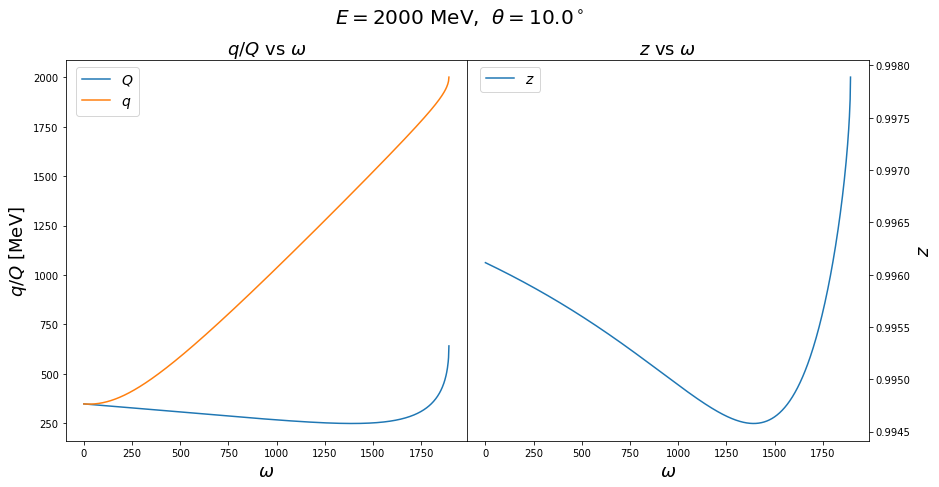

In [137]:
# choosing values of E and theta
E = 2000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]

# looking at q vs omega and z vs omega
# separately so as to not be too crowded

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting q and Q vs omega
ax1.plot(w, big_Q_array, label=r'$Q$')
ax1.plot(w, little_q_array, label=r'$q$')

# plotting z vs omega
z_array = z_exp(big_Q_array**2)
ax2.plot(w, z_array, label=r'$z$')

fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'$q$/$Q$ vs $\omega$', fontsize=18)
ax2.set_title(r'$z$ vs $\omega$', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$q$/$Q$ [MeV]', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
fig.show()

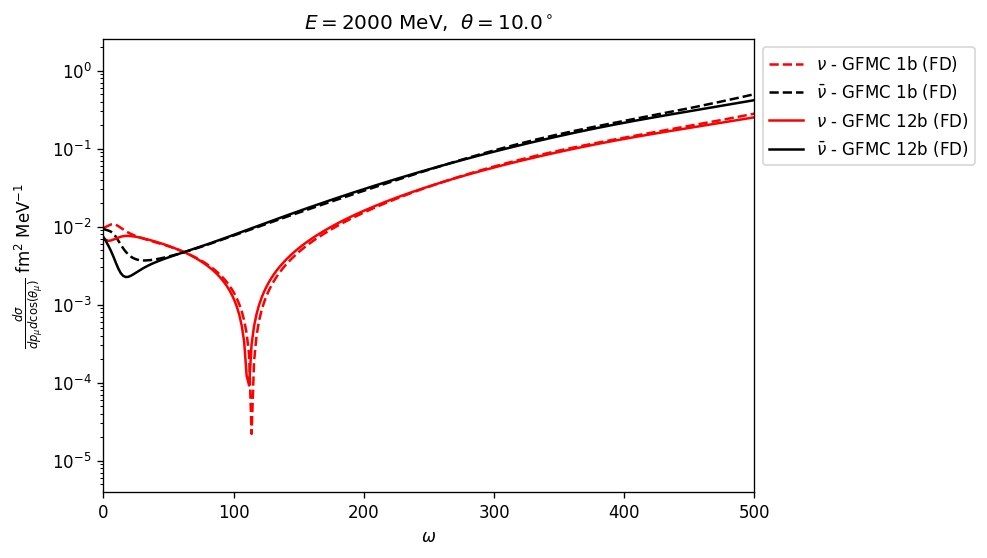

In [138]:
# choosing values of E and theta
E = 2000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
plt.xlim(0, 500)
#plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-139-661f16071295>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


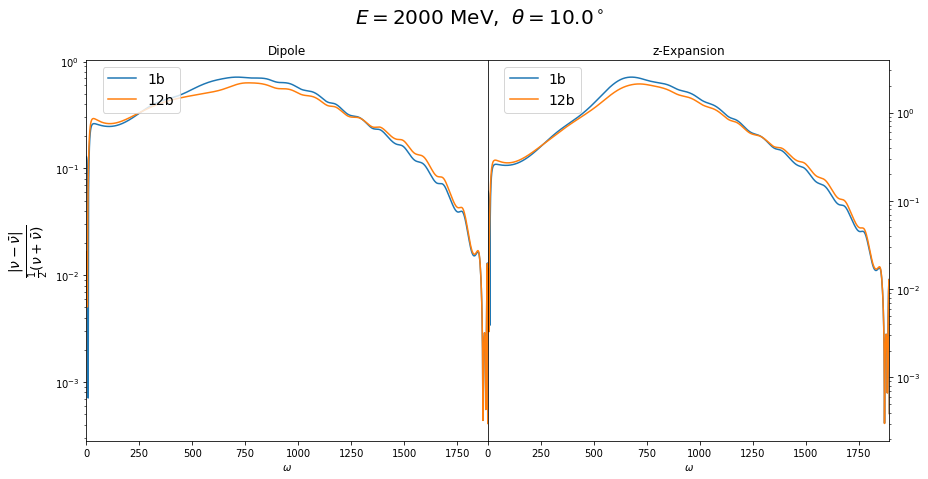

In [139]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 2000
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=500 and $\theta$=30

<ipython-input-143-12b2c3b490a9>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


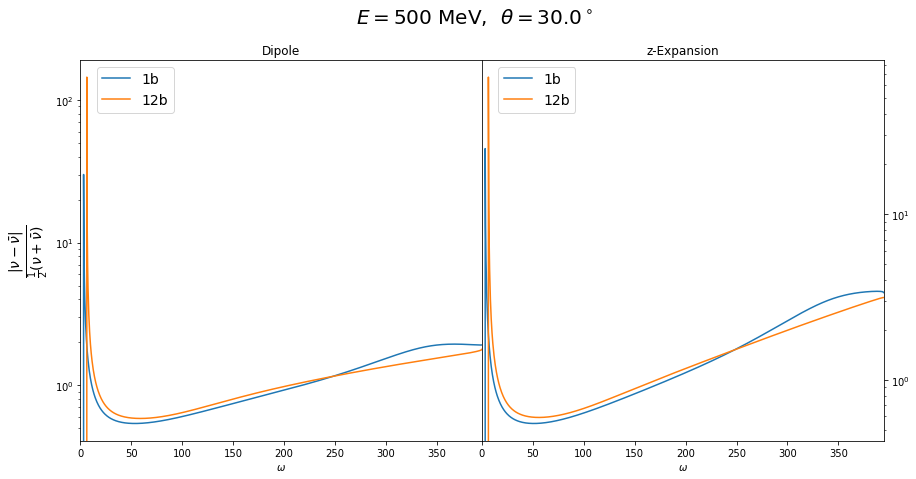

In [143]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 500
theta = 30.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=500 and $\theta$=80

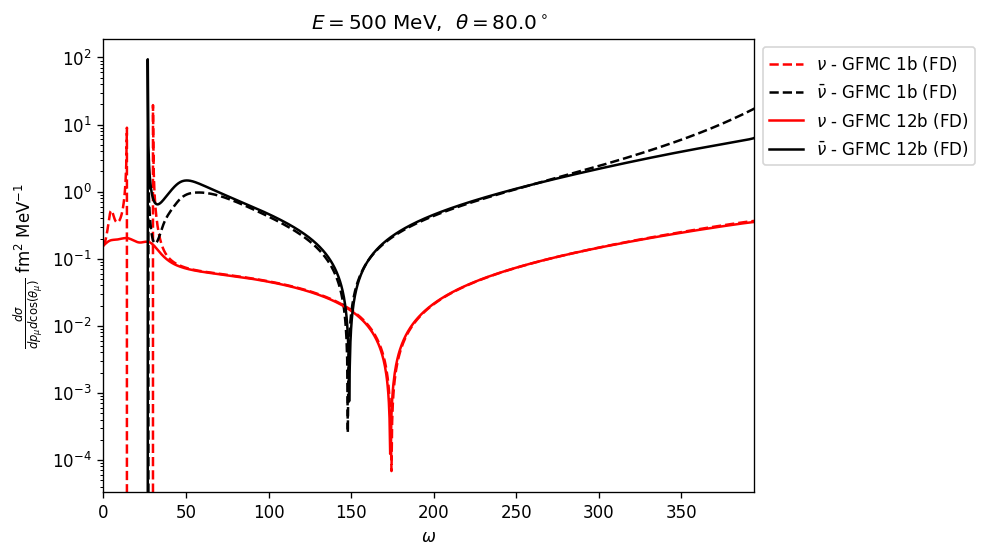

In [146]:
# choosing values of E and theta
E = 500
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-147-f0c2cd3fe1a1>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


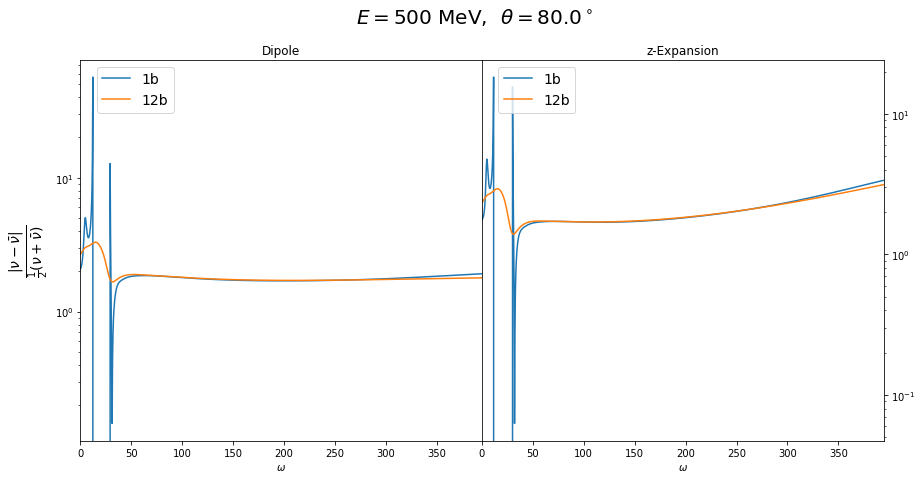

In [147]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 500
theta = 80.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

## Looking at E=500 and $\theta$=10

<ipython-input-148-da5f59d09621>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


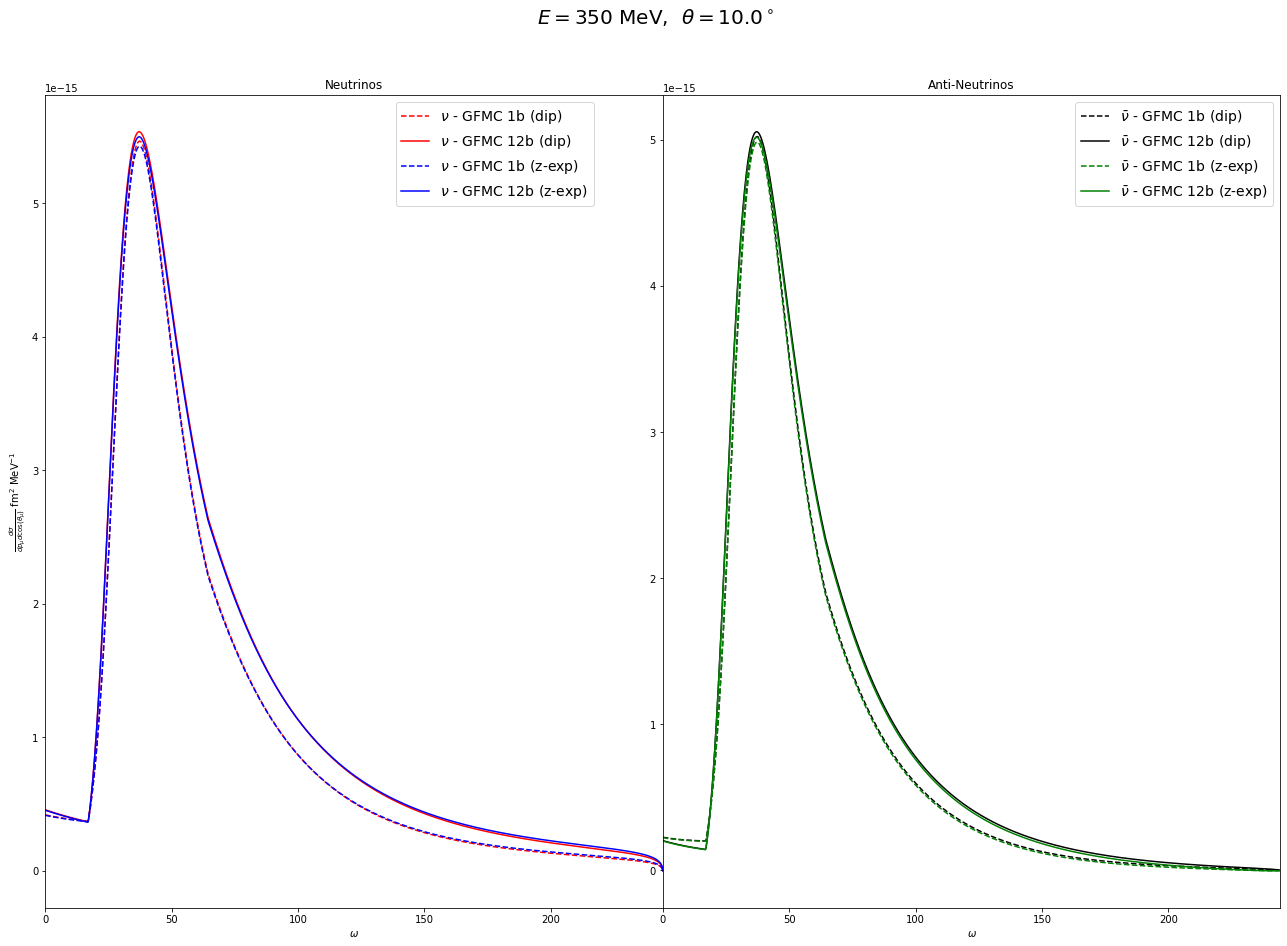

In [148]:
# choosing values of E and theta
E = 350
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

#figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

# plotting the dipole
ax1.plot(w, dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (dip)')
#ax1.fill_between(w, dsig_arrays[1][1], dsig_arrays[1][2], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (dip)' )
#ax2.fill_between(w, dsig_arrays[1][4], dsig_arrays[1][5], alpha=0.4,color='black')
ax1.plot(w, dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (dip)')
#ax1.fill_between(w, dsig_arrays[1][7], dsig_arrays[1][8], alpha=0.4,color='red')
ax2.plot(w, dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (dip)')
#ax2.fill_between(w, dsig_arrays[1][10], dsig_arrays[1][11], alpha=0.4,color='black')

# plotting the z-expansion
ax1.plot(w, dsig_arrays[2][0],'blue',linestyle='--', label=r'$\nu$ - GFMC 1b (z-exp)')
#ax1.fill_between(w, dsig_arrays[2][1], dsig_arrays[2][2], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][3],'green',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (z-exp)' )
#ax2.fill_between(w, dsig_arrays[2][4], get_dsig_arrays(E, theta)[2][5], alpha=0.4,color='green')
ax1.plot(w, dsig_arrays[2][6],'blue', label=r'$\nu$ - GFMC 12b (z-exp)')
#ax1.fill_between(w, dsig_arrays[2][7], dsig_arrays[2][8], alpha=0.4,color='blue')
ax2.plot(w, dsig_arrays[2][9],'green', label=r'$\bar{\nu}$ - GFMC 12b (z-exp)')
#ax2.fill_between(w, dsig_arrays[2][10], dsig_arrays[2][11], alpha=0.4,color='green')

# plotting q and Q vs omega
#ax3.plot(w, big_Q_array, label='Q')
#ax3.plot(w, little_q_array, label='q')

#ax1.set_legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(0.9, 1.0))
ax2.legend(loc=0, prop={'size': 14}, bbox_to_anchor=(1.0, 1.0))
#ax3.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'Neutrinos')
ax2.set_title(r'Anti-Neutrinos')
#ax3.set_title(r'Q and q vs. $\omega$')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
#ax3.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
#ax3.set_xlim(0, max(w))
#ax2.yaxis.tick_right()
#ax3.yaxis.tick_right()
fig.show()

<ipython-input-149-7ac762f1a8f9>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


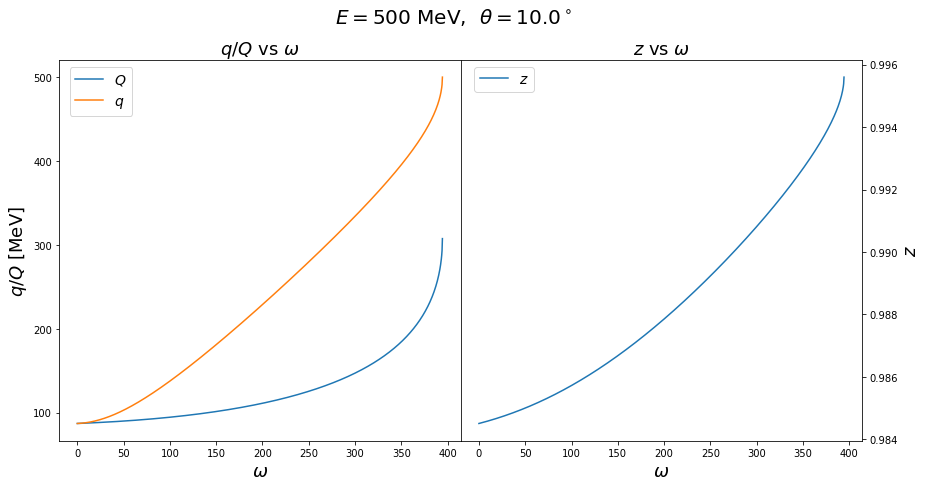

In [149]:
# choosing values of E and theta
E = 500
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]

# looking at q vs omega and z vs omega
# separately so as to not be too crowded

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting q and Q vs omega
ax1.plot(w, big_Q_array, label=r'$Q$')
ax1.plot(w, little_q_array, label=r'$q$')

# plotting z vs omega
z_array = z_exp(big_Q_array**2)
ax2.plot(w, z_array, label=r'$z$')

fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.2, 1.0))
ax1.set_title(r'$q$/$Q$ vs $\omega$', fontsize=18)
ax2.set_title(r'$z$ vs $\omega$', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$q$/$Q$ [MeV]', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
fig.show()

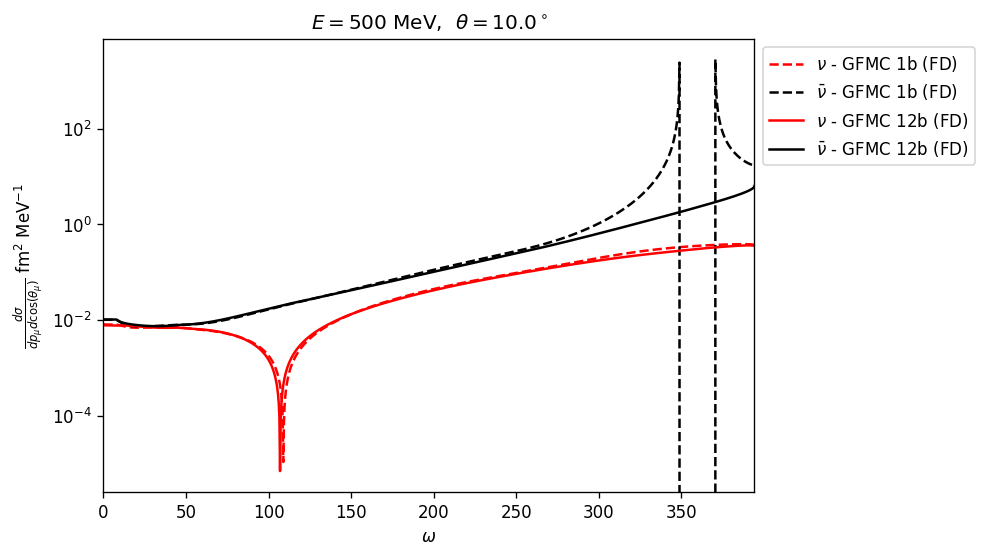

In [150]:
# choosing values of E and theta
E = 500
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

figure(num=None, figsize=(7, 5), dpi=120, facecolor='w', edgecolor='k')

w = dsig_arrays[0]

# plotting the fractional difference
# FD = abs(dip - z) / dip
plt.plot(w, np.abs(dsig_arrays[1][0] - dsig_arrays[2][0])/dsig_arrays[1][0],'red',linestyle='--', label=r'$\nu$ - GFMC 1b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][1] - dsig_arrays[2][1])/dsig_arrays[1][1], 
#                 np.abs(dsig_arrays[1][2] - dsig_arrays[2][2])/dsig_arrays[1][2], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][3] - dsig_arrays[2][3])/dsig_arrays[1][3],'black',linestyle='--', label=r'$\bar{\nu}$ - GFMC 1b (FD)' )
#plt.fill_between(w, np.abs(dsig_arrays[1][4] - dsig_arrays[2][4])/dsig_arrays[1][4], 
#                 np.abs(dsig_arrays[1][5] - dsig_arrays[2][5])/dsig_arrays[1][5], alpha=0.4,color='black')

plt.plot(w, np.abs(dsig_arrays[1][6] - dsig_arrays[2][6])/dsig_arrays[1][6],'red', label=r'$\nu$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][7] - dsig_arrays[2][7])/dsig_arrays[1][7], 
#                 np.abs(dsig_arrays[1][8] - dsig_arrays[2][8])/dsig_arrays[1][8], alpha=0.4,color='red')

plt.plot(w, np.abs(dsig_arrays[1][9] - dsig_arrays[2][9])/dsig_arrays[1][9],'black', label=r'$\bar{\nu}$ - GFMC 12b (FD)')
#plt.fill_between(w, np.abs(dsig_arrays[1][10] - dsig_arrays[2][10])/dsig_arrays[1][10], 
#                 np.abs(dsig_arrays[1][11] - dsig_arrays[2][11])/dsig_arrays[1][11], alpha=0.4,color='black')


plt.legend(loc=2, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.title(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ fm$^2$ MeV$^{-1}$')
#plt.xlim(0, 500)
plt.xlim(0, max(w))
plt.yscale('log')
plt.show()

<ipython-input-151-6c9db888fedf>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


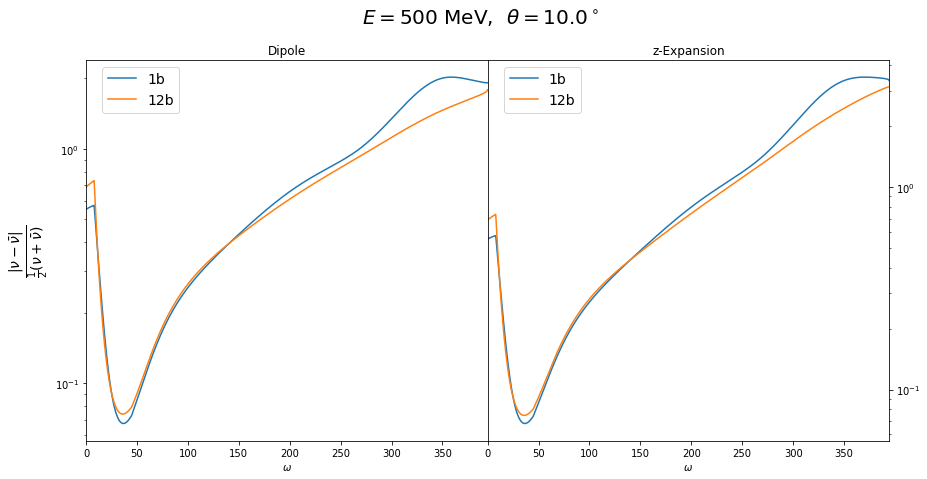

In [151]:
# instead of looking at the fractional difference, we want to look at the following
# |nu - nubar| / (0.5*(nu + nubar))

# choosing values of E and theta
E = 500
theta = 10.
dsig_arrays = get_dsig_arrays(E, theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

w = dsig_arrays[0]
big_Q_array = dsig_arrays[3]
little_q_array = dsig_arrays[4]
#print(big_Q_array)
#print(little_q_array)

nu_1b_dip = dsig_arrays[1][0] 
nu_1b_zexp = dsig_arrays[2][0]
nubar_1b_dip = dsig_arrays[1][3] 
nubar_1b_zexp = dsig_arrays[2][3]
nu_12b_dip = dsig_arrays[1][6] 
nu_12b_zexp = dsig_arrays[2][6]
nubar_12b_dip = dsig_arrays[1][9] 
nubar_12b_zexp = dsig_arrays[2][9]

# plotting the dip ratios
ax1.plot(w, 2*np.abs(nu_1b_dip - nubar_1b_dip)/(nu_1b_dip + nubar_1b_dip), label='1b')
ax1.plot(w, 2*np.abs(nu_12b_dip - nubar_12b_dip)/(nu_12b_dip + nubar_12b_dip), label='12b')

# plotting the zexp ratios
ax2.plot(w, 2*np.abs(nu_1b_zexp - nubar_1b_zexp)/(nu_1b_zexp + nubar_1b_zexp), label='1b')
ax2.plot(w, 2*np.abs(nu_12b_zexp - nubar_12b_zexp)/(nu_12b_zexp + nubar_12b_zexp), label='12b')

ax1.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax2.legend(loc=1, prop={'size': 14}, bbox_to_anchor=(0.25, 1.0))
ax1.set_title(r'Dipole')
ax2.set_title(r'z-Expansion')
fig.suptitle(r'$E=$' + str(E) + r' MeV,  $\theta =$' + str(theta) + r'$^\circ$', y=1.08, fontsize=20)
ax1.set_xlabel(r'$\omega$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\frac{|\nu - \bar{\nu}|}{\frac{1}{2}(\nu + \bar{\nu})}$', fontsize=20)
#plt.xlim(0, 500)
ax1.set_xlim(0, max(w))
ax2.set_xlim(0, max(w))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.yaxis.tick_right()
fig.show()

# Now that we have plots of the cross sections, we can start comparing with experimental data

In [164]:
fname_nu = 'T2K/flux_nu.dat'
#fname_nubar = 'flux_nubar.dat'
data_nu = np.loadtxt(fname_nu, unpack=True, skiprows=2)
#data_nubar = np.loadtxt(fname_nubar, unpack=True, skiprows=9)
nbin= len(data_nu[1,:])

# Setup fine grid
nflux_T2K=1000
E_flux_min_T2K=0
E_flux_max_T2K=4#max(data_nu[1,:])
E_flux_T2K=np.linspace(E_flux_min_T2K, E_flux_max_T2K, nflux_T2K)
E_flux_T2K=E_flux_T2K*1000
dE_flux_T2K=E_flux_T2K[1]-E_flux_T2K[0]
nu_flux_T2K=np.zeros(nflux_T2K)
#nubar_flux_T2K=np.zeros(nflux_T2K)

# Interpolate flux on fine grid
E_flux_read=np.zeros(nbin)
nu_flux_read=np.zeros(nbin)
#nubar_flux_read=np.zeros(nbin)
E_flux_read[:]=(data_nu[1,:]+data_nu[2,:])/2*1000
nu_flux_read[:]=data_nu[3,:]
#nubar_flux_read[:]=data_nubar[3,:]
nu_flux_T2K_interpolate=interpolate.UnivariateSpline(E_flux_read, nu_flux_read, s=0)
#nubar_flux_T2K_interpolate=interpolate.UnivariateSpline(E_flux_read, nubar_flux_read, s=0)
for i in range(nflux_T2K):
    nu_flux_T2K[i] = nu_flux_T2K_interpolate(E_flux_T2K[i])
    #nubar_flux_T2K[i] = nubar_flux_T2K_interpolate(E_flux_T2K[i])
norm_nu_T2K=np.trapz(nu_flux_T2K,E_flux_T2K)
#norm_nubar_T2K=np.trapz(nubar_flux_T2K,E_flux_T2K)
nu_flux_T2K=nu_flux_T2K/norm_nu_T2K
#nubar_flux_T2K=nubar_flux_T2K/norm_nubar_T2K

def mpgrid(start,stop,nstep):
    dx=(stop-start)/nstep
    grid=np.zeros(nstep)
    for i in range(nstep):
        grid[i]=start+(i+0.5)*dx
    return  grid

In [165]:
#fname='MB/exp_nu_T2K_095.dat'
#Tmu_nu_data_095,dsig_CC_nu_data_095,dsig_CC_nu_err_095=np.loadtxt(fname,unpack=True)
#fname='MB/exp_nubar_T2K_095.dat'
#Tmu_nubar_data_095,dsig_CC_nubar_data_095,dsig_CC_nubar_err_095=np.loadtxt(fname,unpack=True)

In [166]:
#1/0

In [167]:
#Tmu_nu_data_095

In [168]:
#dsig_CC_nu_data_095

In [169]:
#dsig_CC_nu_err_095

In [170]:
fname='T2K/exp_nu_T2K_099.dat'
Tmu_nu_data_099,Tmu_nu_data_err_099,dsig_CC_nu_data_099,dsig_CC_nu_err_099=np.loadtxt(fname,unpack=True)
#fname='T2K/exp_nubar_T2K_096.dat'
#something2,Tmu_nubar_data_095,dsig_CC_nubar_data_095,dsig_CC_nubar_err_095=np.loadtxt(fname,unpack=True)

In [171]:
Tmu_nu_data_099

array([  250.,   550.,   650.,   750.,  1025.,  1625.,  2500.,  4000.,
       17500.])

In [172]:
#Tmu_nu_data_099

In [173]:
#dsig_CC_nu_data_095

In [174]:
#dsig_CC_nu_err_095

In [175]:
# working copy
def pmu_func(Tmu):
    return np.sqrt((Tmu + ml)**2 - ml**2)
def Tmu_func(pmu):
    return np.sqrt(pmu**2 + ml**2) - ml
n_Tmu=100
Tmu_max=3000
Tmu_min=10
Tmu=np.linspace(Tmu_min, Tmu_max, n_Tmu)
pmu = pmu_func(Tmu)
#print(pmu)
ntheta=10
cos_theta_flux=mpgrid(0.98, 1.0, ntheta)

dsig_nu_flux_1b_dip = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_dip = np.zeros((n_Tmu,3,3))

dsig_nu_1b_dip = np.zeros(3)
dsig_nu_12b_dip = np.zeros(3)

dsig_nu_flux_1b_zexp = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_zexp = np.zeros((n_Tmu,3,3))

dsig_nu_1b_zexp = np.zeros(3)
dsig_nu_12b_zexp = np.zeros(3)

big_Q_array=np.zeros(n_Tmu)
little_q_array=np.zeros(n_Tmu)

for i in range (n_Tmu):
    print(i)
    for j in range (nflux_T2K):
        E = E_flux_T2K[j]
        w_i= E - Tmu_func(pmu[i]) - ml
        #jacobian = pmu[i] / (Tmu_func(pmu[i]) + ml)
        #print(jacobian)
        if w_i > 0 and E > 0: 
            for k in range (ntheta):
                dsig_nu_1b_dip, dsig_nubar_1b_dip, dsig_nu_12b_dip, dsig_nubar_12b_dip, big_Q_array[i], little_q_array[i] = dsig_compute_ys(0,w_i,E,cos_theta_flux[k])
                dsig_nu_flux_1b_dip[i,:,0] = dsig_nu_flux_1b_dip[i,:,0] +  dsig_nu_1b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_12b_dip[i,:,0] = dsig_nu_flux_12b_dip[i,:,0] +  dsig_nu_12b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_1b_dip[i,:,0] = dsig_nu_flux_1b_dip[i,:,0] #* jacobian
                dsig_nu_flux_12b_dip[i,:,0] = dsig_nu_flux_12b_dip[i,:,0] #* jacobian
                
                dsig_nu_1b_zexp, dsig_nubar_1b_zexp, dsig_nu_12b_zexp, dsig_nubar_12b_zexp, big_Q_array[i], little_q_array[i] = dsig_compute_ys(1,w_i,E,cos_theta_flux[k])
                dsig_nu_flux_1b_zexp[i,:,0] = dsig_nu_flux_1b_zexp[i,:,0] +  dsig_nu_1b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_12b_zexp[i,:,0] = dsig_nu_flux_12b_zexp[i,:,0] +  dsig_nu_12b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_1b_zexp[i,:,0] = dsig_nu_flux_1b_zexp[i,:,0] #* jacobian
                dsig_nu_flux_12b_zexp[i,:,0] = dsig_nu_flux_12b_zexp[i,:,0] #* jacobian
                
                if E < 800:
                    dsig_nu_flux_1b_dip[i,:,2] = dsig_nu_flux_1b_dip[i,:,2] +  dsig_nu_1b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                    dsig_nu_flux_12b_dip[i,:,2] = dsig_nu_flux_12b_dip[i,:,2] +  dsig_nu_12b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                    dsig_nu_flux_1b_zexp[i,:,2] = dsig_nu_flux_1b_zexp[i,:,2] +  dsig_nu_1b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K
                    dsig_nu_flux_12b_zexp[i,:,2] = dsig_nu_flux_12b_zexp[i,:,2] +  dsig_nu_12b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [176]:
'''
# in this block is where i'll need to apply the jacobian
# this is the original block

dsig_nu_flux_1b_T2K_099_dip = dsig_nu_flux_1b_dip / ntheta * 10**(-26)/6
dsig_nu_flux_12b_T2K_099_dip = dsig_nu_flux_12b_dip / ntheta * 10**(-26)/6

dsig_nu_flux_1b_T2K_099_zexp = dsig_nu_flux_1b_zexp / ntheta * 10**(-26)/6
dsig_nu_flux_12b_T2K_099_zexp = dsig_nu_flux_12b_zexp / ntheta * 10**(-26)/6

little_q_T2K_099 = little_q_array
big_Q_T2K_099 = big_Q_array

Tmu_T2K_099 = Tmu
'''

"\n# in this block is where i'll need to apply the jacobian\n# this is the original block\n\ndsig_nu_flux_1b_T2K_099_dip = dsig_nu_flux_1b_dip / ntheta * 10**(-26)/6\ndsig_nu_flux_12b_T2K_099_dip = dsig_nu_flux_12b_dip / ntheta * 10**(-26)/6\n\ndsig_nu_flux_1b_T2K_099_zexp = dsig_nu_flux_1b_zexp / ntheta * 10**(-26)/6\ndsig_nu_flux_12b_T2K_099_zexp = dsig_nu_flux_12b_zexp / ntheta * 10**(-26)/6\n\nlittle_q_T2K_099 = little_q_array\nbig_Q_T2K_099 = big_Q_array\n\nTmu_T2K_099 = Tmu\n"

In [177]:
# in this block is where i'll need to apply the jacobian
# this is the working copy

dsig_nu_flux_1b_T2K_099_dip = dsig_nu_flux_1b_dip / ntheta * 10**(-23)/12
dsig_nu_flux_12b_T2K_099_dip = dsig_nu_flux_12b_dip / ntheta * 10**(-23)/12

dsig_nu_flux_1b_T2K_099_zexp = dsig_nu_flux_1b_zexp / ntheta * 10**(-23)/12
dsig_nu_flux_12b_T2K_099_zexp = dsig_nu_flux_12b_zexp / ntheta * 10**(-23)/12

little_q_T2K_099 = little_q_array
big_Q_T2K_099 = big_Q_array

Tmu_T2K_099 = Tmu

# defining the mass of the muon (m_muon = mmu) in MeV
#mmu = 105.658
# it is already defined as ml

pmu_T2K_099 = np.sqrt((Tmu_T2K_099 + ml)**2 - ml**2)
#print(pmu_T2K_099)

# the jacobian between T_mu and p_mu
jacobian = pmu_T2K_099 / (Tmu_T2K_099 + ml)
print(jacobian)

[0.40675229 0.6894007  0.7999108  0.85883803 0.89462294 0.91815721
 0.93452125 0.94638439 0.95527019 0.96210384 0.96747522 0.97177551
 0.9752728  0.97815593 0.98056118 0.9825889  0.98431435 0.9857949
 0.98707488 0.98818902 0.98916483 0.99002433 0.99078533 0.99146234
 0.99206729 0.99261008 0.99309894 0.99354081 0.99394151 0.99430602
 0.99463857 0.99494279 0.99522181 0.99547834 0.99571475 0.99593307
 0.99613511 0.99632246 0.9964965  0.99665846 0.99680944 0.99695041
 0.99708224 0.99720569 0.99732147 0.9974302  0.99753243 0.99762868
 0.99771941 0.99780502 0.9978859  0.99796239 0.9980348  0.99810342
 0.99816851 0.9982303  0.99828901 0.99834485 0.998398   0.99844863
 0.99849689 0.99854294 0.9985869  0.9986289  0.99866906 0.99870748
 0.99874426 0.99877949 0.99881325 0.99884564 0.99887671 0.99890655
 0.99893522 0.99896277 0.99898927 0.99901476 0.9990393  0.99906293
 0.99908571 0.99910766 0.99912883 0.99914926 0.99916898 0.99918802
 0.99920641 0.99922418 0.99924136 0.99925798 0.99927406 0.99928

In [178]:
#print(dsig_nu_flux_1b_T2K_099_dip[0][0][0])#*pmu_T2K_99
#print(jacobian)
#dsig_nu_flux_1b_T2K_099_dip[1][0]

dsig_nu_flux_1b_T2K_099_dip2 = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_T2K_099_dip2 = np.zeros((n_Tmu,3,3))

dsig_nu_flux_1b_T2K_099_zexp2 = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_T2K_099_zexp2 = np.zeros((n_Tmu,3,3))

for i in range(len(dsig_nu_flux_1b_T2K_099_dip)):
    for j in range(len(dsig_nu_flux_1b_T2K_099_dip[i])):
        for k in range(len(dsig_nu_flux_1b_T2K_099_dip[i][j])):
            blank = 0
            dsig_nu_flux_1b_T2K_099_dip2[i][j][k] = dsig_nu_flux_1b_T2K_099_dip[i][j][k] * jacobian[i]
            dsig_nu_flux_12b_T2K_099_dip2[i][j][k] = dsig_nu_flux_12b_T2K_099_dip[i][j][k] * jacobian[i]
            dsig_nu_flux_1b_T2K_099_zexp2[i][j][k] = dsig_nu_flux_1b_T2K_099_zexp[i][j][k] * jacobian[i]
            dsig_nu_flux_12b_T2K_099_zexp2[i][j][k] = dsig_nu_flux_12b_T2K_099_zexp[i][j][k] * jacobian[i]
#print(dsig_nu_flux_1b_T2K_099_dip)

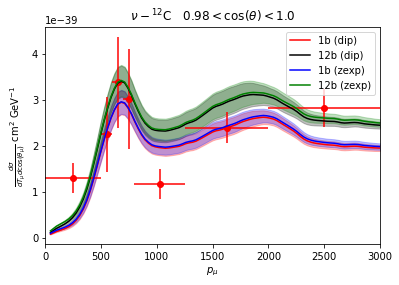

In [179]:
# plotting the data for nu
plt.errorbar(Tmu_nu_data_099, dsig_CC_nu_data_099, xerr=Tmu_nu_data_err_099, yerr=dsig_CC_nu_err_099, fmt="none", ecolor='red')
plt.plot(Tmu_nu_data_099, dsig_CC_nu_data_099,'ro')
# plotting dipole for nu
plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip[:,0,0], 'red', label='1b (dip)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip[:,1,0], dsig_nu_flux_1b_T2K_099_dip[:,2,0], alpha=0.25,color='red')
plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip[:,0,0], 'black', label='12b (dip)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip[:,1,0], dsig_nu_flux_12b_T2K_099_dip[:,2,0], alpha=0.25,color='black')
# plotting z-expansion for nu
plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp[:,0,0], 'blue', label='1b (zexp)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp[:,1,0], dsig_nu_flux_1b_T2K_099_zexp[:,2,0], alpha=0.25,color='blue')
plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp[:,0,0], 'green', label='12b (zexp)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp[:,1,0], dsig_nu_flux_12b_T2K_099_zexp[:,2,0], alpha=0.25,color='green')

plt.xlim(0, 3000)
#plt.ylim(0,10**-38)
plt.legend(loc=0, ncol=1)#, bbox_to_anchor=(0.9, 1.0))
plt.title(r'$\nu - ^{12}$C   $0.98<\cos(\theta)<1.0$')
plt.xlabel(r'$p_\mu$')
plt.ylabel(r'$\frac{d\sigma}{dT_\mu d\cos(\theta_\mu)}$ cm$^2$ GeV$^{-1}$')

#plt.savefig('T2K_cross_section_099_no_data', bbox_inches='tight')
#plt.savefig('T2K_cross_section_099_with_data', bbox_inches='tight')

plt.show()

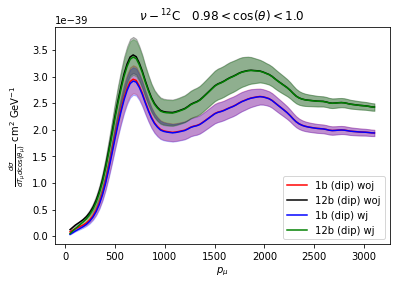

In [180]:
# comparing the cross section with and without the jacobian
# plotting dipole for nu
plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip[:,0,0], 'red', label='1b (dip) woj')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip[:,1,0], dsig_nu_flux_1b_T2K_099_dip[:,2,0], alpha=0.25,color='red')
plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip[:,0,0], 'black', label='12b (dip) woj')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip[:,1,0], dsig_nu_flux_12b_T2K_099_dip[:,2,0], alpha=0.25,color='black')
# plotting z-expansion for nu
#plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp[:,0,0], 'blue', label='1b (zexp) woj')
#plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp[:,1,0], dsig_nu_flux_1b_T2K_099_zexp[:,2,0], alpha=0.25,color='blue')
#plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp[:,0,0], 'green', label='12b (zexp) woj')
#plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp[:,1,0], dsig_nu_flux_12b_T2K_099_zexp[:,2,0], alpha=0.25,color='green')

# plotting dipole for nu
plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip2[:,0,0], 'blue', label='1b (dip) wj')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip2[:,1,0], dsig_nu_flux_1b_T2K_099_dip2[:,2,0], alpha=0.25,color='blue')
plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip2[:,0,0], 'green', label='12b (dip) wj')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip2[:,1,0], dsig_nu_flux_12b_T2K_099_dip2[:,2,0], alpha=0.25,color='green')
# plotting z-expansion for nu
#plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp2[:,0,0], 'blue', label='1b (zexp) wj')
#plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp2[:,1,0], dsig_nu_flux_1b_T2K_099_zexp2[:,2,0], alpha=0.25,color='blue')
#plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp2[:,0,0], 'green', label='12b (zexp) wj')
#plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp2[:,1,0], dsig_nu_flux_12b_T2K_099_zexp2[:,2,0], alpha=0.25,color='green')

#plt.xlim(50, 600)
#plt.ylim(0,0.4*10**-38)
plt.legend(loc=0, ncol=1)#, bbox_to_anchor=(0.9, 1.0))
plt.title(r'$\nu - ^{12}$C   $0.98<\cos(\theta)<1.0$')
plt.xlabel(r'$p_\mu$')
plt.ylabel(r'$\frac{d\sigma}{dT_\mu d\cos(\theta_\mu)}$ cm$^2$ GeV$^{-1}$')

plt.show()